In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import pickle

# easier to see full text with a bigger maxwidth:
pd.options.display.max_colwidth = 500

In [2]:
##################
# READ DATA FILE #
##################
data_dir = '../data/'
image_dir = '../images/'
data_file = "JUST CAPITAL_SPSS.SAV"
data, meta = pyreadstat.read_sav(data_dir+data_file)
data.head(5)

RECORD  QS4Q1R1  QS4Q1R2  QS4Q1R3  QS4Q1R4  QS4Q1R5  QS4Q2R1  QS4Q2R2  \
0     2.0      3.0      3.0      3.0      3.0      3.0      2.0      2.0   
1     3.0      4.0      4.0      3.0      4.0      3.0      3.0      3.0   
2     4.0      1.0      1.0      1.0      1.0      1.0      1.0      4.0   
3     5.0      3.0      4.0      4.0      3.0      3.0      2.0      3.0   
4     7.0      2.0      1.0      2.0      2.0      2.0      1.0      2.0   

   QS4Q2R3  QS4Q2R4  ...  NET2RACEMUSR6  Q2109  Q2112  Q1903  Q1905  Q1910  \
0      2.0      2.0  ...            0.0  244.0    5.0    2.0    NaN    1.0   
1      2.0      2.0  ...            1.0  244.0    4.0    2.0    NaN    1.0   
2      1.0      4.0  ...            0.0  244.0    6.0    1.0    1.0    NaN   
3      2.0      2.0  ...            1.0  244.0    1.0    2.0    NaN    1.0   
4      2.0      2.0  ...            0.0  244.0    5.0    1.0    2.0    NaN   

   Q1915  Q1920  Q1925  Propwts  
0    NaN    3.0    1.0  0.38160  
1    NaN    3.0    1.0  0.27082  
2    NaN    1.0    1.0  0.32048  
3    NaN    3.0    1.0  0.51777  
4    NaN    1.0    1.0  0.32070  

[5 rows x 134 columns]

In [234]:
data.shape

(2052, 134)

In [3]:
#########################
# GET VARIABLE METADATA #
#########################
# create dictionary with column names and question wording
meta_dict = dict(zip(meta.column_names, meta.column_labels))

In [16]:
meta_dict['QS4Q1R1']

In [ ]:
meta.variable_value_labels['QS4Q1R1']

In [ ]:
data.columns[-1]

In [ ]:
data.isnull().sum()[data.isnull().sum() > 0].index

In [ ]:
data.columns[0]

In [ ]:
# survey question columns
data.columns[1:35]

# Columns ANALYSIS

Notes:
- sex: drop: DMGEN, FINGEN; keep: Q4005
- age: drop: Q4007; keep: DMAGE, NETAGE
- children: drop: Q2102R9 (declined); keep: Q2102R1, Q2102R2, Q2102R3, Q2102R4, Q2102R5, Q2102R6, Q2102R7
- net children: drop: NETPARENTALRR3, NETPARENTALRR4; keep: NETPARENTALRR1, NETPARENTALRR2
- online activity and devices: drop all: 'Q2114', 'Q2115R1', 'Q2115R2', 'Q2115R3', 'Q2115R4', 'Q2115R6', 'Q2115R7'
- marital status: drop: Q2135; keep: NETMARSTAT
- household makeup: 
 - keep: Q2138 (adults count), Q2141 (children count)
 - drop: childrens ages: 'Q2143R1', 'Q2143R2', 'Q2143R3', 'Q2143R4', 'Q2143R5', 'Q2143R6', 'Q2143R7', 'Q2143R8', 'Q2143R9', 'Q2143R10', 'Q2143R11', 'Q2143R12', 'Q2143R13', 'Q2143R14', 'Q2143R15'
- gender id: drop: Q2180, Q2182
- homeowner: drop: Q2145; keep: NETHOMEOWNR
- residential area: keep: Q2185
- employment status: drop: 'Q2149R1', 'Q2149R2', 'Q2149R3', 'Q2149R4', 'Q2149R5', 'Q2149R7', 'Q2149R6', 'Q2149R8', 'Q2149R9'; kep: NETMPLOYR
- education: drop: NETEDUUS, keep: Q2146
- income: drop: NETINCOMER, keep: Q2157
- disposable_assets: keep: 'Q2159'
- location: drop: Q2160 (state); keep: Q2163 (zip), NETREGIONUS
- race: drop: 'DMHISPUS', 'DMRACEMUSR1', 'DMRACEMUSR2', 'DMRACEMUSR3', 'DMRACEMUSR4', 'DMRACEMUSR5', 'DMRACEMUSR6', 'DMRACEMUSR7', 'DMRACEMUSR8', 'DMRACEMUSR9', 'DMRACEMUSR12', 'DMRACEMUSR11', 'DMRACEMUSR10', 'DMRACEMUSR13', 'DMRACEMUSR99', 'NETRACEMUS'; all others: 'NET2RACEMUSR5', combined poc: 'NET2RACEMUSR6'
 - White non-Hispanic: 'NET2RACEMUSR1'
 - Hispanic: 'NET2RACEMUSR2'
 - Black non-hisp: 'NET2RACEMUSR3'
 - Asian non-Hisp: 'NET2RACEMUSR4'
- country: drop: Q2109
- internet connection: drop: Q2112
- party id: drop: Q1905 Q1910 Q1915; keep: Q1903
- ideo: keep: Q1920

In [4]:
#################
# RENAME DICT ###
# DROP COL LIST #
#################
cols_dict = {
    'q1_1': 'QS4Q1R1', 
    'q1_2': 'QS4Q1R2', 
    'q1_3': 'QS4Q1R3', 
    'q1_4': 'QS4Q1R4', 
    'q1_5': 'QS4Q1R5', 
    'q2_1': 'QS4Q2R1',
    'q2_2': 'QS4Q2R2', 
    'q2_3': 'QS4Q2R3', 
    'q2_4': 'QS4Q2R4', 
    'q2_5': 'QS4Q2R5', 
    'q3_1': 'QS4Q3R1', 
    'q3_2': 'QS4Q3R2',
    'q3_3': 'QS4Q3R3', 
    'q3_4': 'QS4Q3R4', 
    'q4_1': 'QS4Q4_1', 
    'q4_2': 'QS4Q4_2', 
    'q4_3': 'QS4Q4_3', 
    'q4_4': 'QS4Q4_4',
    'q5': 'QS4Q5', 
    'q6_group': 'QS4Q6_0', 
    'q6_1': 'QS4Q6R1', 
    'q6_2': 'QS4Q6R2', 
    'q6_3': 'QS4Q6R3',
    'q6_4': 'QS4Q6R4',
    'q6_5': 'QS4Q6R5', 
    'q6_6': 'QS4Q6R6', 
    'q6_7': 'QS4Q6R7', 
    'q6_8': 'QS4Q6R8', 
    'q6_9': 'QS4Q6R9', 
    'q7_group': 'QS4Q7_0',
    'q7_1': 'QS4Q7R1', 
    'q7_2': 'QS4Q7R2', 
    'q8': 'QS4Q8', 
    'q9': 'QS4Q9',
    'sex': 'Q4005',
    'age': 'DMAGE',
    'age_cat': 'NETAGE',
    'child_lt3': 'Q2102R1',
    'child_3_lt6': 'Q2102R2',
    'child_6_lt10': 'Q2102R3',
    'child_10_lt13': 'Q2102R4',
    'child_13_lt18': 'Q2102R5',
    'child_18up': 'Q2102R6',
    'child_none': 'Q2102R7',
    'child_net_lt18': 'NETPARENTALRR1',
    'child_net_any': 'NETPARENTALRR2',
    'marital_grouped': 'NETMARSTAT',
    'hh_adults': 'Q2138',
    'hh_children': 'Q2141',
    'housing_status': 'NETHOMEOWNR',
    'residential_area': 'Q2185',
    'employment_status': 'NETEMPLOYR',
    'educ': 'Q2146',
    'income': 'Q2157',
    'disposable_assets': 'Q2159',
    'zip': 'Q2163',
    'region': 'NETREGIONUS',
    'race_white_nh': 'NET2RACEMUSR1', 
    'race_hisp': 'NET2RACEMUSR2', 
    'race_black_nh': 'NET2RACEMUSR3', 
    'race_asian_nh': 'NET2RACEMUSR4',
    'party_id': 'Q1903',
    'ideo': 'Q1920',
    'reg_voter': 'Q1925',
    'weight': 'Propwts'
}

drop_cols = ['RECORD', 'DMGEN', 'Q4007', 'FINGEN', 'NETGENAGE', 'Q2102R9', 'NETPARENTALRR3', 'NETPARENTALRR4',
             'Q2114', 'Q2115R1', 'Q2115R2', 'Q2115R3', 'Q2115R4', 'Q2115R6', 'Q2115R7', 'Q2135', 'Q2143R1', 
             'Q2143R2', 'Q2143R3', 'Q2143R4', 'Q2143R5', 'Q2143R6', 'Q2143R7', 'Q2143R8', 'Q2143R9', 'Q2143R10', 
             'Q2143R11', 'Q2143R12', 'Q2143R13', 'Q2143R14', 'Q2143R15', 'Q2180', 'Q2182', 'Q2145', 'Q2149R1', 
             'Q2149R2', 'Q2149R3', 'Q2149R4', 'Q2149R5', 'Q2149R7', 'Q2149R6', 'Q2149R8', 'Q2149R9', 'NETEDUUS',
             'NETINCOMER', 'Q2160', 'DMHISPUS', 'DMRACEMUSR1', 'DMRACEMUSR2', 'DMRACEMUSR3', 'DMRACEMUSR4', 
             'DMRACEMUSR5', 'DMRACEMUSR6', 'DMRACEMUSR7', 'DMRACEMUSR8', 'DMRACEMUSR9', 'DMRACEMUSR12', 
             'DMRACEMUSR11', 'DMRACEMUSR10', 'DMRACEMUSR13', 'DMRACEMUSR99', 'NETRACEMUS', 'NET2RACEMUSR5', 
             'NET2RACEMUSR6', 'Q2109', 'Q2112', 'Q1905', 'Q1910', 'Q1915']


# CLEAN DATAFRAME & METADATA

In [5]:
################
# DROP COLUMNS #
################
# ==== DROP COLUMNS FROM DATAFRAME ====
data.drop(columns = drop_cols, inplace = True)
# ==== DROP COLUMN KEYS FROM METADATA DICTIONARY ====
[meta_dict.pop(key) for key in drop_cols]
# ==== DROP COLUMN KEYS FROM VARIABLE LABELS DICTIONARY ====
drop_keys = drop_cols.copy()
# id keys in drop cols NOT in variable value labels
diff_list = list(np.setdiff1d(drop_cols, list(meta.variable_value_labels.keys())))
# remove problem keys from drop key list
drop_keys = [key for key in drop_keys if key not in diff_list]
# drop keys from dictionary
[meta.variable_value_labels.pop(key) for key in drop_keys]
data.shape

(2052, 65)

In [ ]:
len(meta_dict)

In [ ]:
len(meta.variable_value_labels)

In [6]:
########################
# RENAME COLUMNS, KEYS #
########################
# flip cols_dict keys and values
rename_dict = dict(zip(cols_dict.values(), cols_dict.keys()))
# rename dataframe columns
data.rename(columns = rename_dict, inplace = True)
# rename keys in meta_dict
meta_dict = {rename_dict.get(k, k): v for k, v in meta_dict.items()}
# rename keys in variable labels dict
labels_dict = {rename_dict.get(k, k): v for k, v in meta.variable_value_labels.items()}

In [416]:
meta.variable_value_labels.items()

dict_items

In [7]:
####################
# DEFINE VARIABLES #
####################
survey_questions = ['q1_1', 'q1_2', 'q1_3', 'q1_4', 'q1_5', 'q2_1', 'q2_2', 'q2_3', 'q2_4', 
                    'q2_5', 'q3_1', 'q3_2', 'q3_3', 'q3_4', 'q4_1', 'q4_2', 'q4_3', 'q4_4', 
                    'q5', 'q6_group', 'q6_1', 'q6_2', 'q6_3', 'q6_4', 'q6_5', 'q6_6', 'q6_7', 
                    'q6_8', 'q6_9', 'q7_group', 'q7_1', 'q7_2', 'q8', 'q9']
demos_cat = ['sex', 'age_cat', 'child_lt3', 'child_3_lt6', 'child_6_lt10', 'child_10_lt13', 
             'child_13_lt18', 'child_18up', 'child_none', 'child_net_lt18', 'child_net_any', 'marital_grouped', 
             'housing_status', 'residential_area', 'employment_status', 'educ', 'income', 'disposable_assets', 
             'region', 'race_white_nh', 'race_hisp', 'race_black_nh', 'race_asian_nh', 'party_id', 'ideo', 'reg_voter']
demos_num = ['age', 'hh_adults', 'hh_children', 'zip']

In [8]:
################
# CLEAN LABELS #
################

# add escape to income labels to correct display
labels_dict['income'][2] = "\$15,000 to $24,999"
labels_dict['income'][3] = "\$25,000 to $34,999"
labels_dict['income'][4] = "\$35,000 to $49,999"
labels_dict['income'][5] = "\$50,000 to $74,999"
labels_dict['income'][6] = "\$75,000 to $99,999"
labels_dict['income'][7] = "\$100,000 to $124,999"
labels_dict['income'][8] = "\$125,000 to $149,999"
labels_dict['income'][9] = "\$150,000 to $199,999"
labels_dict['income'][10] = "\$200,000 to $249,999"
# add escape to disposable_assets labels to correct display
labels_dict['disposable_assets'][2] = '\$10,000 to $24,999'
labels_dict['disposable_assets'][3] = '\$25,000 to $49,999'
labels_dict['disposable_assets'][4] = '\$50,000 to $99,999'
labels_dict['disposable_assets'][5] = '\$100,000 to $249,999'
labels_dict['disposable_assets'][6] = '\$250,000 to $499,999'
labels_dict['disposable_assets'][7] = '\$500,000 to $749,999'
labels_dict['disposable_assets'][8] = '\$750,000 to $999,999'
labels_dict['disposable_assets'][9] = '\$1,000,000 to $2,499,999'
labels_dict['disposable_assets'][10] = '\$2,500,000 to $4,999,999'
# delete empty region
del labels_dict['region'][5]

# DEFINE FUNCTIONS

In [9]:
##############################
# WEIGHTED UNIVARIATE TABLES #
##############################

def univar_table(x, w, df):
    """Get table of weighted results (proportions and frequencies) for a single variable.
    
    Keyword arguments:
    x -- the variable name
    w -- the name of the survey weight column
    df -- the name of the dataframe or subset
    """
    n = round(df[w].sum())
    freq = df[[x,w]].groupby(x).sum()[w]
    labs = freq.index.map(labels_dict[x])
    prop = freq/n
    df_temp = pd.DataFrame({'Labels': labs, 
                            'Prop': round(prop, ndigits = 4)*100, 
                            'Freq': round(freq).astype('int')})
    return df_temp

In [420]:
univar_table('q1_1', 'weight', data)

Labels  \
q1_1                                                                                    
1.0                                               I haven't heard anything about this   
2.0   I have heard about this but don't know anyone who has experienced this recently   
3.0                                  I know someone who has experienced this recently   
4.0                                       I have personally experienced this recently   

       Prop  Freq  
q1_1               
1.0   34.33   704  
2.0   35.69   732  
3.0   21.56   442  
4.0    8.43   173

In [10]:
##############################
# WEIGHTED UNIVARIATE TABLES #
##############################

def weighted_freq(x):
    n = round(data['weight'].sum())
    freq = data[[x,'weight']].groupby(x).sum()['weight']
    labs = freq.index.map(labels_dict[x])
    prop = freq/n
    df_temp = pd.DataFrame({'Labels': labs, 
                            'Prop': round(prop, ndigits = 4)*100, 
                            'Freq': round(freq).astype('int')})
    return df_temp

In [368]:
weighted_freq('q1_1')

Labels  \
q1_1                                                                                    
1.0                                               I haven't heard anything about this   
2.0   I have heard about this but don't know anyone who has experienced this recently   
3.0                                  I know someone who has experienced this recently   
4.0                                       I have personally experienced this recently   

       Prop  Freq  
q1_1               
1.0   34.33   704  
2.0   35.69   732  
3.0   21.56   442  
4.0    8.43   173

In [11]:
######################
# WEIGHTED CROSSTABS #
######################
def bivar_tables(x, y, w, df):
    """Returns two tables (proportions and frequencies) for weighted crosstabs
    Proportions are normalized along the column (y) variable
    
    Keyword arguments:
    x -- the 'row' variable
    y -- the 'column' variable (proportions will sum to 100 for each column)
    w -- the name of the weight column
    df - the dataframe or subset
    """
    x_labs = labels_dict[x]
    y_labs = labels_dict[y]
    tab_prop = pd.crosstab(index = df[x].map(x_labs), 
                           columns = df[y].map(y_labs), 
                           values = df[w],
                           aggfunc = sum,
                           normalize = 'columns')
    tab_prop = tab_prop.loc[x_labs.values()].loc[:,y_labs.values()]
    tab_prop = round(tab_prop, ndigits = 4) * 100
    tab_freq = pd.crosstab(index = df[x].map(x_labs), 
                           columns = df[y].map(y_labs), 
                           values = df[w],
                           aggfunc = sum)
    tab_freq = tab_freq.loc[x_labs.values()].loc[:,y_labs.values()]
    tab_freq = round(tab_freq).astype('int')
    return tab_prop, tab_freq

In [427]:
prop, freq = bivar_tables('q1_1', 'sex', 'weight', data)

In [428]:
prop

sex                                                                               Male  \
q1_1                                                                                     
I haven't heard anything about this                                              29.59   
I have heard about this but don't know anyone who has experienced this recently  34.48   
I know someone who has experienced this recently                                 25.23   
I have personally experienced this recently                                      10.69   

sex                                                                              Female  \
q1_1                                                                                      
I haven't heard anything about this                                               38.16   
I have heard about this but don't know anyone who has experienced this recently   36.75   
I know someone who has experienced this recently                                  18.35   
I have personally experienced this recently                                        6.74   

sex                                                                              All Others  
q1_1                                                                                         
I haven't heard anything about this                                                   42.98  
I have heard about this but don't know anyone who has experienced this recently       35.90  
I know someone who has experienced this recently                                      20.01  
I have personally experienced this recently                                            1.11

In [423]:
prop

sex                                                                               Male  \
q1_1                                                                                     
I haven't heard anything about this                                              29.59   
I have heard about this but don't know anyone who has experienced this recently  34.48   
I know someone who has experienced this recently                                 25.23   
I have personally experienced this recently                                      10.69   

sex                                                                              Female  \
q1_1                                                                                      
I haven't heard anything about this                                               38.16   
I have heard about this but don't know anyone who has experienced this recently   36.75   
I know someone who has experienced this recently                                  18.35   
I have personally experienced this recently                                        6.74   

sex                                                                              All Others  
q1_1                                                                                         
I haven't heard anything about this                                                   42.98  
I have heard about this but don't know anyone who has experienced this recently       35.90  
I know someone who has experienced this recently                                      20.01  
I have personally experienced this recently                                            1.11

In [12]:
######################
# WEIGHTED CROSSTABS #
######################
def weighted_xtabs(x, y):
    x_labs = labels_dict[x]
    y_labs = labels_dict[y]
    tab_prop = pd.crosstab(index = data[x].map(x_labs), 
                           columns = data[y].map(y_labs), 
                           values = data['weight'],
                           aggfunc = sum,
                           normalize = 'columns')
    tab_prop = tab_prop.loc[x_labs.values()].loc[:,y_labs.values()]
    tab_prop = round(tab_prop, ndigits = 4) * 100
    tab_freq = pd.crosstab(index = data[x].map(x_labs), 
                           columns = data[y].map(y_labs), 
                           values = data['weight'],
                           aggfunc = sum)
    tab_freq = tab_freq.loc[x_labs.values()].loc[:,y_labs.values()]
    tab_freq = round(tab_freq).astype('int')
    return tab_prop, tab_freq

In [13]:
################################
# WEIGHTED UNIVARIATE BAR PLOT #
################################
def uni_bar(x):
    tab = weighted_freq(x)
    plt.barh(y = tab['Labels'],
             width = tab['Prop'])
    plt.title(meta_dict[x])
    for x,y in zip(tab['Prop'], tab['Labels']):
        label = f"{round(x, ndigits = 2)}%"
        plt.annotate(label,
                    (x-2.5,y),
                    ha='center',
                    va='center',
                    color = 'white',
                    weight = 'bold')
    return plt.show();

In [14]:
def univar_bar(x, w, df):
    """Basic bar chart of proportions for single variable.
    
    Keyword arguments:
    x -- the variable name
    w -- the name of the survey weight column
    df -- the name of the dataframe or subset
    """
    tab = univar_table(x, w, df)
    plt.barh(y = tab['Labels'],
             width = tab['Prop'])
    plt.title(wording_dict[x])
    for x,y in zip(tab['Prop'], tab['Labels']):
        label = f"{round(x, ndigits = 2)}%"
        plt.annotate(label,
                    (x-2.5,y),
                    ha='center',
                    va='center',
                    color = 'white',
                    weight = 'bold')
    return plt.show();

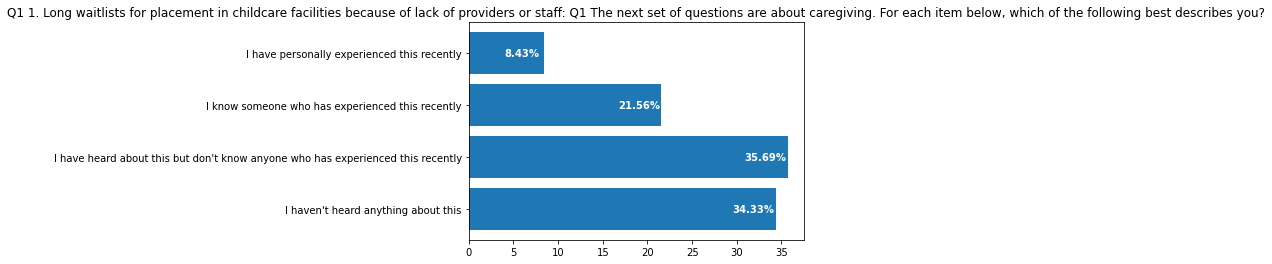

In [371]:
uni_bar('q1_1')

In [15]:
##################################
# WEIGHTED XTAB STACKED BAR PLOT #
##################################
def x_bar(i, j):
    prop, freq = weighted_xtabs(i, j)
    fig, ax = plt.subplots()

    if len(labels_dict[i]) >= 2:
        resp1 = prop.iloc[0]
        bar1 = ax.barh(prop.columns, resp1.values, label=resp1.name, alpha = 0.7)
        for x,y in zip(resp1.values, prop.columns):
            label = f"{round(x)}%"
            ax.annotate(label, (x/2,y), ha='center', va='bottom')
        for x,y,z in zip(freq.iloc[0].values, prop.columns, resp1.values):
            label = f"({round(x)})"
            ax.annotate(label, (z/2,y), ha='center', va='top')
        resp2 = prop.iloc[1]
        left2 = resp1.values
        bar2 = ax.barh(prop.columns, resp2.values, label=resp2.name, alpha = 0.7, left=left2)
        for x,y,l in zip(resp2.values, prop.columns, left2):
            label = f"{round(x)}%"
            ax.annotate(label, ((x/2)+l,y), ha='center', va='bottom')
        for x,y,l,z in zip(freq.iloc[1].values, prop.columns, left2, resp2.values):
            label = f"({round(x)})"
            ax.annotate(label, ((z/2)+l,y), ha='center', va='top')
    if len(labels_dict[i]) >= 3:
        resp3 = prop.iloc[2]
        left3 = left2 + resp2.values
        bar3 = ax.barh(prop.columns, resp3.values, label=resp3.name, alpha = 0.7, left = left3)
        for x,y,l in zip(resp3.values, prop.columns, left3):
            label = f"{round(x)}%"
            ax.annotate(label, ((x/2)+l,y), ha='center', va='bottom')
        for x,y,l,z in zip(freq.iloc[2].values, prop.columns, left3, resp3.values):
            label = f"({round(x)})"
            ax.annotate(label, ((z/2)+l,y), ha='center', va='top')
    if len(labels_dict[i]) >=4:
        resp4 = prop.iloc[3]
        left4 = left3 + resp3.values
        bar4 = ax.barh(prop.columns, resp4.values, label=resp4.name, alpha = 0.7, left = left4)
        for x,y,l in zip(resp4.values, prop.columns, left4):
            label = f"{round(x)}%"
            ax.annotate(label, ((x/2)+l,y), ha='center', va='bottom')
        for x,y,l,z in zip(freq.iloc[3].values, prop.columns, left4, resp4.values):
            label = f"({round(x)})"
            ax.annotate(label, ((z/2)+l,y), ha='center', va='top')
    if len(labels_dict[i]) >=5:
        resp5 = prop.iloc[4]
        left5 = left4 + resp4.values
        bar5 = ax.barh(prop.columns, resp5.values, label=resp5.name, alpha = 0.7, left = left5)
        for x,y,l in zip(resp5.values, prop.columns, left5):
            label = f"{round(x)}%"
            ax.annotate(label, ((x/2)+l,y), ha='center', va='bottom')
        for x,y,l,z in zip(freq.iloc[4].values, prop.columns, left5, resp5.values):
            label = f"({round(x)})"
            ax.annotate(label, ((z/2)+l,y), ha='center', va='top')
    if len(labels_dict[i]) >=6:
        resp6 = prop.iloc[5]
        left6 = left5 + resp5.values
        bar6 = ax.barh(prop.columns, resp6.values, label=resp6.name, alpha = 0.7, left = left6)
        for x,y,l in zip(resp6.values, prop.columns, left6):
            label = f"{round(x)}%"
            ax.annotate(label, ((x/2)+l,y), ha='center', va='bottom')
        for x,y,l,z in zip(freq.iloc[5].values, prop.columns, left6, resp6.values):
            label = f"({round(x)})"
            ax.annotate(label, ((z/2)+l,y), ha='center', va='top')

    plt.title(meta_dict[i] + "\n" + meta_dict[j])
    plt.legend(loc = (0,-0.4))
    ax.invert_yaxis()

    return plt.show();

In [432]:
wording_dict = meta_dict
response_dict = labels_dict

In [433]:
prop, freq = bivar_tables('q1_1', 'sex', 'weight', data)
prop

sex                                                                               Male  \
q1_1                                                                                     
I haven't heard anything about this                                              29.59   
I have heard about this but don't know anyone who has experienced this recently  34.48   
I know someone who has experienced this recently                                 25.23   
I have personally experienced this recently                                      10.69   

sex                                                                              Female  \
q1_1                                                                                      
I haven't heard anything about this                                               38.16   
I have heard about this but don't know anyone who has experienced this recently   36.75   
I know someone who has experienced this recently                                  18.35   
I have personally experienced this recently                                        6.74   

sex                                                                              All Others  
q1_1                                                                                         
I haven't heard anything about this                                                   42.98  
I have heard about this but don't know anyone who has experienced this recently       35.90  
I know someone who has experienced this recently                                      20.01  
I have personally experienced this recently                                            1.11

In [434]:
prop.columns

Index(['Male', 'Female', 'All Others'], dtype='object', name='sex')

In [440]:
i = 1
x = 'q1_1'
resp = prop.iloc[i]
resp

sex
Male          34.48
Female        36.75
All Others    35.90
Name: I have heard about this but don't know anyone who has experienced this recently, dtype: float64

In [16]:
def bivar_bar(x, y, w, df):
    """Bivariate 100% stacked horizontal bar chart.
    
    Keyword arguments:
    x -- the 'row' variable
    y -- the 'column' variable (proportions will sum to 100 for each column)
    w -- the name of the weight column
    df - the dataframe or subset
    """
    prop, freq = bivar_tables(x, y, w, df)
    fig, ax = plt.subplots(figsize = (11,6))
    ax.set_xticks([])
    left = [0] * len(response_dict[y])
    for i in range(0, len(response_dict[x])):
        resp = prop.iloc[i]
        ax.barh(prop.columns, resp.values, label=resp.name, alpha = 0.7, left = left)
        for a,b,l in zip(resp.values, prop.columns, left):
            label = f"{round(a)}%"
            ax.annotate(label, ((a/2)+l,b), ha='center', va='bottom')
        for a,b,l,z in zip(freq.iloc[i].values, prop.columns, left, resp.values):
            label = f"({round(a)})"
            ax.annotate(label, ((z/2)+l,b), ha='center', va='top')
        left += resp.values

    plt.title(wording_dict[x] + "\n" + wording_dict[y])
    plt.legend(loc = 'upper left', bbox_to_anchor = (0,0), frameon = False)
    ax.invert_yaxis()
    sns.despine(left = True, bottom = True)

    return plt.show();

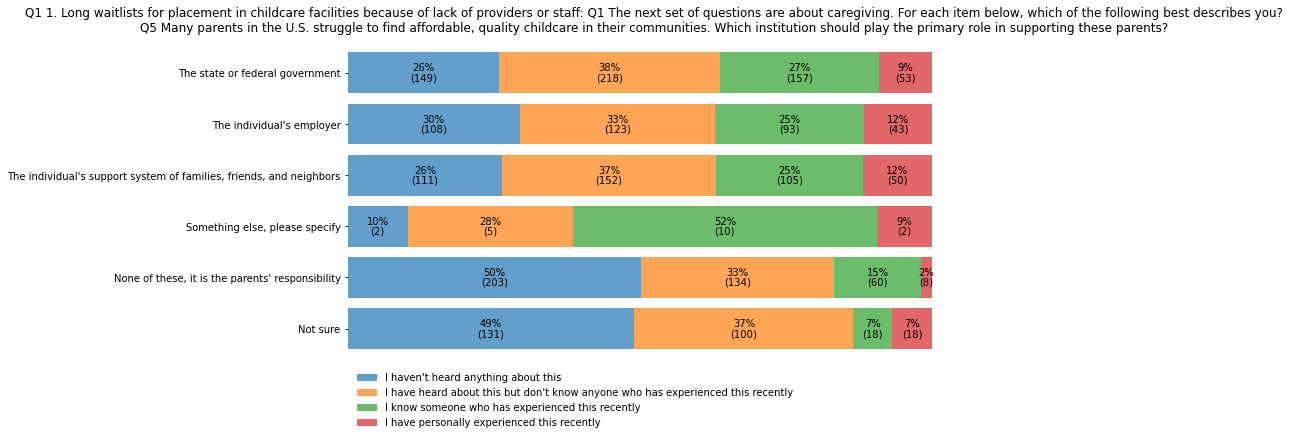

In [495]:
bivar_bar('q1_1', 'q5', 'weight', data)

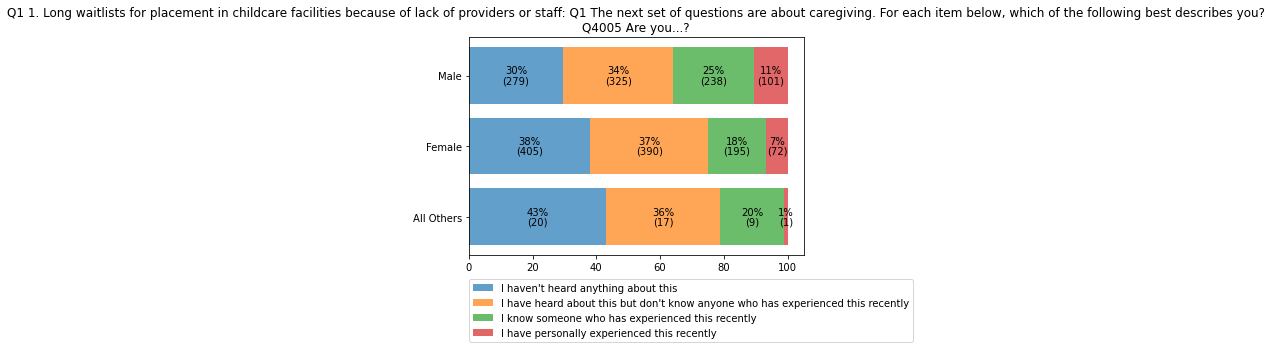

In [468]:
bivar_bar('q1_1', 'sex', 'weight', data)

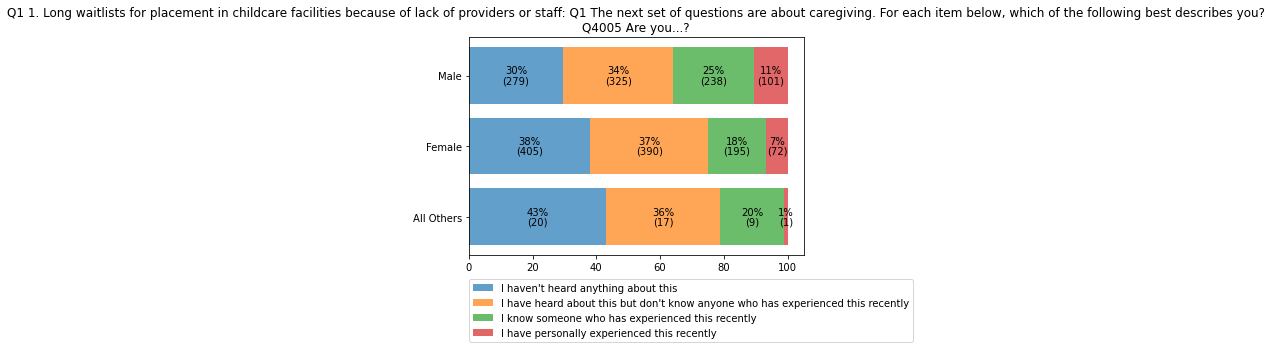

In [466]:
x_bar('q1_1', 'sex')

In [ ]:
meta_dict['disposable_assets']

In [ ]:
weighted_freq('disposable_assets')

In [ ]:
weighted_freq('sex')

In [ ]:
prop, freq = weighted_xtabs('q1_1', 'sex')

In [ ]:
prop

In [ ]:
freq

In [ ]:
x_bar('q1_1', 'marital_grouped')

In [ ]:
demos

# RECODE/TRANSFORM

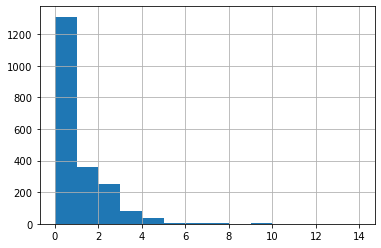

In [21]:
data['hh_children'].hist(bins = 14);

In [23]:
freq = data[['hh_children', 'weight']].groupby('hh_children').sum()['weight']
freq

hh_children
0     1306.40955
1      357.31814
2      249.33108
3       73.41776
4       43.82259
5        4.74005
6        5.81048
7        5.68034
8        1.45239
9        0.84369
12       2.00729
14       1.16663
Name: weight, dtype: float64

In [17]:
########################
# RECODE 'HH_CHILDREN' #
########################
data['hh_children_rec'] = np.where(data['hh_children'] > 4, 4, data['hh_children'])

# update meta dict with question wording
meta_dict['hh_children_rec'] = meta_dict['hh_children']

# update labels dict with categories and labels
labels_dict['hh_children_rec'] = {
    0: "No children in household",
    1: "1 child in household",
    2: "2 children in household",
    3: "3 children in household",
    4: "4 or more children in household"
}

In [26]:
data[['hh_children_rec', 'weight']].groupby('hh_children_rec').sum()['weight']

hh_children_rec
0    1306.40955
1     357.31814
2     249.33108
3      73.41776
4      65.52346
Name: weight, dtype: float64

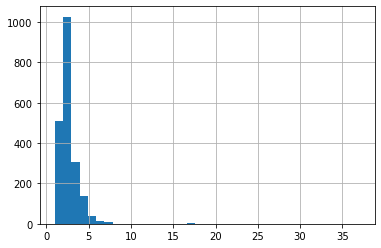

In [30]:
#data['hh_adults'].describe()
data['hh_adults'].hist(bins = 37);

In [31]:
data[['hh_adults', 'weight']].groupby('hh_adults').sum()['weight']

hh_adults
1      394.52572
2     1029.62143
3      381.76536
4      154.52730
5       40.01072
6       21.13284
7        8.88618
8        0.47074
10       2.84811
17       2.20055
18       0.26247
19       5.00000
20       4.90424
22       1.10316
33       0.20004
34       2.01319
36       0.64642
37       1.88152
Name: weight, dtype: float64

In [18]:
######################
# RECODE 'HH_ADULTS' #
######################
data['hh_adults_rec'] = np.where(data['hh_adults'] > 5, 5, data['hh_adults'])

# update meta dict with question wording
meta_dict['hh_adults_rec'] = meta_dict['hh_adults']

# update labels dict with categories and labels
labels_dict['hh_adults_rec'] = {
    1: "1 adult in household",
    2: "2 adults in household",
    3: "3 adults in household",
    4: "4 adults in household", 
    5: "5 or more adults in household"
}

In [33]:
data[['hh_adults_rec', 'weight']].groupby('hh_adults_rec').sum()['weight']

hh_adults_rec
1     394.52572
2    1029.62143
3     381.76536
4     154.52730
5      91.56018
Name: weight, dtype: float64

In [51]:
data['child_sum'] = data['child_lt3']+data['child_3_lt6']+data['child_6_lt10']+data['child_10_lt13']
data[['child_sum', 'weight']].groupby('child_sum').sum()['weight']

child_sum
0    1531.12147
1     363.79192
2     126.97813
3      22.92139
4       7.18708
Name: weight, dtype: float64

In [19]:
###########################
# CREATE 'CHILD_NET_LT13' #
###########################

condition = (data['child_lt3'] == 1)|(data['child_3_lt6'] == 1)|(data['child_6_lt10'] == 1)|(data['child_10_lt13'] == 1)

data['child_net_lt13'] = np.where(condition, 1, 0)

# update meta dict with question wording
meta_dict['child_net_lt13'] = "Are you the parent/legal guardian of any child/children who is/are 12 years old or younger?"

# update labels dict with categories and labels
labels_dict['child_net_lt13'] = {
    0: "No",
    1: "Yes"
}

In [53]:
weighted_freq('child_net_lt13')

Labels   Prop  Freq
child_net_lt13                    
0                  No  74.62  1531
1                 Yes  25.38   521

In [20]:
###########################
# CREATE 'CHILD_NET_13up' #
###########################

condition = (data['child_13_lt18'] == 1)|(data['child_18up'] == 1)

data['child_net_13up'] = np.where(condition, 1, 0)

# update meta dict with question wording
meta_dict['child_net_13up'] = "Are you the parent/legal guardian of any child/children who is/are 13 years old or older?"

# update labels dict with categories and labels
labels_dict['child_net_13up'] = {
    0: "No",
    1: "Yes"
}

In [99]:
weighted_freq('child_net_13up')

Labels   Prop  Freq
child_net_13up                    
0                  No  61.59  1264
1                 Yes  38.41   788

In [35]:
weighted_freq('educ')

Labels   Prop  Freq
educ                                                                  
1                                   Less than high school   2.82    58
2                              Completed some high school   6.41   131
3          High school graduate or equivalent (e.g., GED)  18.97   389
4                   Completed some college, but no degree  19.82   407
5               College graduate (e.g., B.A., A.B., B.S.)  18.38   377
6           Completed some graduate school, but no degree   2.75    56
7     Completed graduate school (e.g., M.S., M.D., Ph.D.)  14.58   299
70                                     Associate's degree  12.10   248
71       Job-specific training programs after high school   4.18    86

In [21]:
####################
# RECODE EDUCATION #
####################
conditions = [
    data['educ'] < 4,
    (data['educ'] == 70)|(data['educ'] == 71),
    data['educ'] == 4,
    data['educ'] == 5,
    (data['educ'] == 6)|(data['educ'] == 7)
]
outputs = [1, 2, 3, 4, 5]
data['educ_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
meta_dict['educ_rec'] = meta_dict['educ']

# update labels dict with categories and labels
labels_dict['educ_rec'] = {
    1: "High school or less",
    2: "Associate's or occupational training",
    3: "Some college",
    4: "College degree",
    5: "Graduate school or degree"
}

In [48]:
weighted_freq('educ_rec')

Labels   Prop  Freq
educ_rec                                                   
1                          High school or less  28.19   579
2         Associate's or occupational training  16.28   334
3                                 Some college  19.82   407
4                               College degree  18.38   377
5                    Graduate school or degree  17.33   356

In [78]:
weighted_freq('income')

Labels   Prop  Freq
income                                    
1           Less than $15,000   5.93   122
2         \$15,000 to $24,999   5.71   117
3         \$25,000 to $34,999   6.59   135
4         \$35,000 to $49,999  10.10   207
5         \$50,000 to $74,999  15.86   325
6         \$75,000 to $99,999  12.77   262
7       \$100,000 to $124,999  12.48   256
8       \$125,000 to $149,999   9.36   192
9       \$150,000 to $199,999   8.66   178
10      \$200,000 to $249,999   2.73    56
11           $250,000 or more   3.82    78
99          Decline to answer   5.97   123

In [22]:
#################
# RECODE INCOME #
#################
conditions = [
    data['income'] < 3,
    (data['income'] == 3)|(data['income'] == 4),
    data['income'] == 5,
    data['income'] == 6,
    (data['income'] > 6)&(data['income'] < 12),
    data['income'] == 99
]
outputs = [1, 2, 3, 4, 5, 6]
data['income_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
meta_dict['income_rec'] = meta_dict['income']

# update labels dict with categories and labels
labels_dict['income_rec'] = {
    1: "Less than $25,000",
    2: "\$25,000 to $49,999",
    3: "\$50,000 to $74,999",
    4: "\$75,000 to $99,999",
    5: "$100,000 or higher",
    6: "Declined"
}

In [117]:
weighted_freq('income_rec')

Labels   Prop  Freq
income_rec                                  
1             Less than $25,000  11.65   239
2           \$25,000 to $49,999  16.69   342
3           \$50,000 to $74,999  15.86   325
4           \$75,000 to $99,999  12.77   262
5            $100,000 or higher  37.06   760
6                      Declined   5.97   123

In [112]:
weighted_freq('disposable_assets')

Labels   Prop  Freq
disposable_assets                                        
1                          Less than $10,000  22.49   461
2                        \$10,000 to $24,999   7.33   150
3                        \$25,000 to $49,999   8.55   175
4                        \$50,000 to $99,999   8.26   169
5                      \$100,000 to $249,999   9.69   199
6                      \$250,000 to $499,999   6.52   134
7                      \$500,000 to $749,999   3.80    78
8                      \$750,000 to $999,999   3.60    74
9                  \$1,000,000 to $2,499,999   5.52   113
10                 \$2,500,000 to $4,999,999   2.68    55
11                        $5,000,000 or more   1.61    33
98                                  Not sure   8.00   164
99                         Decline to answer  11.94   245

In [118]:
meta_dict['disposable_assets']

"Q2159 Many households have money that they invest for many purposes. Excluding any company pension or retirement plan or any property investments, what would you estimate your household's total investable and disposable assets to be?"

In [23]:
#################
# RECODE ASSETS #
#################
conditions = [
    data['disposable_assets'] == 1,
    (data['disposable_assets'] == 2)|(data['disposable_assets'] == 3),
    (data['disposable_assets'] == 4)|(data['disposable_assets'] == 5),
    (data['disposable_assets'] > 5)&(data['disposable_assets'] < 12),
    data['disposable_assets'] > 97
]
outputs = [1, 2, 3, 4, 5]
data['disposable_assets_rec'] = np.select(conditions, outputs)

# update meta dict with question wording
meta_dict['disposable_assets_rec'] = meta_dict['disposable_assets']

# update labels dict with categories and labels
labels_dict['disposable_assets_rec'] = {
    1: "Less than $10,000",
    2: "\$10,000 to $49,999",
    3: "\$50,000 to $249,999",
    4: "$250,000 or higher",
    5: "DK/Ref"
}

In [120]:
data.value_counts('disposable_assets').sort_index()

disposable_assets
1     581
2     167
3     195
4     162
5     158
6     109
7      60
8      52
9      78
10     31
11     18
98    188
99    253
dtype: int64

In [122]:
data.value_counts('disposable_assets_rec').sort_index()

disposable_assets_rec
1    581
2    362
3    320
4    348
5    441
dtype: int64

In [127]:
weighted_freq('disposable_assets_rec')

Labels   Prop  Freq
disposable_assets_rec                                   
1                         Less than $10,000  22.49   461
2                       \$10,000 to $49,999  15.88   326
3                      \$50,000 to $249,999  17.95   368
4                        $250,000 or higher  23.74   487
5                                    DK/Ref  19.94   409

In [128]:
data['q1_1'].value_counts().sort_index()

1    703
2    738
3    442
4    169
Name: q1_1, dtype: int64

In [130]:
data['q1_1_bin'].value_counts().sort_index()

0     703
1    1349
Name: q1_1_bin, dtype: int64

In [24]:
##################
## TRANSFORM Q1 ##
##################

# binary for haven't heard = 0, all else = 1
data['q1_1_bin'] = np.where(data['q1_1'] == 1, 0, 1)
data['q1_2_bin'] = np.where(data['q1_2'] == 1, 0, 1)
data['q1_3_bin'] = np.where(data['q1_3'] == 1, 0, 1)
data['q1_4_bin'] = np.where(data['q1_4'] == 1, 0, 1)
data['q1_5_bin'] = np.where(data['q1_5'] == 1, 0, 1)

# update meta_dict with q wording new vars
meta_dict['q1_1_bin'] = meta_dict['q1_1']
meta_dict['q1_2_bin'] = meta_dict['q1_2']
meta_dict['q1_3_bin'] = meta_dict['q1_3']
meta_dict['q1_4_bin'] = meta_dict['q1_4']
meta_dict['q1_5_bin'] = meta_dict['q1_5']

# update labels dict with q labels new vars
labels_dict['q1_1_bin'] = {0: "Haven't heard about this",
                           1: "Have heard, know someone, or experienced myself"}
labels_dict['q1_2_bin'] = {0: "Haven't heard about this",
                           1: "Have heard, know someone, or experienced myself"}
labels_dict['q1_3_bin'] = {0: "Haven't heard about this",
                           1: "Have heard, know someone, or experienced myself"}
labels_dict['q1_4_bin'] = {0: "Haven't heard about this",
                           1: "Have heard, know someone, or experienced myself"}
labels_dict['q1_5_bin'] = {0: "Haven't heard about this",
                           1: "Have heard, know someone, or experienced myself"}

# binary for know or experienced = 1, all else = 0
data['q1_1_know_exp'] = np.where(data['q1_1'] >= 3, 1, 0)
data['q1_2_know_exp'] = np.where(data['q1_2'] >= 3, 1, 0)
data['q1_3_know_exp'] = np.where(data['q1_3'] >= 3, 1, 0)
data['q1_4_know_exp'] = np.where(data['q1_4'] >= 3, 1, 0)
data['q1_5_know_exp'] = np.where(data['q1_5'] >= 3, 1, 0)

# update meta_dict with q wording new vars
meta_dict['q1_1_know_exp'] = meta_dict['q1_1']
meta_dict['q1_2_know_exp'] = meta_dict['q1_2']
meta_dict['q1_3_know_exp'] = meta_dict['q1_3']
meta_dict['q1_4_know_exp'] = meta_dict['q1_4']
meta_dict['q1_5_know_exp'] = meta_dict['q1_5']

# update labels dict with q labels new vars
labels_dict['q1_1_know_exp'] = {0: "Haven't experienced/Don't know someone",
                                1: "Know someone or experienced myself"}
labels_dict['q1_2_know_exp'] = {0: "Haven't experienced/Don't know someone",
                                1: "Know someone or experienced myself"}
labels_dict['q1_3_know_exp'] = {0: "Haven't experienced/Don't know someone",
                                1: "Know someone or experienced myself"}
labels_dict['q1_4_know_exp'] = {0: "Haven't experienced/Don't know someone",
                                1: "Know someone or experienced myself"}
labels_dict['q1_5_know_exp'] = {0: "Haven't experienced/Don't know someone",
                                1: "Know someone or experienced myself"}

# experienced any Q1
condition_exp = (data['q1_1'] == 4)|(data['q1_2'] == 4)|(data['q1_3'] == 4)|(data['q1_4'] == 4)|(data['q1_5'] == 4)
data['q1_all_exp'] = np.where(condition_exp, 1, 0)
meta_dict['q1_all_exp'] = "Q1 The next set of questions are about caregiving. For each item below, which of the following best describes you? Experienced any."
labels_dict['q1_all_exp'] = {0: "Has not personally experienced this recently",
                             1: "Has personally experienced this recently"}

# know or experienced any Q1
condition_know_exp = (data['q1_1'] >= 3)|(data['q1_2'] >= 3)|(data['q1_3'] >= 3)|(data['q1_4'] >= 3)|(data['q1_5'] >= 3)
data['q1_all_know_exp'] = np.where(condition_know_exp, 1, 0)
meta_dict['q1_all_know_exp'] = "Q1 The next set of questions are about caregiving. For each item below, which of the following best describes you? Know or experienced any."
labels_dict['q1_all_know_exp'] = {0: "Does now know someone or has not personally experienced this recently",
                                  1: "Knows someone or has personally experienced this recently"}

In [214]:
meta_dict['q3_1']

'Q3 1. Parents who work non-standard hours (e.g., third shift): Q3 How would you rate the performance of the U.S. childcare system in addressing the needs of the following groups?'

In [25]:
###############
# RECODE Q3_1 #
###############
conditions = [
    (data['q3_1'] == 1)|(data['q3_1'] == 2),
    (data['q3_1'] == 3)|(data['q3_1'] == 4),
    data['q3_1'] == 5
]
outputs = [1, 2, 3]
data['q3_1_grpd'] = np.select(conditions, outputs)

# update meta dict with question wording
meta_dict['q3_1_grpd'] = meta_dict['q3_1']

# update labels dict with categories and labels
labels_dict['q3_1_grpd'] = {
    1: "Poor",
    2: "Good",
    3: "DK"
}

In [26]:
###############
# RECODE Q3_2 #
###############
conditions = [
    (data['q3_2'] == 1)|(data['q3_2'] == 2),
    (data['q3_2'] == 3)|(data['q3_2'] == 4),
    data['q3_2'] == 5
]
outputs = [1, 2, 3]
data['q3_2_grpd'] = np.select(conditions, outputs)

# update meta dict with question wording
meta_dict['q3_2_grpd'] = meta_dict['q3_2']

# update labels dict with categories and labels
labels_dict['q3_2_grpd'] = {
    1: "Poor",
    2: "Good",
    3: "DK"
}

In [27]:
###############
# RECODE Q3_3 #
###############
conditions = [
    (data['q3_3'] == 1)|(data['q3_3'] == 2),
    (data['q3_3'] == 3)|(data['q3_3'] == 4),
    data['q3_3'] == 5
]
outputs = [1, 2, 3]
data['q3_3_grpd'] = np.select(conditions, outputs)

# update meta dict with question wording
meta_dict['q3_3_grpd'] = meta_dict['q3_3']

# update labels dict with categories and labels
labels_dict['q3_3_grpd'] = {
    1: "Poor",
    2: "Good",
    3: "DK"
}

In [28]:
###############
# RECODE Q3_4 #
###############
conditions = [
    (data['q3_4'] == 1)|(data['q3_4'] == 2),
    (data['q3_4'] == 3)|(data['q3_4'] == 4),
    data['q3_4'] == 5
]
outputs = [1, 2, 3]
data['q3_4_grpd'] = np.select(conditions, outputs)

# update meta dict with question wording
meta_dict['q3_4_grpd'] = meta_dict['q3_4']

# update labels dict with categories and labels
labels_dict['q3_4_grpd'] = {
    1: "Poor",
    2: "Good",
    3: "DK"
}

In [542]:
data['q3_1_grpd'].value_counts()

1    946
2    787
3    319
Name: q3_1_grpd, dtype: int64

In [546]:
labels_dict['q3_4_grpd']

{1: 'Poor', 2: 'Good', 3: 'DK'}

In [554]:
meta_dict['q3_1']

'Q3 1. Parents who work non-standard hours (e.g., third shift): Q3 How would you rate the performance of the U.S. childcare system in addressing the needs of the following groups?'

In [29]:
############################
# RECODE Q3 - GOOD DUMMIES #
############################
q3_1_good = np.where(data['q3_1_grpd'] == 2, 1, 0)
q3_2_good = np.where(data['q3_2_grpd'] == 2, 1, 0)
q3_3_good = np.where(data['q3_3_grpd'] == 2, 1, 0)
q3_4_good = np.where(data['q3_4_grpd'] == 2, 1, 0)
data['q3_good'] = q3_1_good + q3_2_good + q3_3_good + q3_4_good
meta_dict['q3_good'] = "Q3 How would you rate the performance of the U.S. childcare system in addressing the needs of the following groups?"
labels_dict['q3_good'] = {
    0: "good for 0 groups",
    1: "good for 1 group",
    2: "good for 2 groups", 
    3: "good for 3 groups",
    4: "good for 4 groups"
}

In [30]:
##################
## TRANSFORM Q4 ##
##################

data['q4_1_bin'] = np.where(data['q4_1'] <=2, 1, 0)
meta_dict['q4_1_bin'] = meta_dict['q4_1']
labels_dict['q4_1_bin'] = {0: "Affordable",
                           1: "Expensive"}

data['q4_2_bin'] = np.where(data['q4_2'] <=2, 1, 0)
meta_dict['q4_2_bin'] = meta_dict['q4_2']
labels_dict['q4_2_bin'] = {0: "Easy to come by",
                           1: "Difficult to come by"}

data['q4_3_bin'] = np.where(data['q4_3'] <=2, 1, 0)
meta_dict['q4_3_bin'] = meta_dict['q4_3']
labels_dict['q4_3_bin'] = {0: "Good quality",
                           1: "Poor quality"}

data['q4_4_bin'] = np.where(data['q4_4'] <=2, 1, 0)
meta_dict['q4_4_bin'] = meta_dict['q4_4']
labels_dict['q4_4_bin'] = {0: "Near home or work",
                           1: "Far from home or work"}


In [31]:
#############
# RECODE Q5 #
#############
conditions = [
    data['q5'] == 1,
    data['q5'] == 2,
    data['q5'] == 3,
    data['q5'] == 5, 
    (data['q5'] == 4)|(data['q5'] == 6)
]
outputs = [1, 2, 3, 4, 5]
data['q5_grpd'] = np.select(conditions, outputs)

# update meta dict with question wording
meta_dict['q5_grpd'] = meta_dict['q5']

# update labels dict with categories and labels
labels_dict['q5_grpd'] = {
    1: "Government",
    2: "Employer",
    3: "Individual support system",
    4: "Parents' responsibility",
    5: "Not sure/something else"
}

In [164]:
##################
## TRANSFORM Q6 ##
##################
q6_1_should = np.where(data['q6_1'] == 1, 1, 0)
q6_2_should = np.where(data['q6_2'] == 1, 1, 0)
q6_3_should = np.where(data['q6_3'] == 1, 1, 0)
q6_4_should = np.where(data['q6_4'] == 1, 1, 0)
q6_5_should = np.where(data['q6_5'] == 1, 1, 0)
q6_6_should = np.where(data['q6_6'] == 1, 1, 0)
q6_7_should = np.where(data['q6_7'] == 1, 1, 0)
q6_8_should = np.where(data['q6_8'] == 1, 1, 0)
q6_9_should = np.where(data['q6_9'] == 1, 1, 0)

data['q6_should_sum'] = q6_1_should + q6_2_should + q6_3_should + q6_4_should + q6_5_should + q6_6_should + q6_7_should + q6_8_should + q6_9_should
meta_dict['q6_should_sum'] = "Q6 please tell us whether companies should offer these as employee benefits to support working parents with child care needs (sum of items companies should offer)"
labels_dict['q6_should_sum'] = {
    0: "Should offer 0 childcare benefits for employees",
    1: "Should offer 1 childcare benefit for employees",
    2: "Should offer 2 childcare benefits for employees",
    3: "Should offer 3 childcare benefits for employees",
    4: "Should offer 4 childcare benefits for employees",
    5: "Should offer 5 childcare benefits for employees",
    6: "Should offer 6 childcare benefits for employees",
    7: "Should offer 7 childcare benefits for employees",
    8: "Should offer 8 childcare benefits for employees",
    9: "Should offer 9 childcare benefits for employees",
}

In [32]:
##################
## TRANSFORM Q7 ##
##################

data['q7_1_bin'] = np.where(data['q7_1'] <=2, 0, 1)
meta_dict['q7_1_bin'] = meta_dict['q7_1']
labels_dict['q7_1_bin'] = {0: "Disagree",
                           1: "Agree"}

data['q7_2_bin'] = np.where(data['q7_2'] <=2, 0, 1)
meta_dict['q7_2_bin'] = meta_dict['q7_2']
labels_dict['q7_2_bin'] = {0: "Disagree",
                           1: "Agree"}

In [33]:
##################
## TRANSFORM Q8 ##
##################

data['q8_bin'] = np.where(data['q8'] <=2, 0, 1)
meta_dict['q8_bin'] = meta_dict['q8']
labels_dict['q8_bin'] = {0: "Oppose",
                         1: "Support"}

In [38]:
########################################
## align dicts so funcitons will work ##
########################################

response_dict = labels_dict
wording_dict = meta_dict

# Write to CSV

In [388]:
# Q1_1: Q1_5 Total Proportions
q1_cats_dict = {
    'q1_1': "Long waitlists for placement in childcare facilities because of lack of providers or staff",
    'q1_2': "High and rising costs of childcare",
    'q1_3': "People leaving jobs or switching to part-time work to provide childcare in their families",
    'q1_4': "People delaying having children or having fewer children due to childcare considerations",
    'q1_5': "People missing work to provide childcare in their families"
}

q1_dict = {
    'q1_1': list(weighted_freq('q1_1').loc[:,'Prop'].astype(int)),
    'q1_2': list(weighted_freq('q1_2').loc[:,'Prop'].astype(int)),
    'q1_3': list(weighted_freq('q1_3').loc[:,'Prop'].astype(int)),
    'q1_4': list(weighted_freq('q1_4').loc[:,'Prop'].astype(int)),
    'q1_5': list(weighted_freq('q1_5').loc[:,'Prop'].astype(int))
}

q1_df = pd.DataFrame.from_dict(q1_dict, 
                               orient = 'index', 
                               columns = ['not_heard', 'heard', 'know_someone', 'experienced'])

q1_df = q1_df.join(pd.Series(q1_cats_dict, name = 'label'))

q1_df.to_csv('../data/q1_df.csv', index = False)

In [263]:
# experienced any Q1
# proportion by age categories
age_ser = weighted_xtabs('q1_all_exp', 'age_cat')[0].iloc[1].round().astype(int)
group_list = [age_ser.index.name] * len(age_ser)
subgroup_list = list(age_ser.index.values)
prop_list = list(age_ser.values)

# proportion by residential area
res_ser = weighted_xtabs('q1_all_exp', 'residential_area')[0].iloc[1].round().astype(int)
group_list += [res_ser.index.name] * len(res_ser)
subgroup_list += list(res_ser.index.values)
prop_list += list(res_ser.values)

# proportion by employment status
emp_ser = weighted_xtabs('q1_all_exp', 'employment_status')[0].iloc[1].round().astype(int)
group_list += [emp_ser.index.name] * len(emp_ser)
subgroup_list += ['Employed', 'Not employed']
prop_list += list(emp_ser.values)

# proportion by child age (nets)
group_list += ['child_age'] * 3
subgroup_list += ['12 or under', '13 or older', 'No children']
prop_list += [
    weighted_xtabs('q1_all_exp', 'child_net_lt13')[0].iloc[1]['Yes'].round().astype(int),
    weighted_xtabs('q1_all_exp', 'child_net_13up')[0].iloc[1]['Yes'].round().astype(int),
    weighted_xtabs('q1_all_exp', 'child_none')[0].iloc[1]['Yes'].round().astype(int)
]

# proportion by race
group_list += ['race_ethn'] * 3
subgroup_list += ['White', 'Hispanic', 'Black']
prop_list += [
    weighted_xtabs('q1_all_exp', 'race_white_nh')[0].iloc[1]['Yes'].round().astype(int),
    weighted_xtabs('q1_all_exp', 'race_hisp')[0].iloc[1]['Yes'].round().astype(int),
    weighted_xtabs('q1_all_exp', 'race_black_nh')[0].iloc[1]['Yes'].round().astype(int)
]

# dictionary
any_q1_dict = {
    'group': group_list,
    'subgroup': subgroup_list,
    'prop': prop_list
}

# dataframe
any_q1_df = pd.DataFrame(any_q1_dict)
any_q1_df.to_csv('../data/any_q1_df.csv', index = False)

In [264]:
# Q1s parents w/ child lt 13
sub_child_lt_13 = data[data['child_net_lt13'] == 1].copy()
n = sub_child_lt_13['weight'].sum()
freq_1 = sub_child_lt_13[['q1_1','weight']].groupby('q1_1').sum()['weight']
labels = freq_1.index.map(labels_dict['q1_1'])
prop_1 = (freq_1/n) * 100
freq_2 = sub_child_lt_13[['q1_2','weight']].groupby('q1_2').sum()['weight']
prop_2 = (freq_2/n) * 100
freq_3 = sub_child_lt_13[['q1_3','weight']].groupby('q1_3').sum()['weight']
prop_3 = (freq_3/n) * 100
freq_4 = sub_child_lt_13[['q1_4','weight']].groupby('q1_4').sum()['weight']
prop_4 = (freq_4/n) * 100
freq_5 = sub_child_lt_13[['q1_5','weight']].groupby('q1_5').sum()['weight']
prop_5 = (freq_5/n) * 100

q1_child_lt13_df = pd.DataFrame({'labels': labels, 
                                 'prop_1': prop_1, 
                                 'freq_1': freq_1, 
                                 'prop_2': prop_2, 
                                 'freq_2': freq_2,
                                 'prop_3': prop_3, 
                                 'freq_3': freq_3,
                                 'prop_4': prop_4, 
                                 'freq_4': freq_4,
                                 'prop_5': prop_5, 
                                 'freq_5': freq_5})
q1_child_lt13_df.to_csv('../data/q1_child_lt13_df.csv', index = False)

In [304]:
# q3 total and child_net_lt13
q_list = ['q3_1_grpd', 'q3_2_grpd', 'q3_3_grpd', 'q3_4_grpd']
group = []
quest = []
poor = []
good = []
dk = []
for q in q_list:
    freq = data[[q, 'weight']].groupby(q).sum()['weight']
    prop = round((freq/sum(freq))*100).astype('int')
    group += ['total']
    quest += [q]
    poor += [prop.loc[1]]
    good += [prop.loc[2]]
    dk += [prop.loc[3]]
for q in q_list:
    freq = data[data['child_net_lt13'] == 1][[q, 'weight']].groupby(q).sum()['weight']
    prop = round((freq/sum(freq))*100).astype('int')
    group += ['young_child']
    quest += [q]
    poor += [prop.loc[1]]
    good += [prop.loc[2]]
    dk += [prop.loc[3]]

q3_tot_yc_df = pd.DataFrame({'group': group, 
                             'quest': quest, 
                             'poor': poor, 
                             'good': good, 
                             'dk': dk})
q3_tot_yc_df.to_csv('../data/q3_tot_yc_df.csv', index = False)

In [306]:
# q3 by know/exp any q1
q_list = ['q3_1_grpd', 'q3_2_grpd', 'q3_3_grpd', 'q3_4_grpd']
group = []
quest = []
poor = []
good = []
dk = []
for q in q_list:
    freq = data[data['q1_all_know_exp'] == 1][[q, 'weight']].groupby(q).sum()['weight']
    prop = round((freq/sum(freq))*100).astype('int')
    group += ['know_exp']
    quest += [q]
    poor += [prop.loc[1]]
    good += [prop.loc[2]]
    dk += [prop.loc[3]]
for q in q_list:
    freq = data[data['q1_all_know_exp'] == 0][[q, 'weight']].groupby(q).sum()['weight']
    prop = round((freq/sum(freq))*100).astype('int')
    group += ['dont_know_exp']
    quest += [q]
    poor += [prop.loc[1]]
    good += [prop.loc[2]]
    dk += [prop.loc[3]]

q3_know_exp_df = pd.DataFrame({'group': group, 
                             'quest': quest, 
                             'poor': poor, 
                             'good': good, 
                             'dk': dk})
q3_know_exp_df.to_csv('../data/q3_know_exp_df.csv', index = False)

In [351]:
# q4 subs
group_name = ['total', 'child_net_lt13', 'child_net_13up', 'child_none', 'q1_all_exp_y', 'q1_all_exp_n',
              'q1_all_know_exp_y', 'q1_all_know_exp_n']
q_list = ['q4_1_bin', 'q4_2_bin', 'q4_3_bin', 'q4_4_bin']
group = []
quest = []
quest_resp = []
resp_0 = []
resp_1 = []

for g in group_name:
    if g == 'total':
        sub = data
    elif g == 'child_net_lt13':
        sub = data[data['child_net_lt13'] == 1]
    elif g == 'child_net_13up':
        sub = data[data['child_net_13up'] == 1]
    elif g == 'child_none':
        sub = data[data['child_none'] == 1]
    elif g == 'q1_all_exp_y':
        sub = data[data['q1_all_exp'] == 1]
    elif g == 'q1_all_exp_n':
        sub = data[data['q1_all_exp'] == 0]
    elif g == 'q1_all_know_exp_y':
        sub = data[data['q1_all_know_exp'] == 1]
    elif g == 'q1_all_know_exp_n':
        sub = data[data['q1_all_know_exp'] == 0]
    for q in q_list:
        freq = sub[[q, 'weight']].groupby(q).sum()['weight']
        prop = round((freq/sum(freq))*100).astype('int')
        group += [g]
        quest += [q]
        quest_resp += [labels_dict[q]]
        resp_0 += [prop.iloc[0]]
        resp_1 += [prop.loc[1]]
q4_df = pd.DataFrame({'group': group, 
                      'quest': quest, 
                      'quest_resp': quest_resp, 
                      'resp_0': resp_0, 
                      'resp_1': resp_1})
q4_df.to_csv('../data/q4_df.csv', index = False)

In [351]:
# q5 subs
group_name = ['total', 'child_net_lt13', 'child_net_13up', 'child_none', 'q1_all_exp_y', 'q1_all_exp_n',
              'q1_all_know_exp_y', 'q1_all_know_exp_n']
q_list = ['q4_1_bin', 'q4_2_bin', 'q4_3_bin', 'q4_4_bin']
group = []
quest = []
quest_resp = []
resp_0 = []
resp_1 = []

for g in group_name:
    if g == 'total':
        sub = data
    elif g == 'child_net_lt13':
        sub = data[data['child_net_lt13'] == 1]
    elif g == 'child_net_13up':
        sub = data[data['child_net_13up'] == 1]
    elif g == 'child_none':
        sub = data[data['child_none'] == 1]
    elif g == 'q1_all_exp_y':
        sub = data[data['q1_all_exp'] == 1]
    elif g == 'q1_all_exp_n':
        sub = data[data['q1_all_exp'] == 0]
    elif g == 'q1_all_know_exp_y':
        sub = data[data['q1_all_know_exp'] == 1]
    elif g == 'q1_all_know_exp_n':
        sub = data[data['q1_all_know_exp'] == 0]
    for q in q_list:
        freq = sub[[q, 'weight']].groupby(q).sum()['weight']
        prop = round((freq/sum(freq))*100).astype('int')
        group += [g]
        quest += [q]
        quest_resp += [labels_dict[q]]
        resp_0 += [prop.iloc[0]]
        resp_1 += [prop.loc[1]]
q4_df = pd.DataFrame({'group': group, 
                      'quest': quest, 
                      'quest_resp': quest_resp, 
                      'resp_0': resp_0, 
                      'resp_1': resp_1})
q4_df.to_csv('../data/q4_df.csv', index = False)

In [563]:
# Q5 loop through all y variables and pickle a dictionary of dataframes with crosstabs
q5_df_dict = {}
x = 'q5_grpd'
y_list = ['q1_all_exp', 'q1_all_know_exp', 'q3_good', 'q4_1_bin', 'q4_2_bin', 'q4_3_bin', 'q4_4_bin',
          'child_net_lt13', 'child_net_13up', 'child_none', 'age_cat', 'residential_area', 'employment_status',
          'region', 'race_white_nh', 'race_hisp', 'race_black_nh', 'party_id']
w = 'weight'
df = data

q5_df_dict['total'] = univar_table(x, w, data)
for y in y_list:
    x_labs = response_dict[x]
    y_labs = response_dict[y]
    tab_prop = pd.crosstab(index = df[y].map(y_labs), 
                       columns = df[x], 
                       values = df[w],
                       aggfunc = sum,
                       normalize = 'index')
    tab_prop = tab_prop.loc[y_labs.values()].loc[:,x_labs.keys()]
    tab_prop = round(tab_prop, ndigits = 2) * 100
    q5_df_dict[y] = tab_prop

with open('../data/q5.pickle', 'wb') as f:
    pickle.dump(q5_df_dict, f, pickle.HIGHEST_PROTOCOL)

In [211]:
# q6 dataframe
q6_dict = {'q6_1': "On-site childcare", 
          'q6_2': "Discounted or subsidized full-day childcare at an off-site childcare center", 
          'q6_3': "Discounted or subsidized backup child care service when there is an emergency",
          'q6_4': "Discounted or subsidized after-school care programs at an off-site childcare center", 
          'q6_5': "'Pre-tax' dependent care spending account (FSA)", 
          'q6_6': "Allowing employees flexibility in their work schedules", 
          'q6_7': "Extra paid time off or paid leave allotments for caregiving", 
          'q6_8': "Quality part-time or job-sharing opportunities with predictable hours, pay and benefits", 
          'q6_9': "Help locating facilities that can accommodate child care for parents working non-standard hours"}
quest = []
label = []
tot = []
gov = []
emp = []
sup_sys = []
par_res = []

for q in list(q6_dict.keys()):
    quest += [q]
    label += [q6_dict[q]]
    tot += [round(univar_table(q, 'weight', data).loc[1, 'Prop'])]
    temp, ignore = bivar_tables(q, 'q5_grpd', 'weight', data)
    gov += [round(temp.iloc[0][0])]
    emp += [round(temp.iloc[0][1])]
    sup_sys += [round(temp.iloc[0][2])]
    par_res += [round(temp.iloc[0][3])]

q6_df = pd.DataFrame({'quest': quest, 
                      'label': label, 
                      'tot': tot,
                      'gov': gov,
                      'emp': emp,
                      'sup_sys': sup_sys,
                      'par_res': par_res})
q6_df.to_csv('../data/q6_df.csv', index = False)

In [197]:
np.average(data[data['q5_grpd'] == 1]['q6_should_sum'], weights = data[data['q5_grpd'] == 1]['weight'])

6.737232321121266

In [198]:
np.average(data[data['q5_grpd'] == 2]['q6_should_sum'], weights = data[data['q5_grpd'] == 2]['weight'])

6.482488937444149

In [199]:
np.average(data[data['q5_grpd'] == 3]['q6_should_sum'], weights = data[data['q5_grpd'] == 3]['weight'])

5.253819721830487

In [200]:
np.average(data[data['q5_grpd'] == 4]['q6_should_sum'], weights = data[data['q5_grpd'] == 4]['weight'])

3.92162134852491

In [266]:
# q7 dataframe
q7_var = ['q7_1_bin', 'q7_2_bin']
q7_df = pd.DataFrame()
for v in q7_var:
    temp = univar_table(v, 'weight', data)
    temp.reset_index(inplace = True, drop = True)
    temp['quest'] = v
    q7_df = pd.concat([q7_df, temp])
q7_df.reset_index(inplace = True, drop = True)
q7_df.drop(columns = 'Freq', inplace = True)
q7_df['Prop'] = round(q7_df['Prop']).astype('int')
q7_df.to_csv('../data/q7_df.csv', index = False)

In [305]:
# q8 dataframe
q8_var = ['q1_all_exp', 'age_cat', 'q5_grpd']
quest = ['total']
group = ['total']
prop_sup = [round(univar_table('q8_bin', 'weight', data).loc[1, 'Prop'])]
for v in q8_var:
    temp, ignore = bivar_tables('q8_bin', v, 'weight', data)
    temp = temp.loc[['Support']].T
    quest += [v]*len(temp.index)
    group += list(temp.index)
    prop_sup += list(round(temp['Support']).astype('int'))
q8_df = pd.DataFrame({
    'quest': quest,
    'group': group,
    'prop_sup': prop_sup
})
q8_df.to_csv('../data/q8_df.csv', index = False)

In [310]:
meta_dict['q8']

'Q8 To what extent do you support or oppose a federal policy that requires employers to provide up to 12 weeks of paid leave for workers or who need to take care of a sick spouse, child, or parent?'

In [315]:
data['child_net_lt13'].value_counts()

0    1530
1     522
Name: child_net_lt13, dtype: int64

In [319]:
prop, freq = bivar_tables('q1_all_know_exp', 'child_net_lt13', 'weight', data)
prop

child_net_lt13                                                            No  \
q1_all_know_exp                                                                
Does now know someone or has not personally experienced this recently  49.26   
Knows someone or has personally experienced this recently              50.74   

child_net_lt13                                                           Yes  
q1_all_know_exp                                                               
Does now know someone or has not personally experienced this recently  15.26  
Knows someone or has personally experienced this recently              84.74

In [320]:
prop, freq = bivar_tables('q1_all_know_exp', 'child_net_13up', 'weight', data)
prop

child_net_13up                                                            No  \
q1_all_know_exp                                                                
Does now know someone or has not personally experienced this recently  38.63   
Knows someone or has personally experienced this recently              61.37   

child_net_13up                                                           Yes  
q1_all_know_exp                                                               
Does now know someone or has not personally experienced this recently  43.85  
Knows someone or has personally experienced this recently              56.15

In [321]:
prop, freq = bivar_tables('q1_all_know_exp', 'child_none', 'weight', data)
prop

child_none                                                                No  \
q1_all_know_exp                                                                
Does now know someone or has not personally experienced this recently  35.31   
Knows someone or has personally experienced this recently              64.69   

child_none                                                               Yes  
q1_all_know_exp                                                               
Does now know someone or has not personally experienced this recently  47.97  
Knows someone or has personally experienced this recently              52.03

In [322]:
univar_table('q1_all_know_exp', 'weight', data)

Labels  \
q1_all_know_exp                                                                          
0                Does now know someone or has not personally experienced this recently   
1                            Knows someone or has personally experienced this recently   

                  Prop  Freq  
q1_all_know_exp               
0                40.63   834  
1                59.37  1218

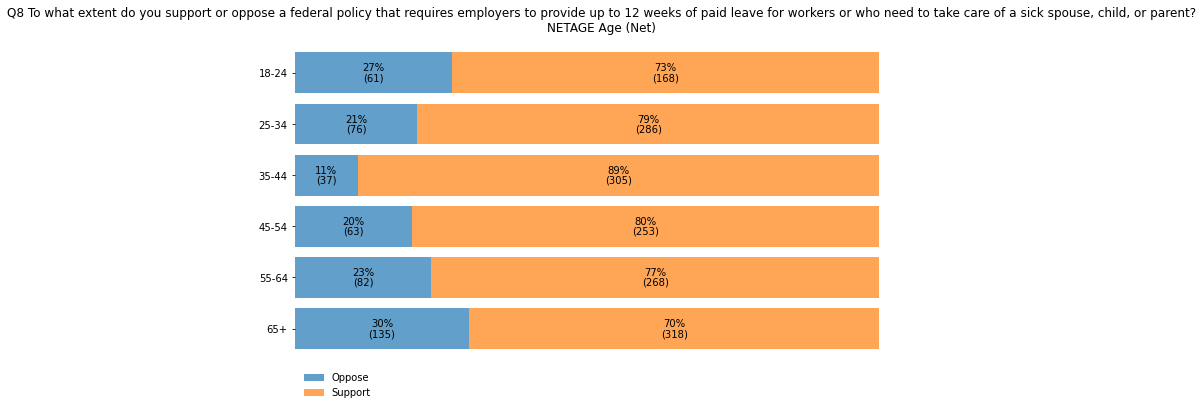

In [238]:
bivar_bar('q8_bin', 'age_cat', 'weight', data)

# Analysis

### Long waitlist for childcare

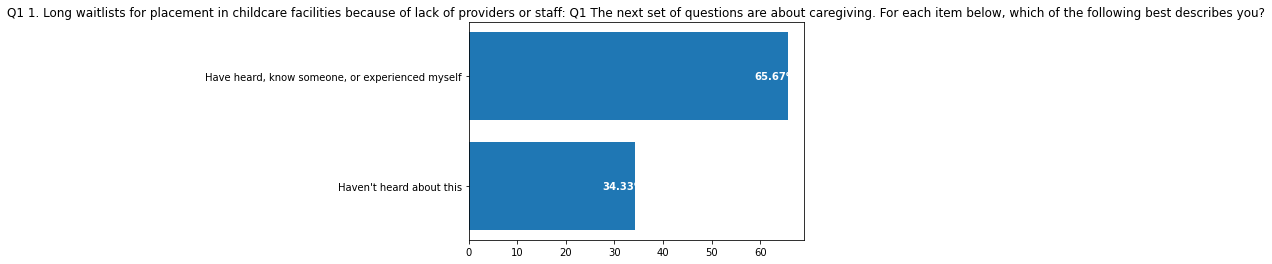

In [139]:
uni_bar('q1_1_bin')

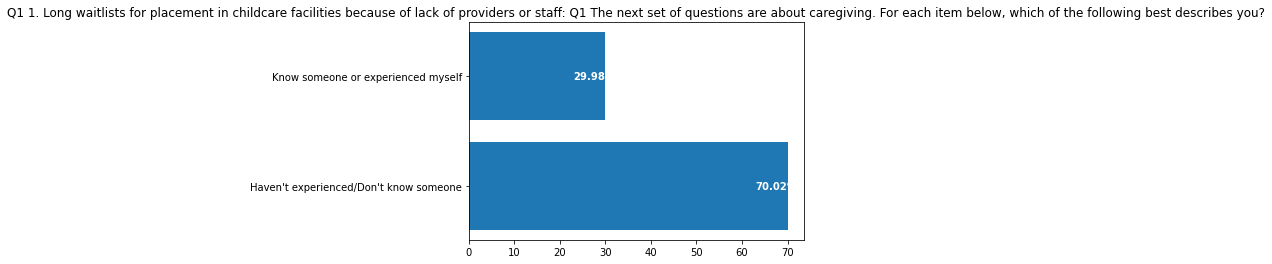

In [151]:
uni_bar('q1_1_know_exp')

### High cost of childcare

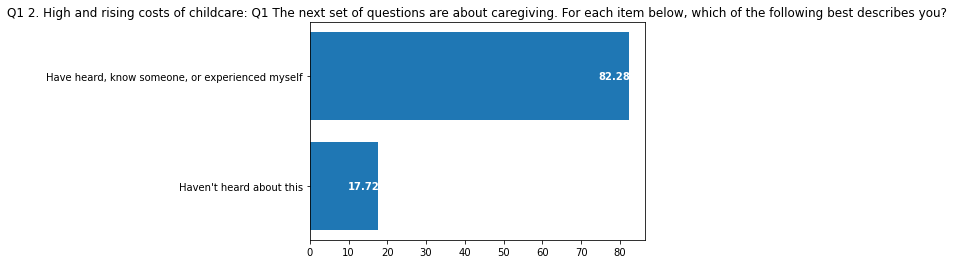

In [152]:
uni_bar('q1_2_bin')

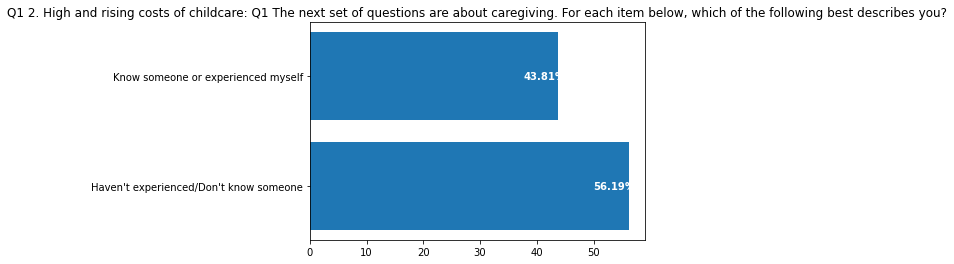

In [153]:
uni_bar('q1_2_know_exp')

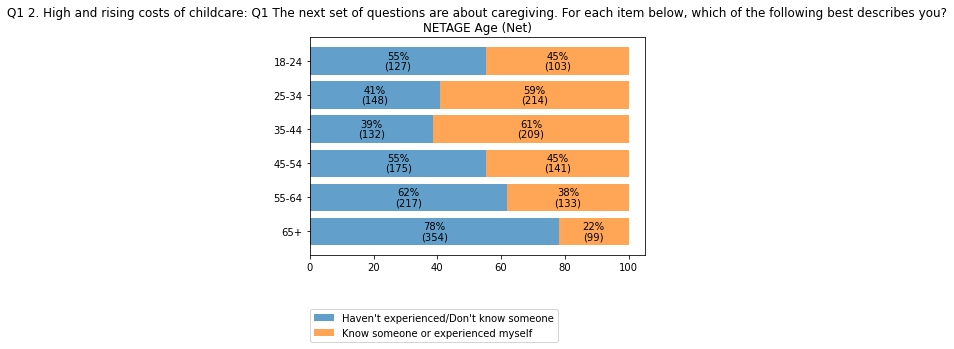

In [161]:
x_bar('q1_2_know_exp', 'age_cat')

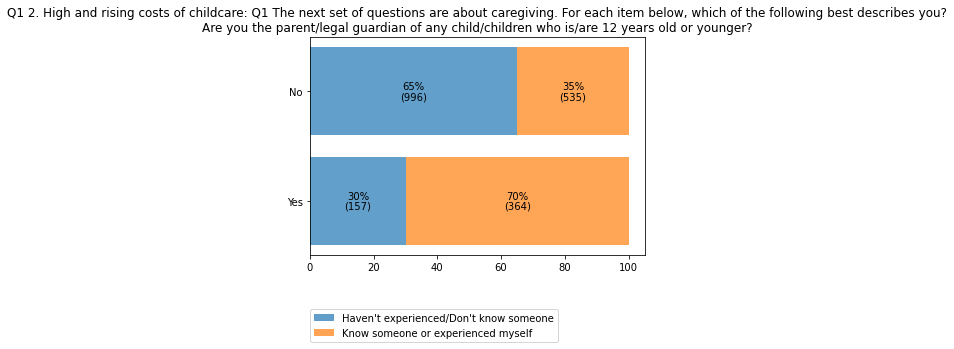

In [164]:
x_bar('q1_2_know_exp', 'child_net_lt13')

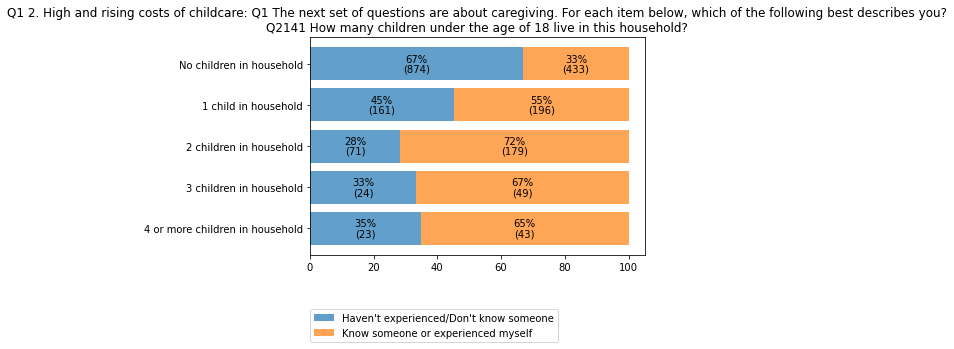

In [166]:
x_bar('q1_2_know_exp', 'hh_children_rec')

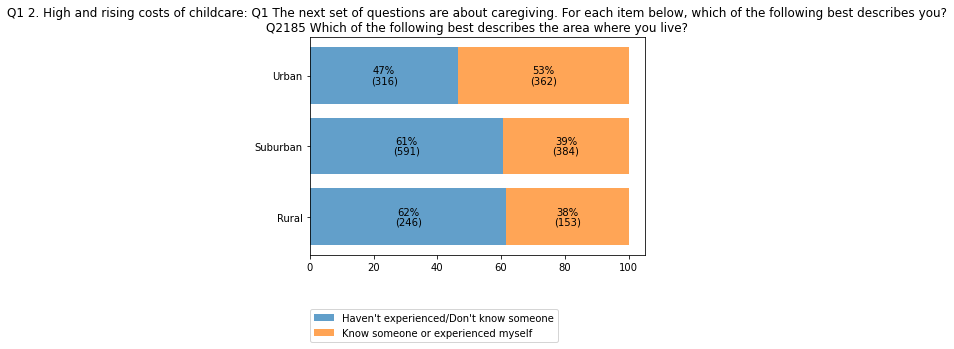

In [167]:
x_bar('q1_2_know_exp', 'residential_area')

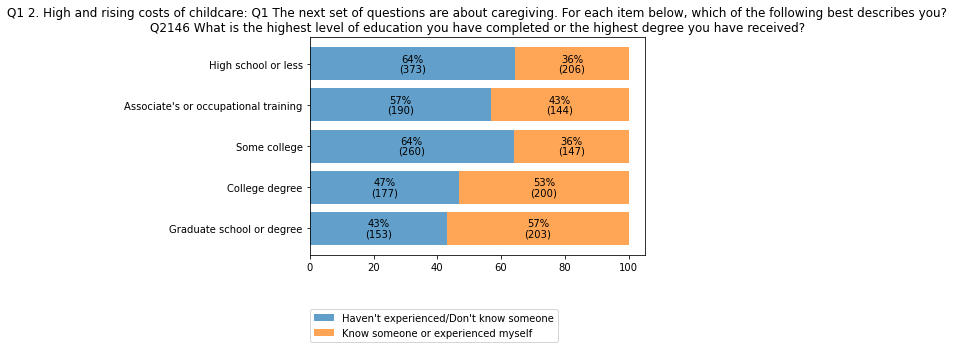

In [168]:
x_bar('q1_2_know_exp', 'educ_rec')

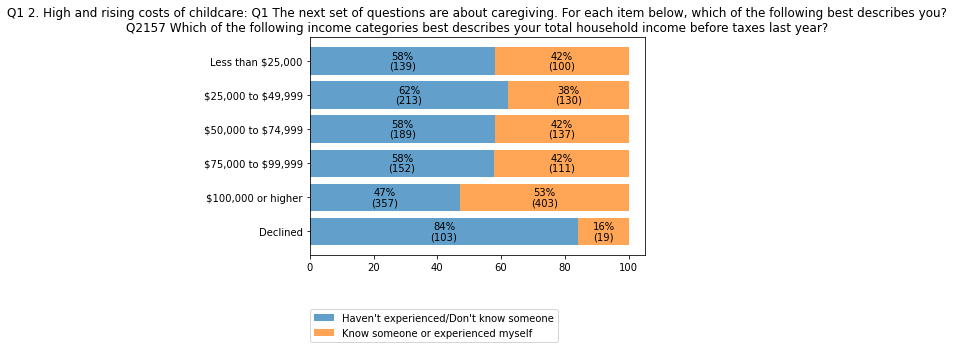

In [169]:
x_bar('q1_2_know_exp', 'income_rec')

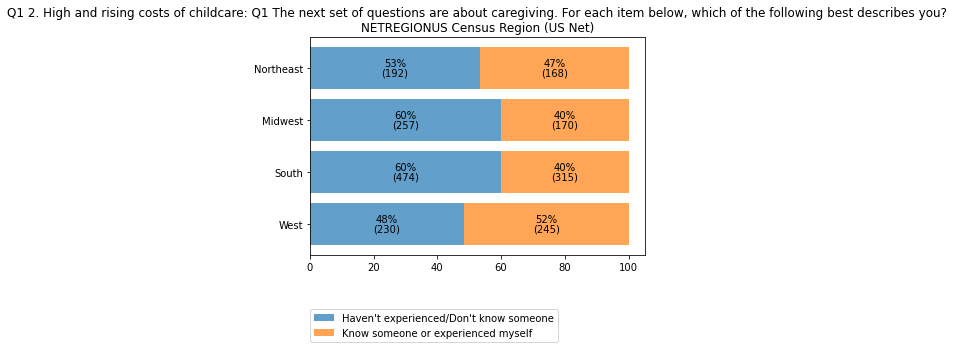

In [177]:
x_bar('q1_2_know_exp', 'region')

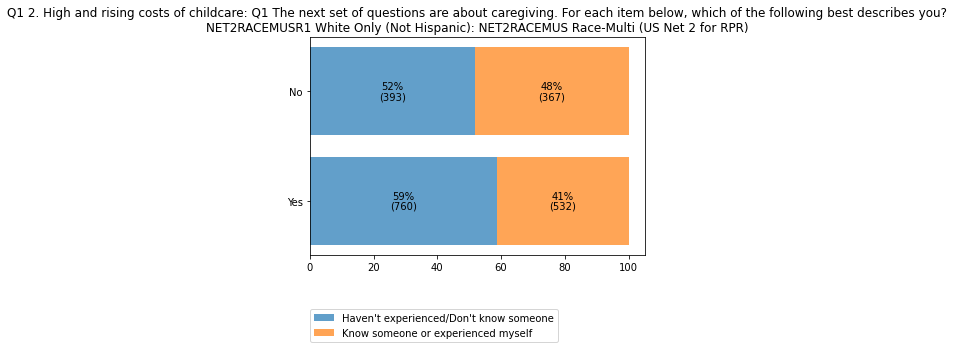

In [178]:
x_bar('q1_2_know_exp', 'race_white_nh')

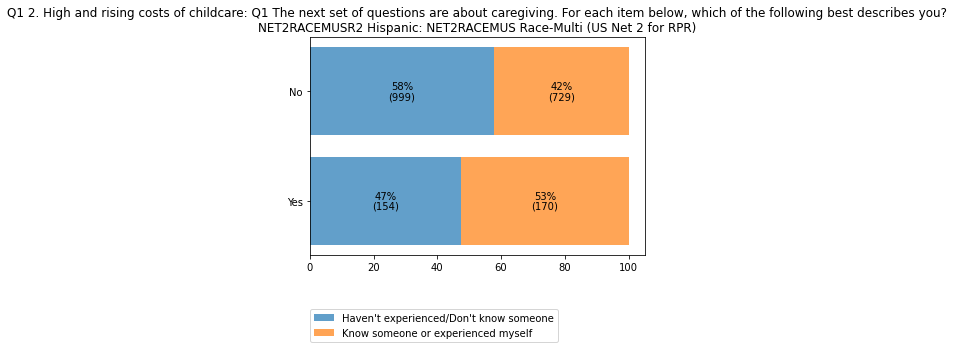

In [179]:
x_bar('q1_2_know_exp', 'race_hisp')

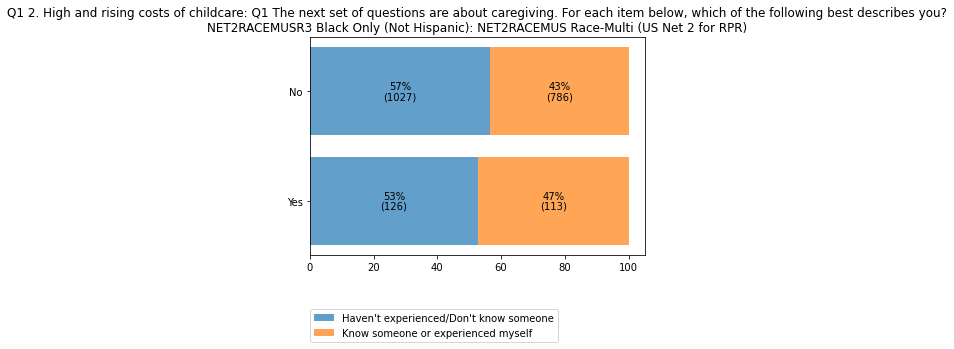

In [181]:
x_bar('q1_2_know_exp', 'race_black_nh')

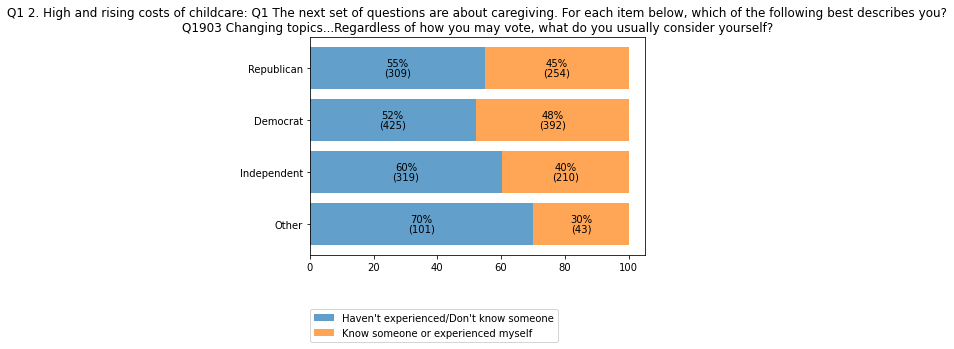

In [182]:
x_bar('q1_2_know_exp', 'party_id')

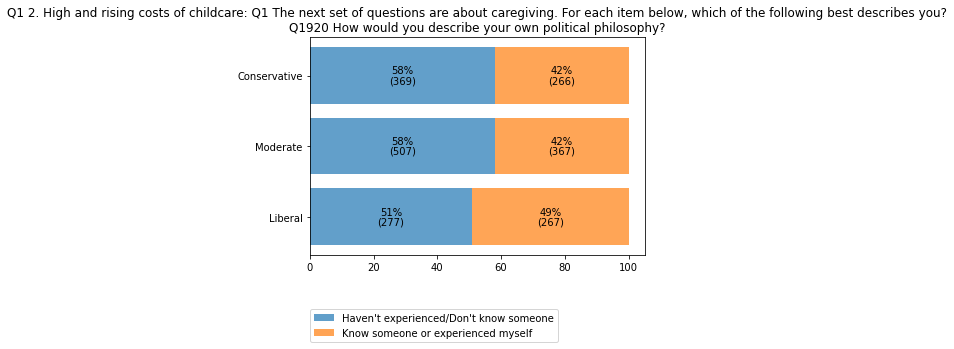

In [183]:
x_bar('q1_2_know_exp', 'ideo')

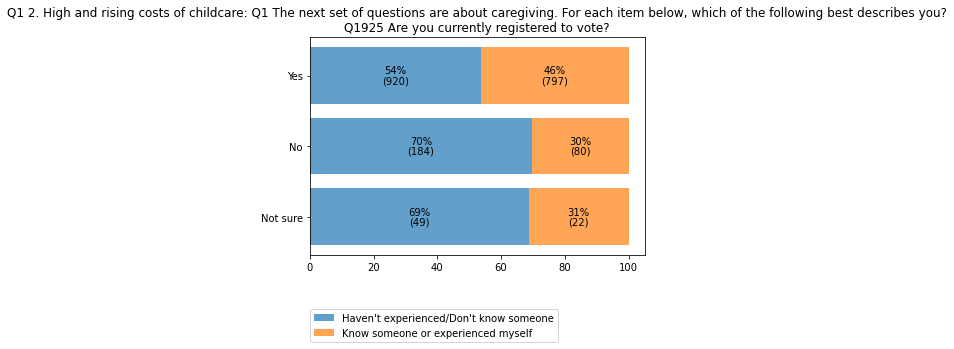

In [184]:
x_bar('q1_2_know_exp', 'reg_voter')

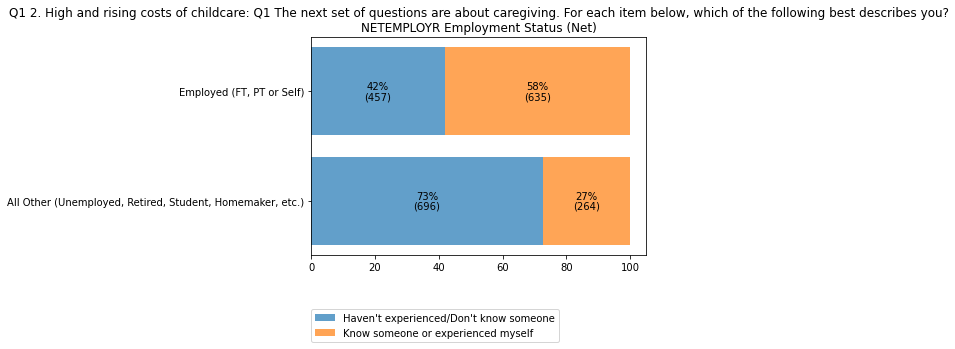

In [44]:
x_bar('q1_2_know_exp', 'employment_status')

### Leaving jobs to provide childcare

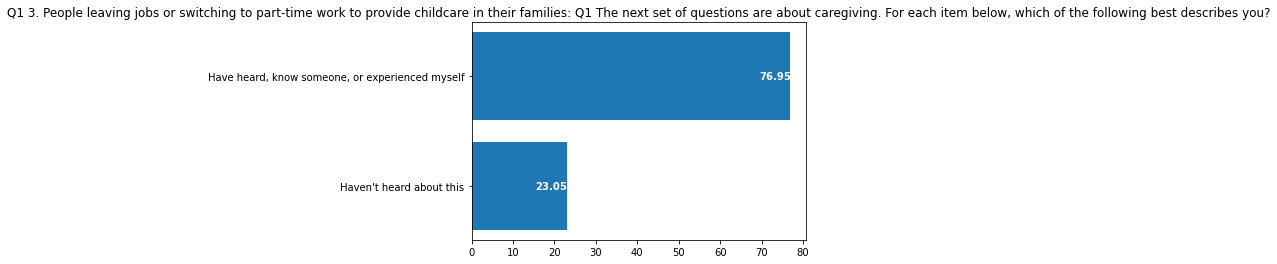

In [154]:
uni_bar('q1_3_bin')

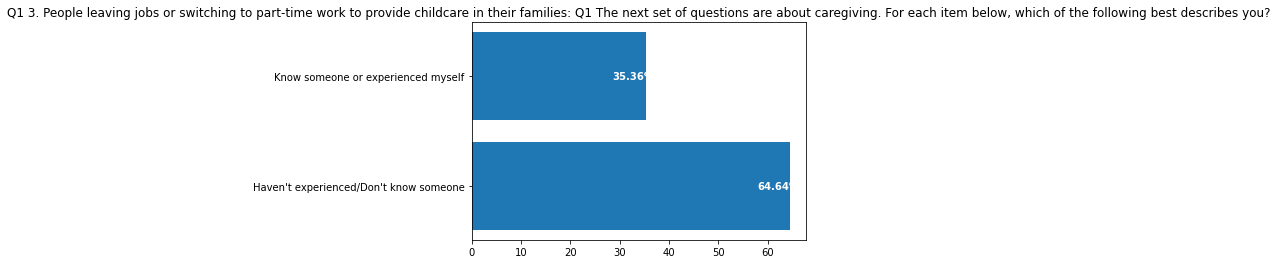

In [155]:
uni_bar('q1_3_know_exp')

In [395]:
meta_dict['q1_3']

'Q1 3. People leaving jobs or switching to part-time work to provide childcare in their families: Q1 The next set of questions are about caregiving. For each item below, which of the following best describes you?'

In [396]:
labels_dict['q1_3']

{1.0: "I haven't heard anything about this",
 2.0: "I have heard about this but don't know anyone who has experienced this recently",
 3.0: 'I know someone who has experienced this recently',
 4.0: 'I have personally experienced this recently'}

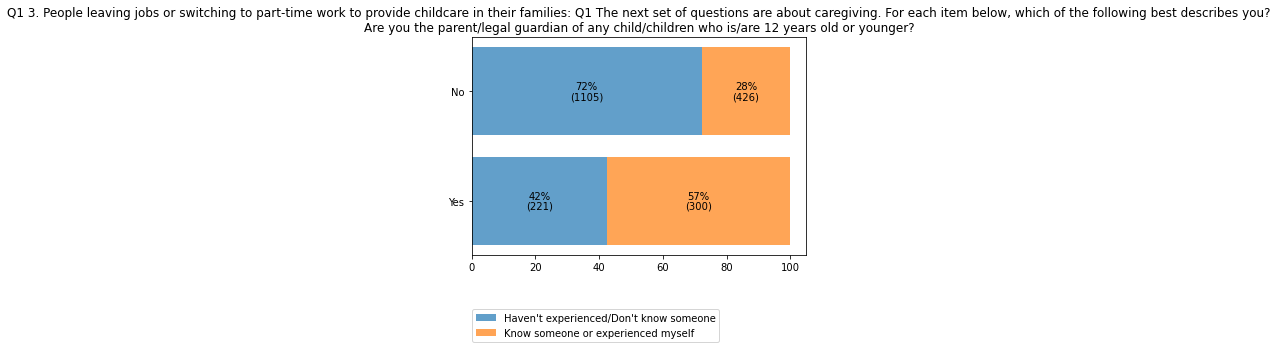

In [47]:
x_bar('q1_3_know_exp', 'child_net_lt13')

### Delaying families

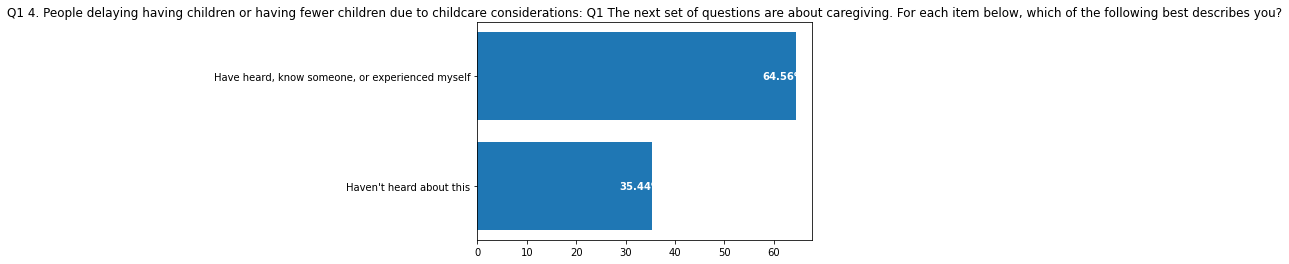

In [156]:
uni_bar('q1_4_bin')

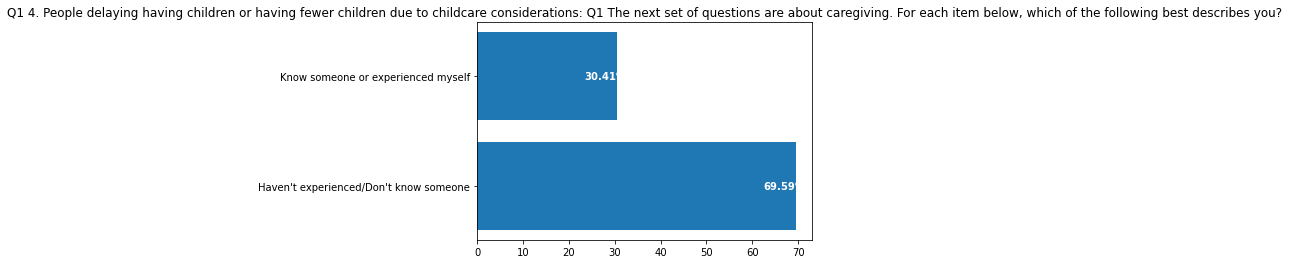

In [157]:
uni_bar('q1_4_know_exp')

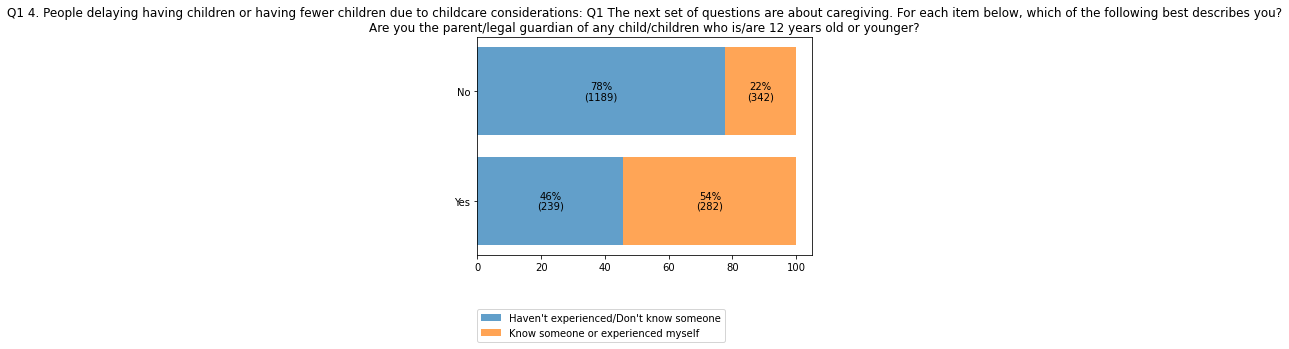

In [56]:
x_bar('q1_4_know_exp', 'child_net_lt13')

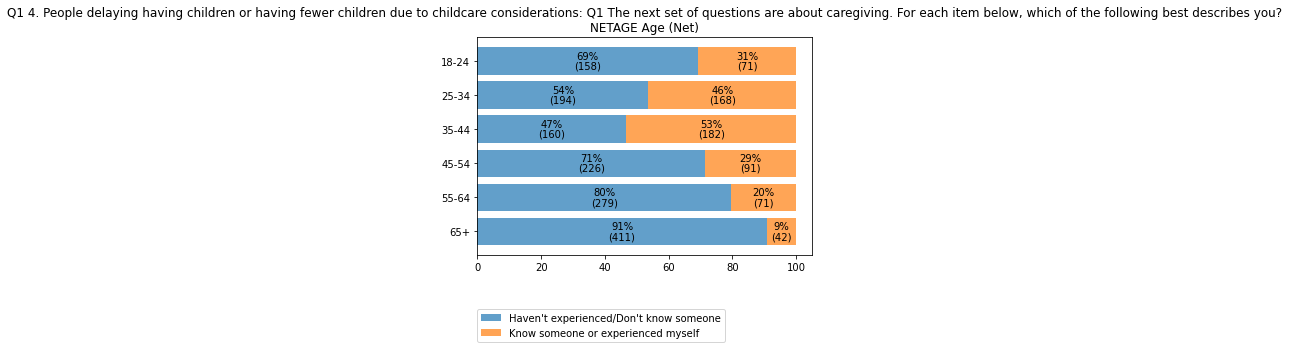

In [48]:
x_bar('q1_4_know_exp', 'age_cat')

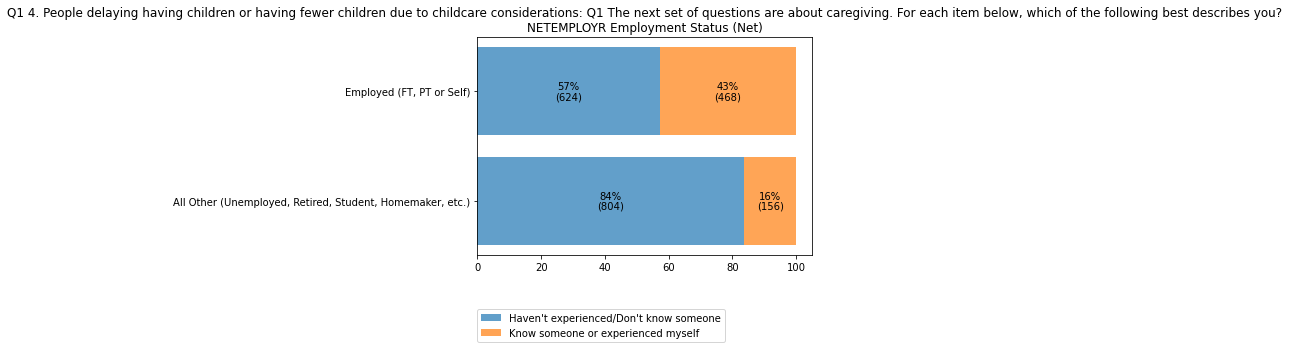

In [49]:
x_bar('q1_4_know_exp', 'employment_status')

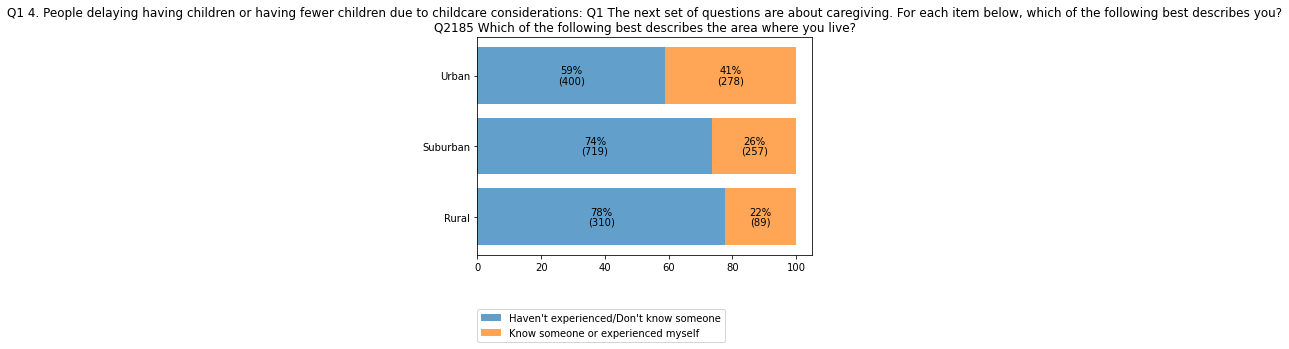

In [50]:
x_bar('q1_4_know_exp', 'residential_area')

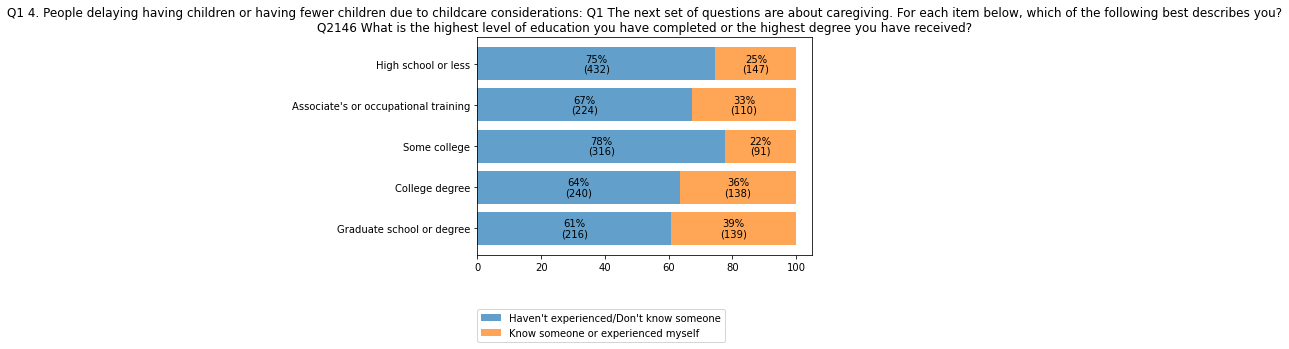

In [55]:
x_bar('q1_4_know_exp', 'educ_rec')

### Missing work to provide childcare

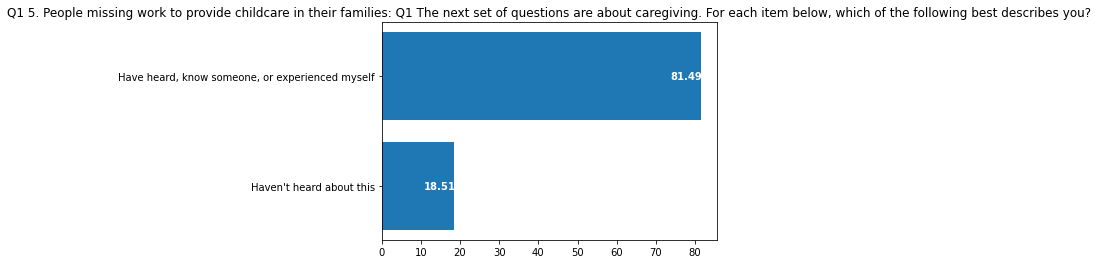

In [158]:
uni_bar('q1_5_bin')

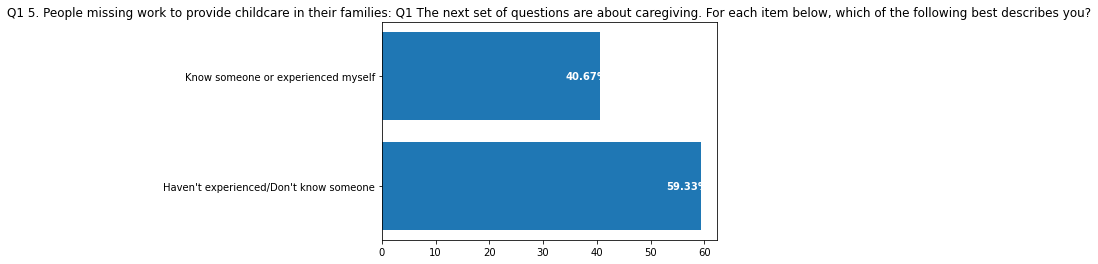

In [159]:
uni_bar('q1_5_know_exp')

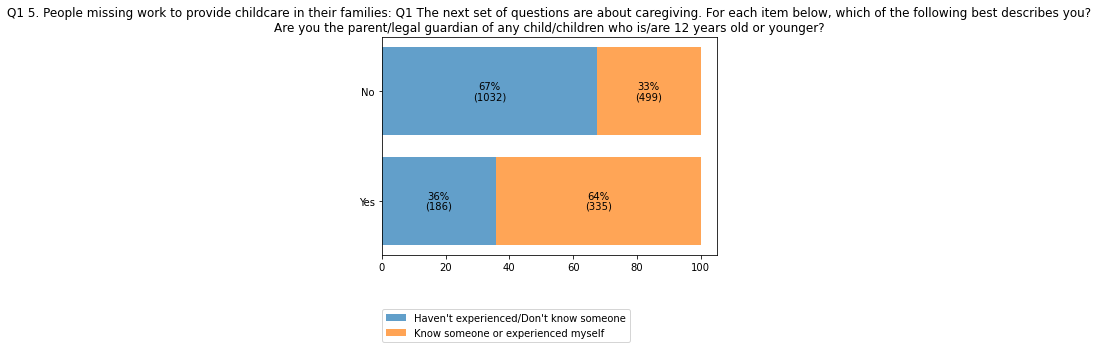

In [46]:
x_bar('q1_5_know_exp', 'child_net_lt13')

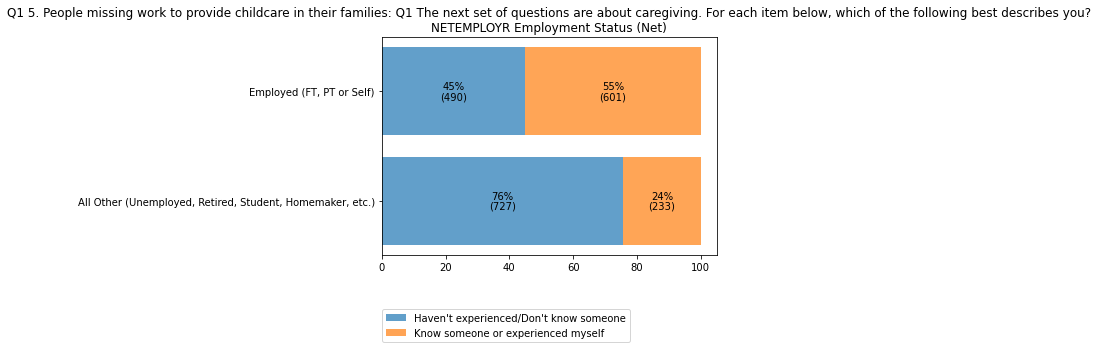

In [57]:
x_bar('q1_5_know_exp', 'employment_status')

### Experienced any Q1

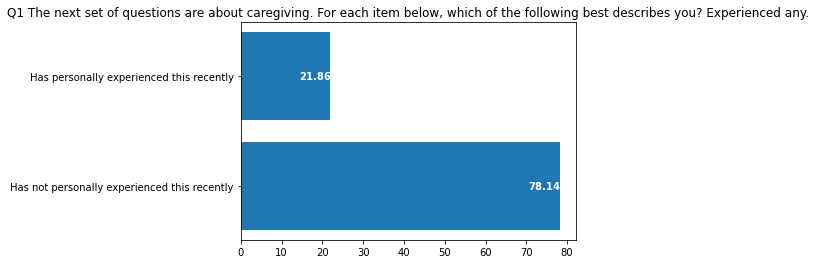

In [185]:
uni_bar('q1_all_exp')

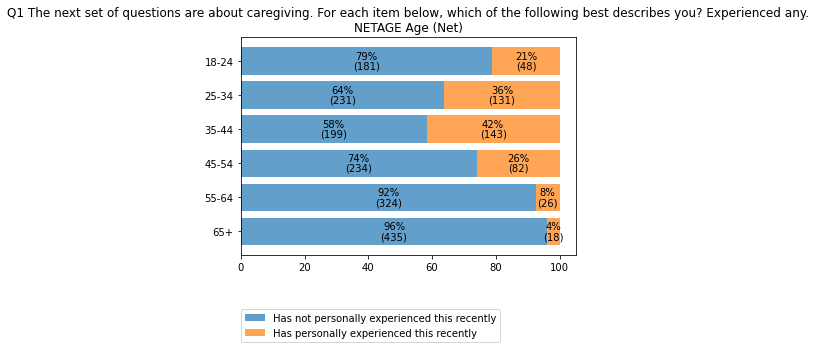

In [188]:
x_bar('q1_all_exp', 'age_cat')

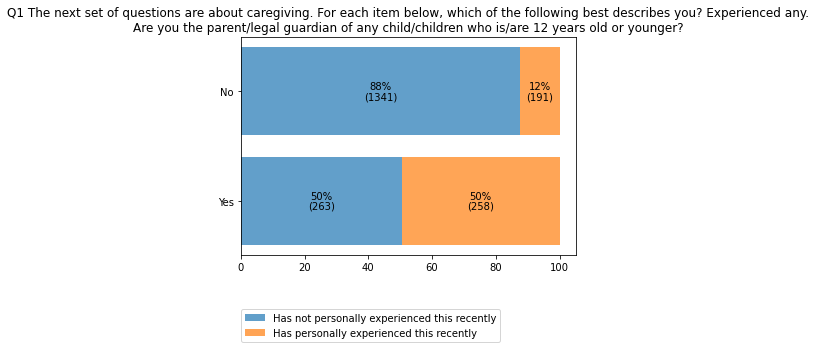

In [190]:
x_bar('q1_all_exp', 'child_net_lt13')

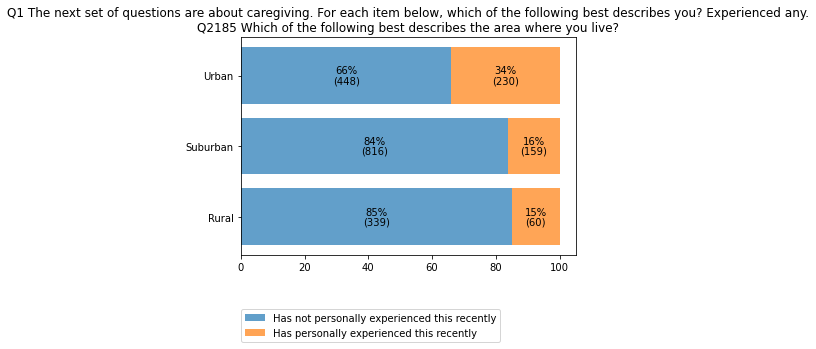

In [197]:
x_bar('q1_all_exp', 'residential_area')

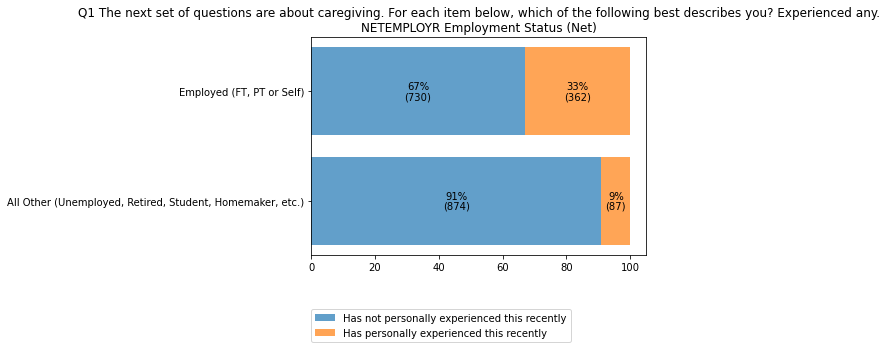

In [198]:
x_bar('q1_all_exp', 'employment_status')

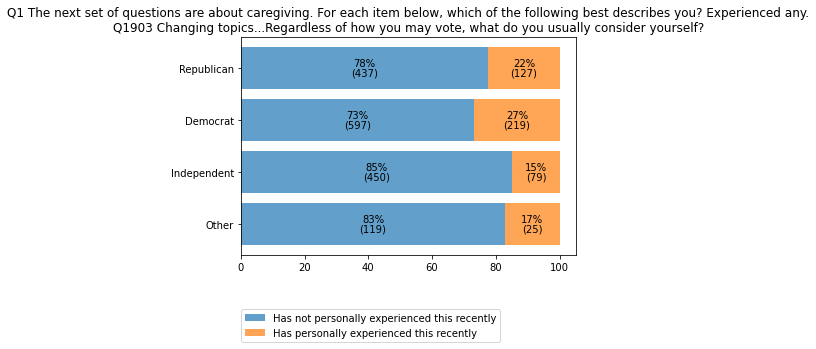

In [74]:
x_bar('q1_all_exp', 'party_id')

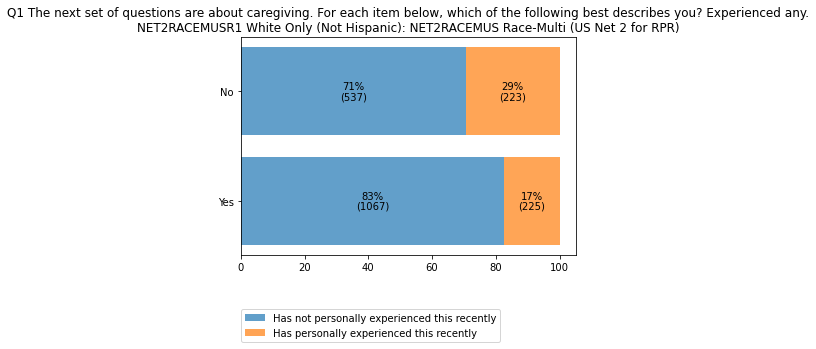

In [204]:
x_bar('q1_all_exp', 'race_white_nh')

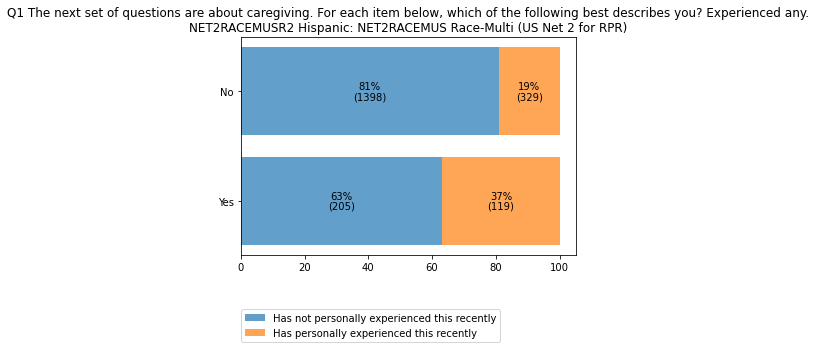

In [205]:
x_bar('q1_all_exp', 'race_hisp')

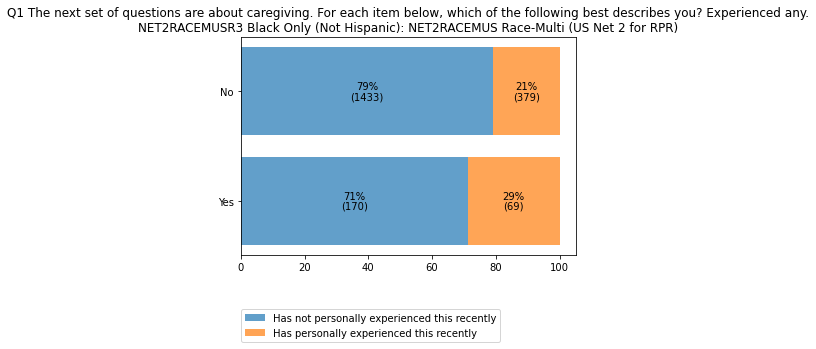

In [206]:
x_bar('q1_all_exp', 'race_black_nh')

### Know someone OR experienced any Q1

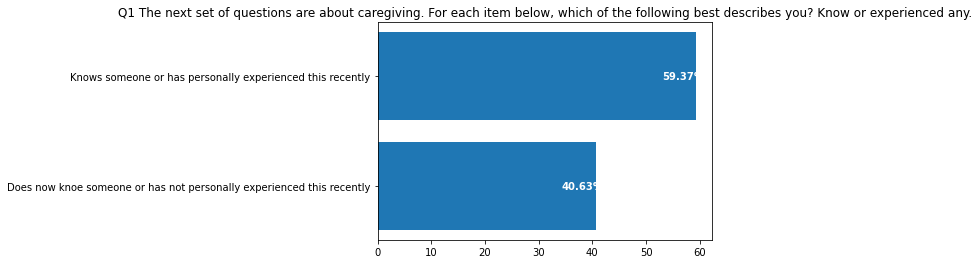

In [186]:
uni_bar('q1_all_know_exp')

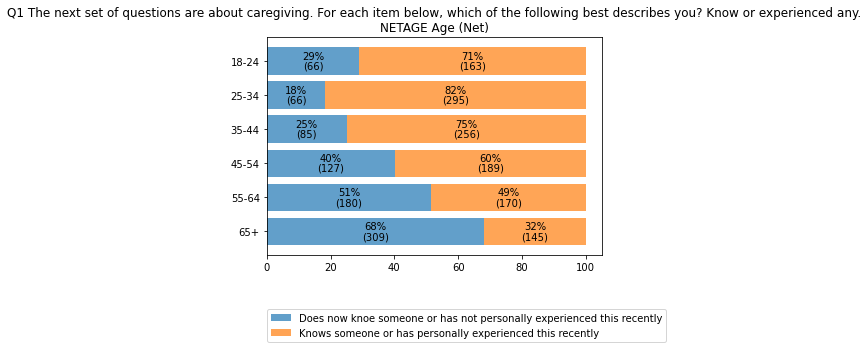

In [189]:
x_bar('q1_all_know_exp', 'age_cat')

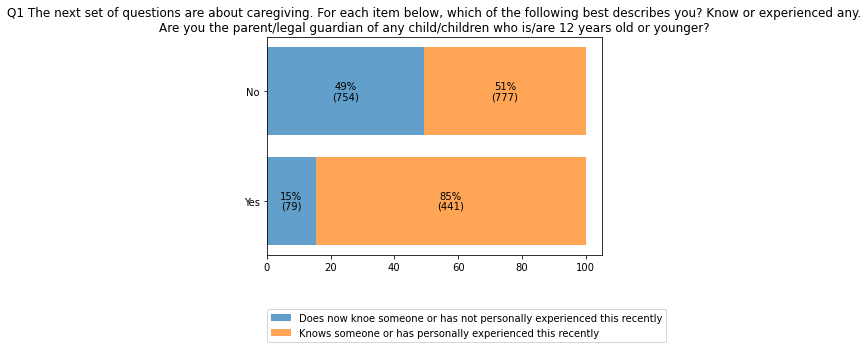

In [191]:
x_bar('q1_all_know_exp', 'child_net_lt13')

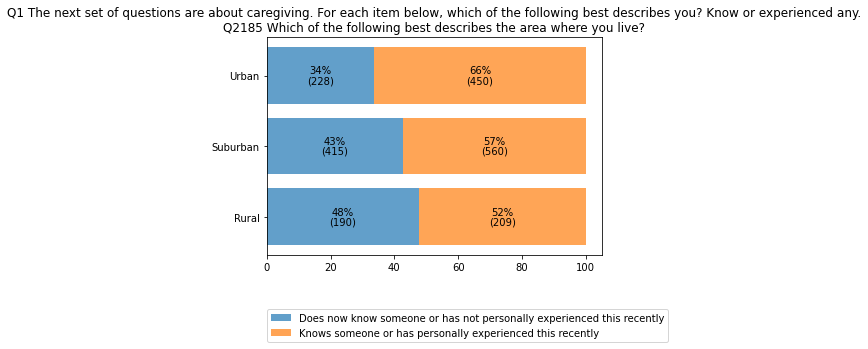

In [81]:
x_bar('q1_all_know_exp', 'residential_area')

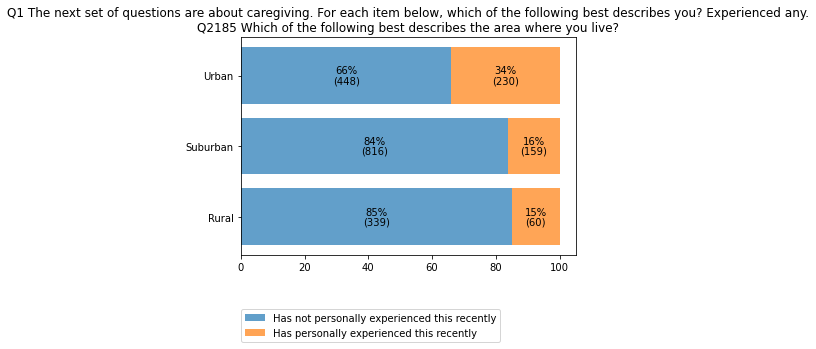

In [82]:
x_bar('q1_all_exp', 'residential_area')

### Q1s by demos - child net lt13

Total: 30% know/experienced long waitlists

In [197]:
weighted_xtabs('q1_1', 'child_net_lt13')[0]

child_net_lt13                                                                      No  \
q1_1                                                                                     
I haven't heard anything about this                                              40.49   
I have heard about this but don't know anyone who has experienced this recently  37.39   
I know someone who has experienced this recently                                 17.92   
I have personally experienced this recently                                       4.20   

child_net_lt13                                                                     Yes  
q1_1                                                                                    
I haven't heard anything about this                                              16.23  
I have heard about this but don't know anyone who has experienced this recently  30.67  
I know someone who has experienced this recently                                 32.25  
I have personally experienced this recently                                      20.85

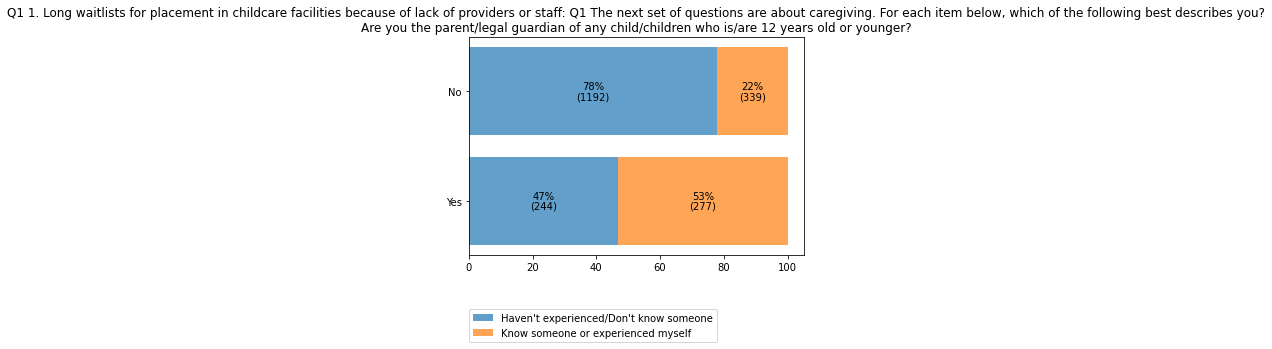

In [75]:
x_bar('q1_1_know_exp', 'child_net_lt13')

Total: 44% know/experienced high costs

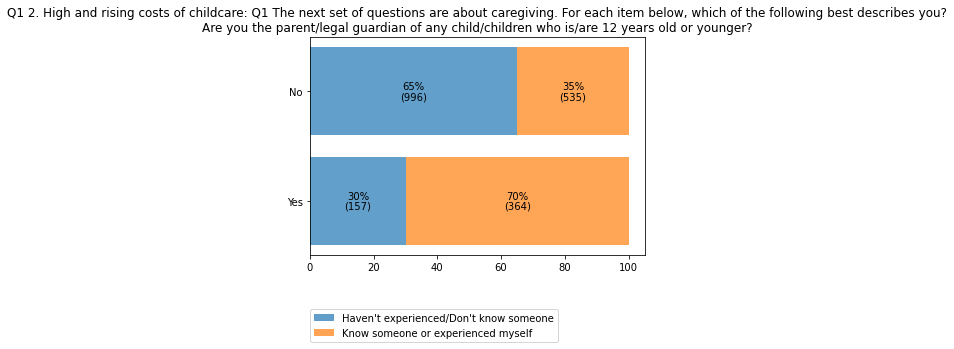

In [76]:
x_bar('q1_2_know_exp', 'child_net_lt13')

Total: 35% know/experienced people leaving jobs

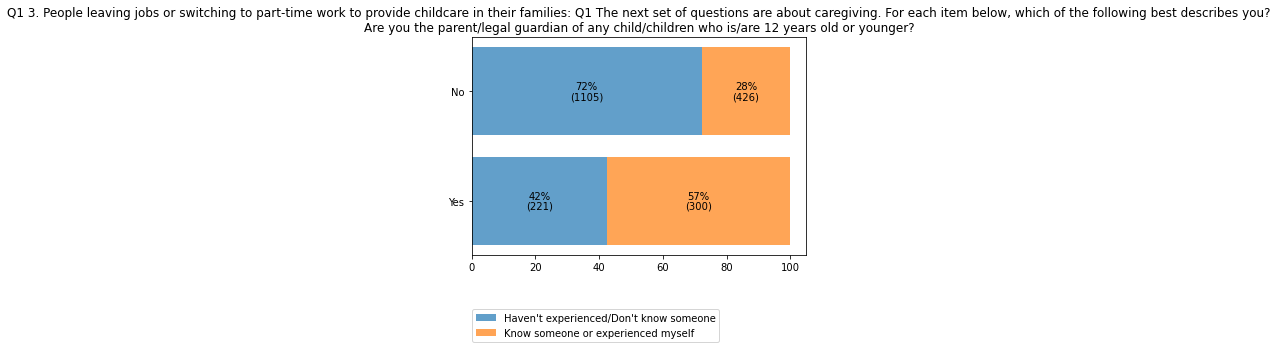

In [77]:
x_bar('q1_3_know_exp', 'child_net_lt13')

Total: 30% know/experienced people dleaying families

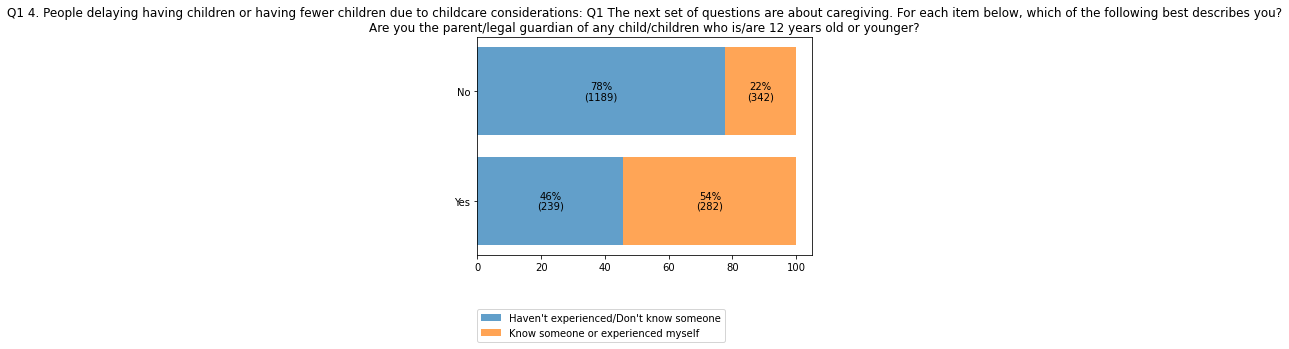

In [78]:
x_bar('q1_4_know_exp', 'child_net_lt13')

Total: 41% know/experienced people missing work

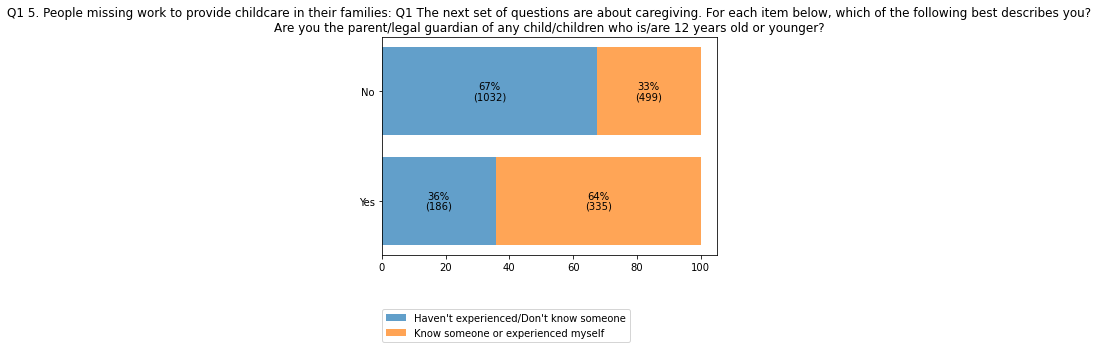

In [79]:
x_bar('q1_5_know_exp', 'child_net_lt13')

### Q1s by demos - employed

Total: 30% know/experienced long waitlists

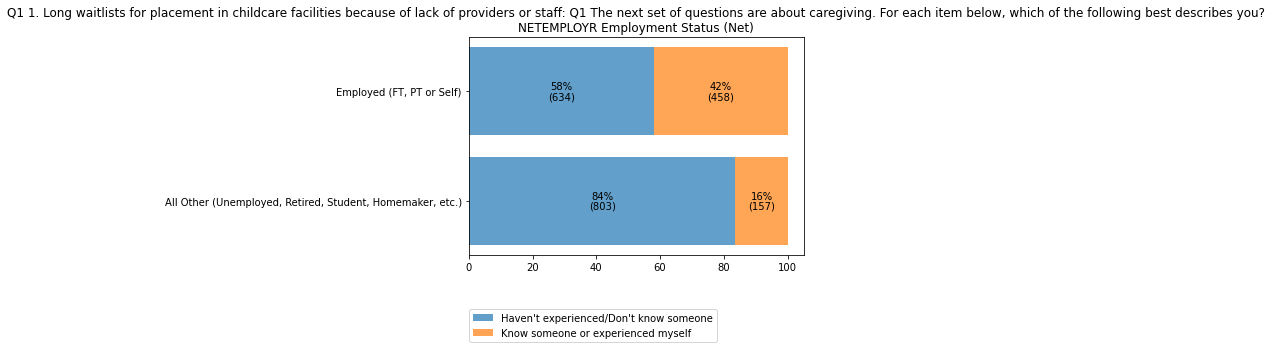

In [85]:
x_bar('q1_1_know_exp', 'employment_status')

Total: 44% know/experienced high costs

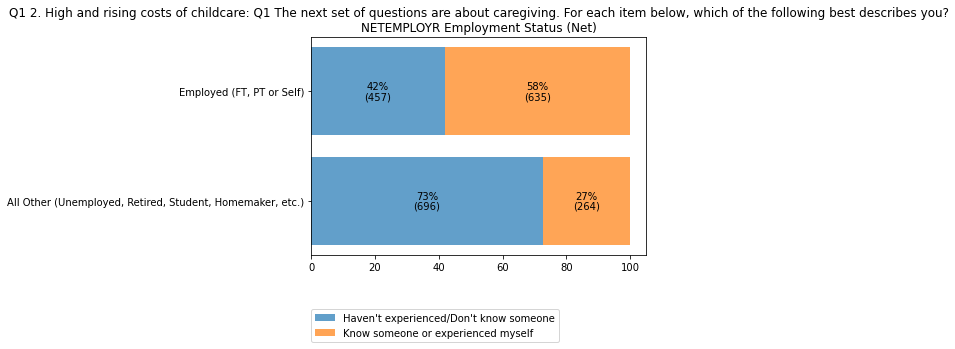

In [86]:
x_bar('q1_2_know_exp', 'employment_status')

Total: 35% know/experienced people leaving jobs

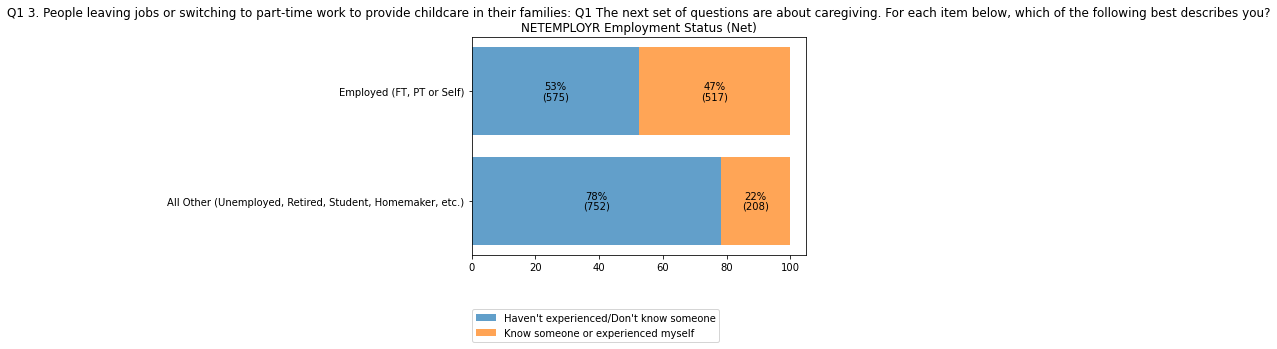

In [87]:
x_bar('q1_3_know_exp', 'employment_status')

Total: 30% know/experienced people dleaying families

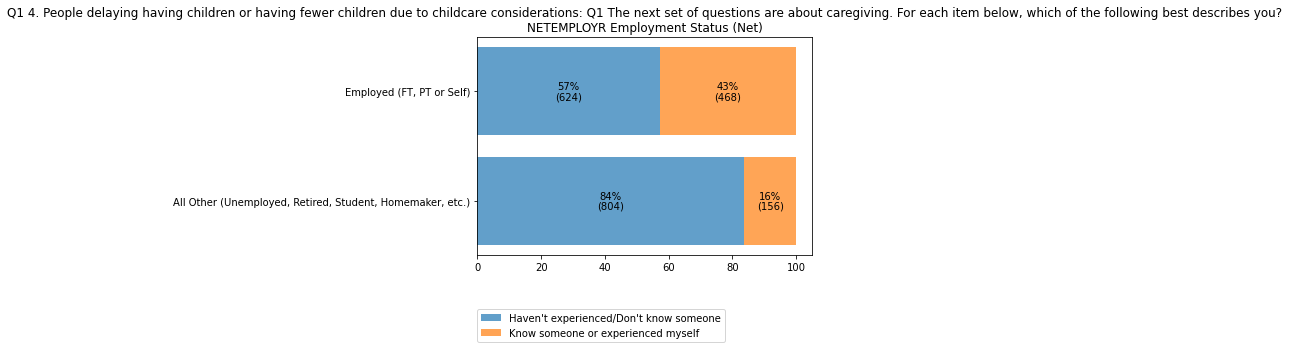

In [88]:
x_bar('q1_4_know_exp', 'employment_status')

Total: 41% know/experienced people missing work

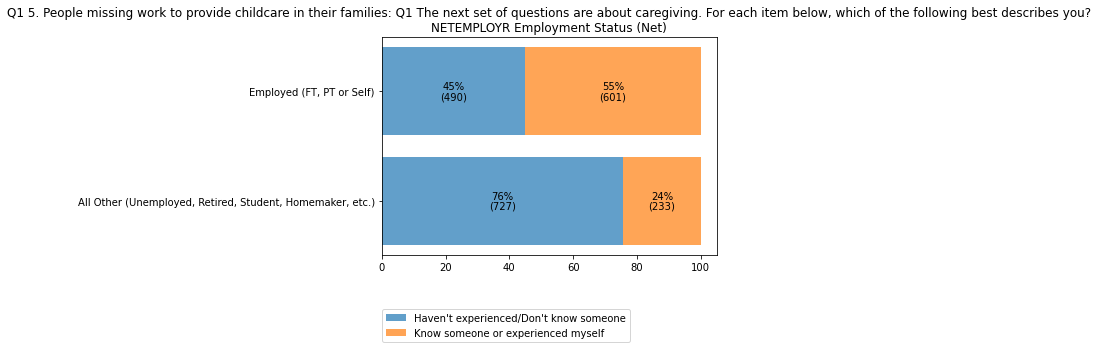

In [89]:
x_bar('q1_5_know_exp', 'employment_status')

### Q1s by demos - age_cat

Total: 30% know/experienced long waitlists

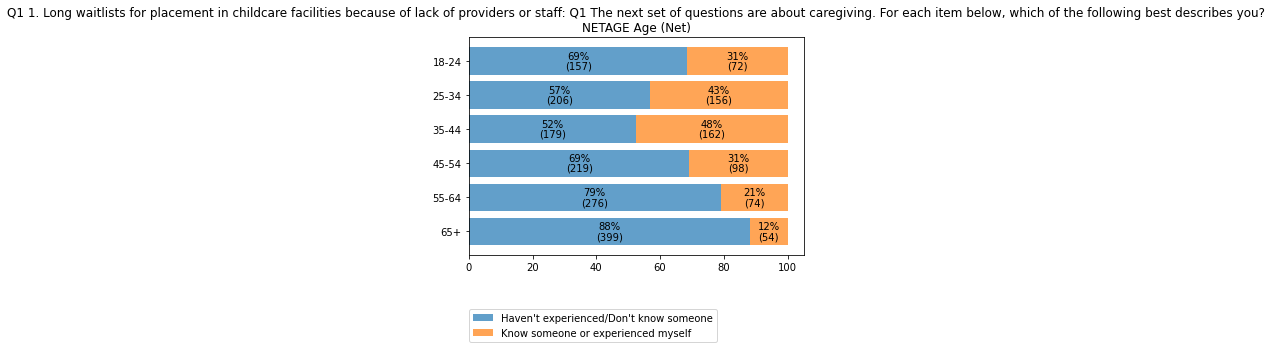

In [91]:
x_bar('q1_1_know_exp', 'age_cat')

Total: 44% know/experienced high costs

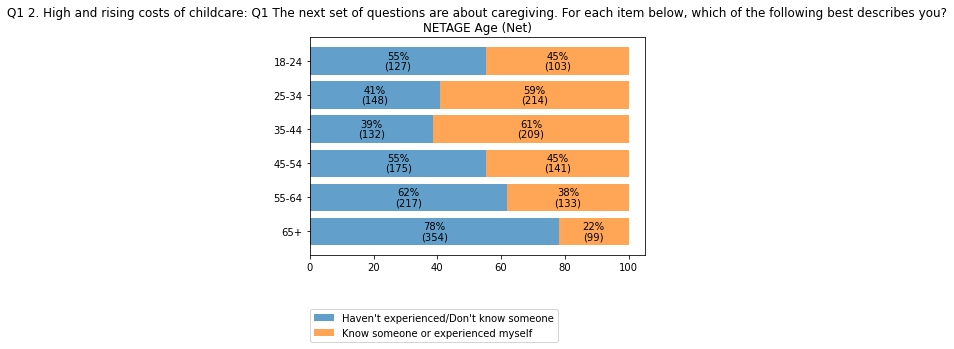

In [92]:
x_bar('q1_2_know_exp', 'age_cat')

Total: 35% know/experienced people leaving jobs

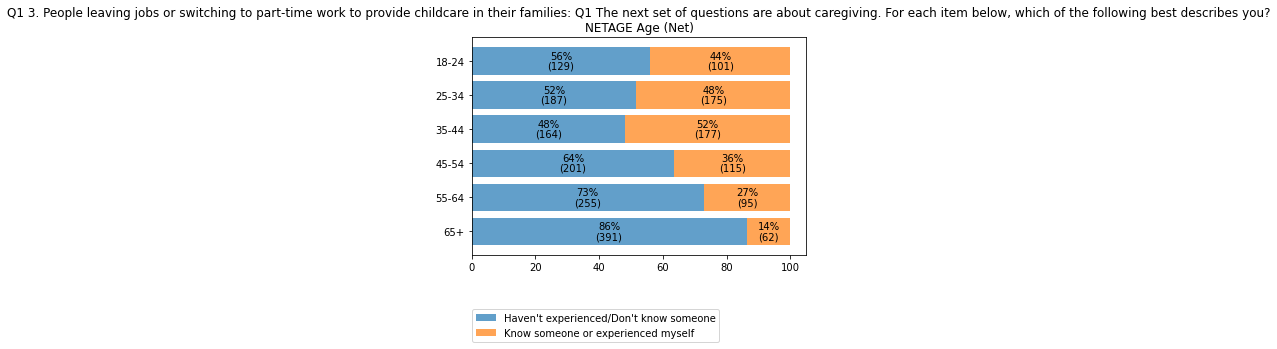

In [93]:
x_bar('q1_3_know_exp', 'age_cat')

Total: 30% know/experienced people dleaying families

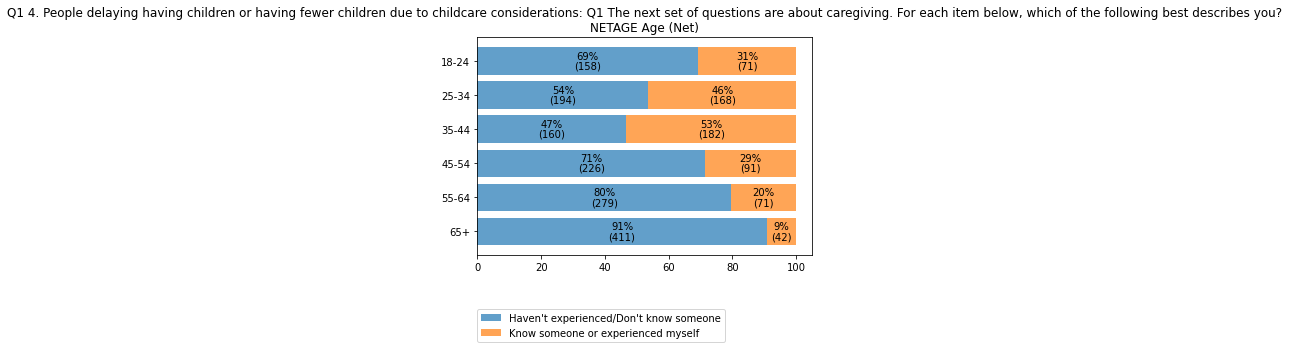

In [94]:
x_bar('q1_4_know_exp', 'age_cat')

Total: 41% know/experienced people missing work

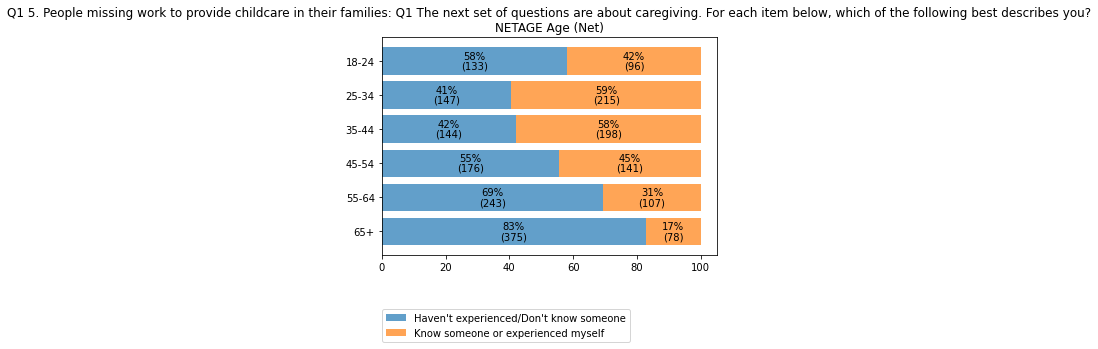

In [95]:
x_bar('q1_5_know_exp', 'age_cat')

### Q1s by demos - race

Total: 30% know/experienced long waitlists

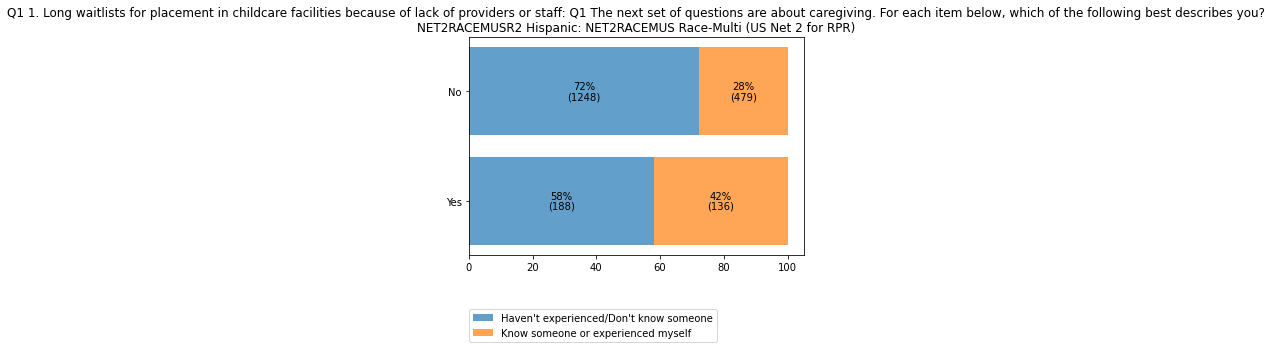

In [96]:
x_bar('q1_1_know_exp', 'race_hisp')

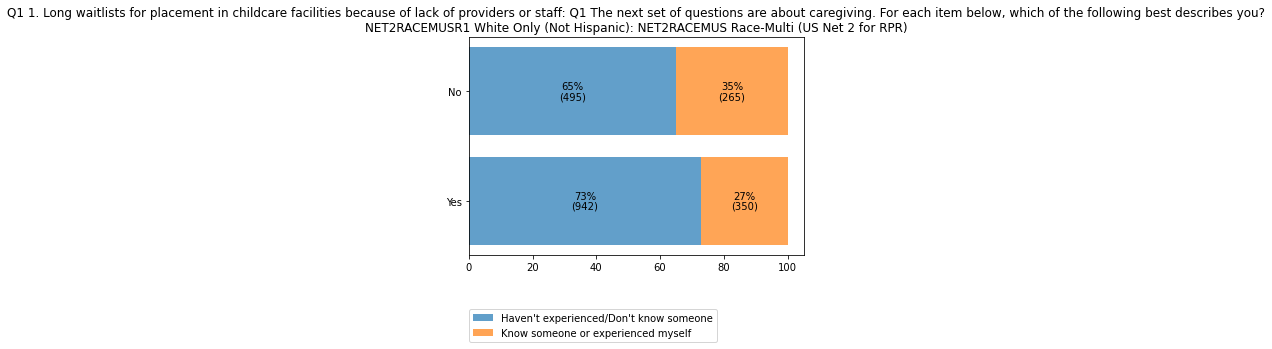

In [98]:
x_bar('q1_1_know_exp', 'race_white_nh')

Total: 44% know/experienced high costs

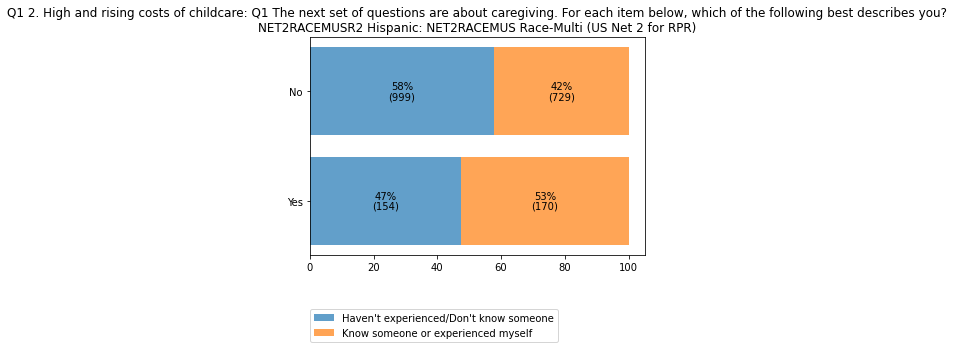

In [99]:
x_bar('q1_2_know_exp', 'race_hisp')

Total: 35% know/experienced people leaving jobs

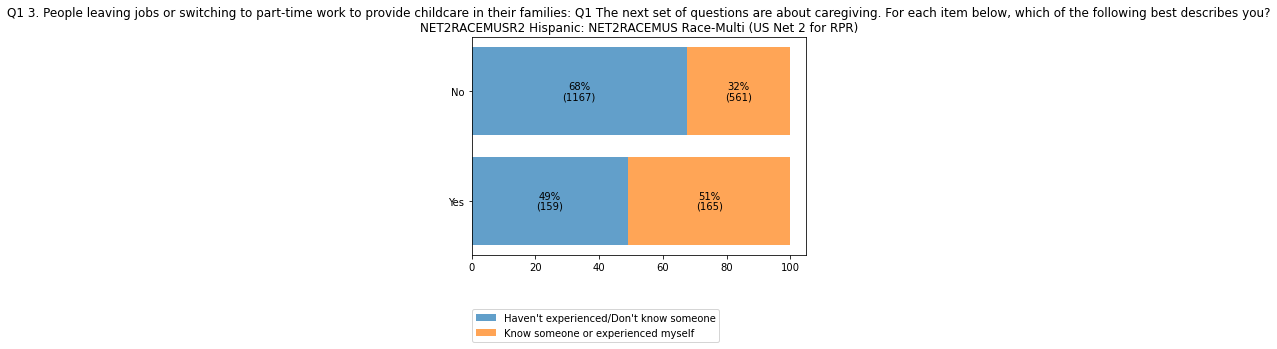

In [100]:
x_bar('q1_3_know_exp', 'race_hisp')

Total: 30% know/experienced people dleaying families

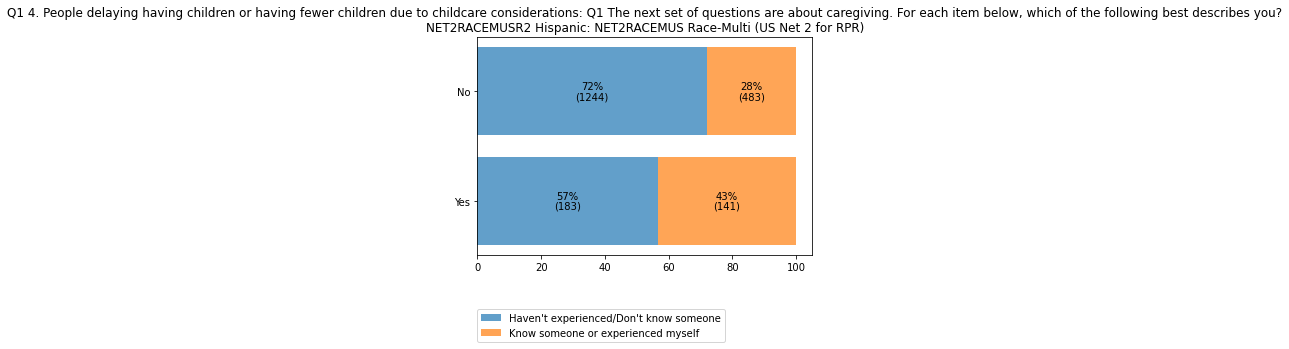

In [101]:
x_bar('q1_4_know_exp', 'race_hisp')

Total: 41% know/experienced people missing work

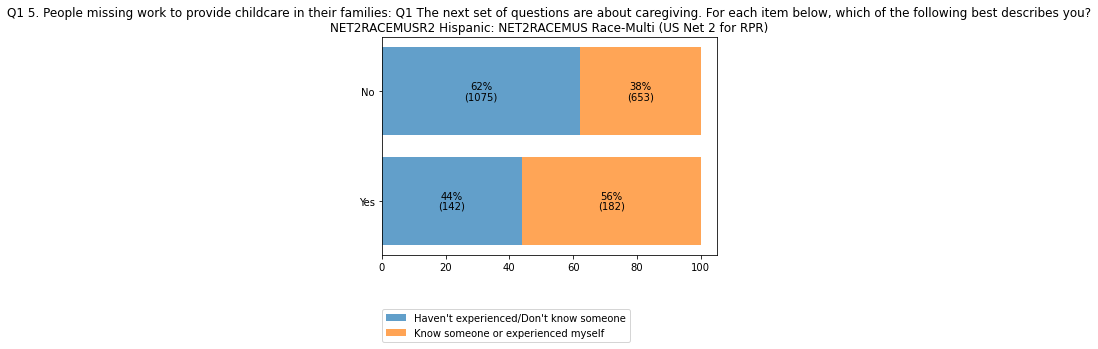

In [102]:
x_bar('q1_5_know_exp', 'race_hisp')

### Women leaving workforce

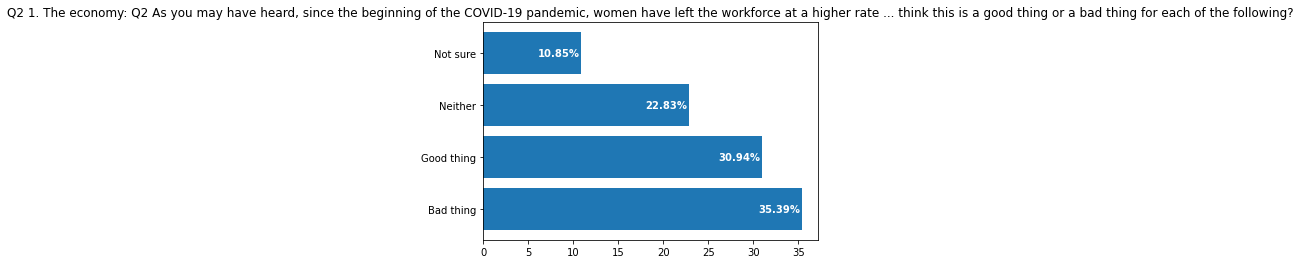

In [207]:
uni_bar('q2_1')

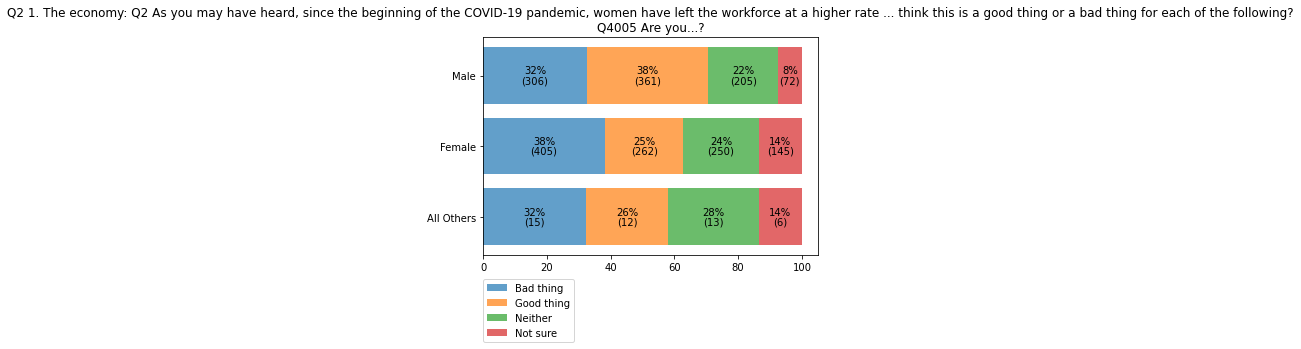

In [208]:
x_bar('q2_1', 'sex')

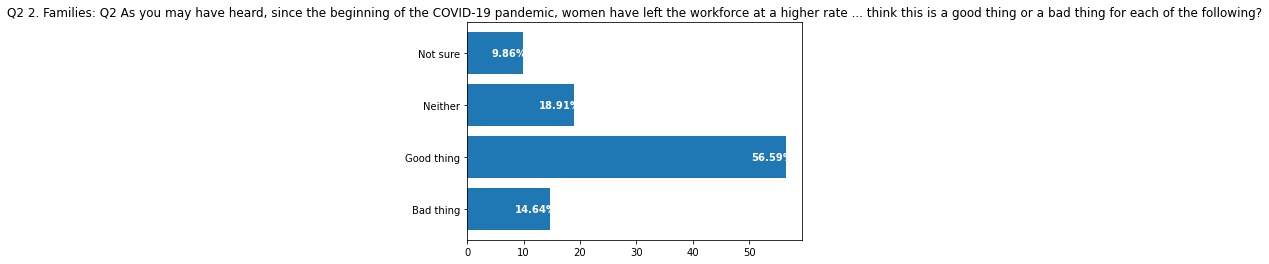

In [209]:
uni_bar('q2_2')

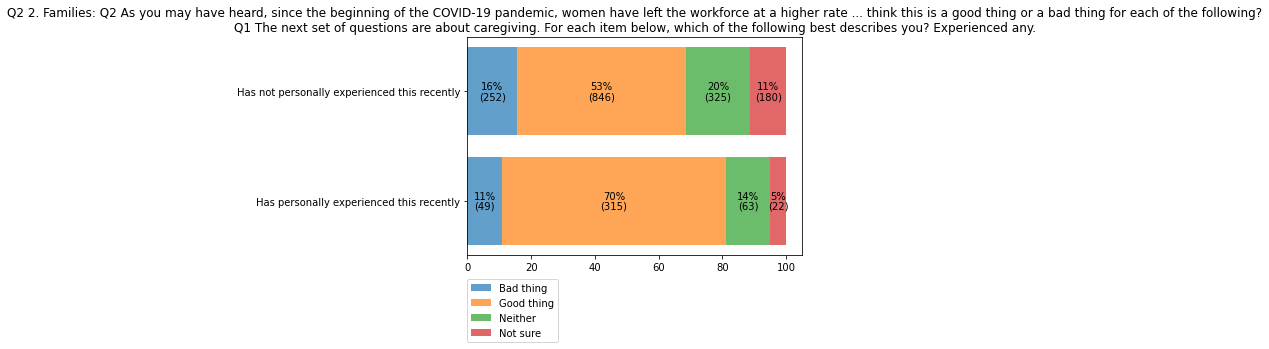

In [59]:
x_bar('q2_2', 'q1_all_exp')

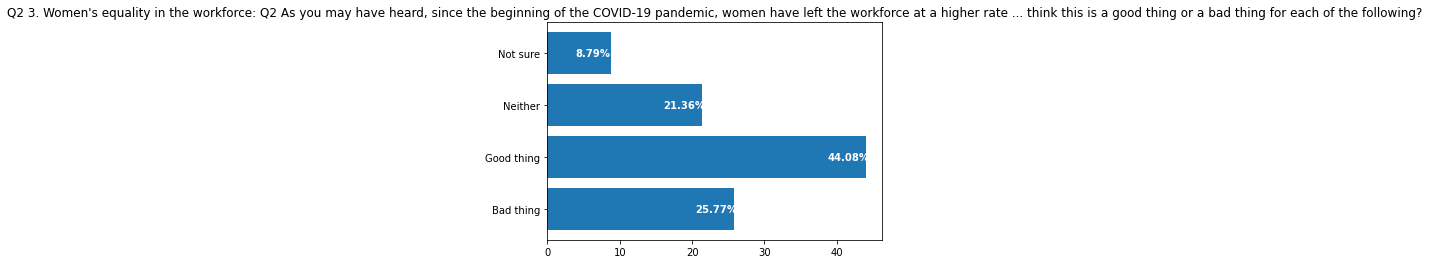

In [211]:
uni_bar('q2_3')

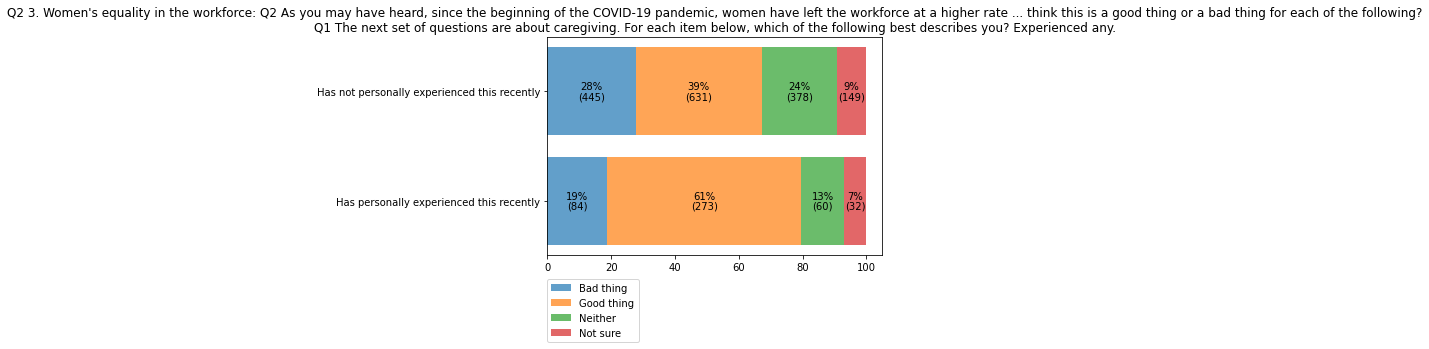

In [60]:
x_bar('q2_3', 'q1_all_exp')

### Performance Childcare system

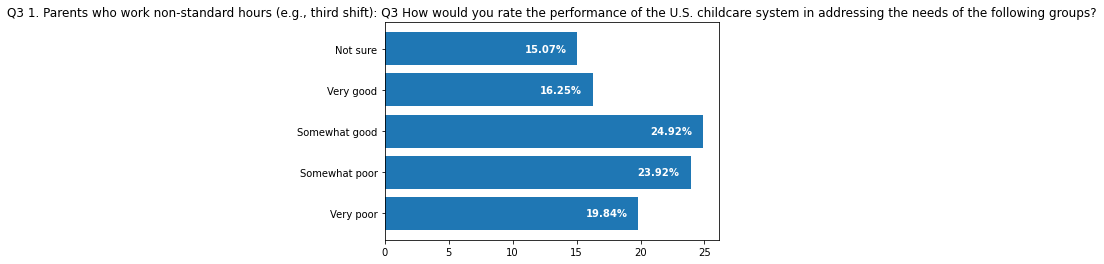

In [213]:
uni_bar('q3_1')

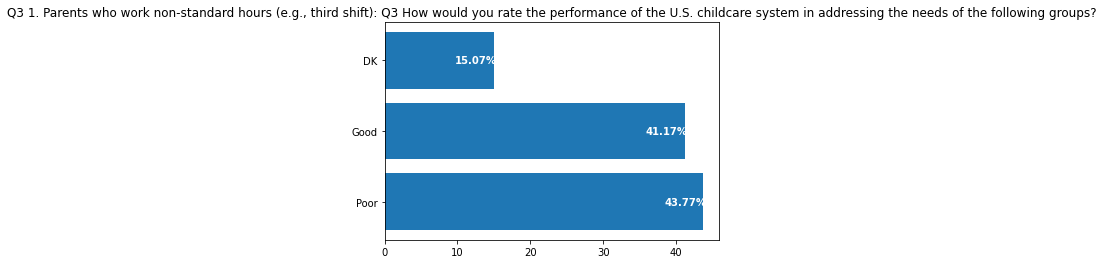

In [104]:
uni_bar('q3_1_grpd')

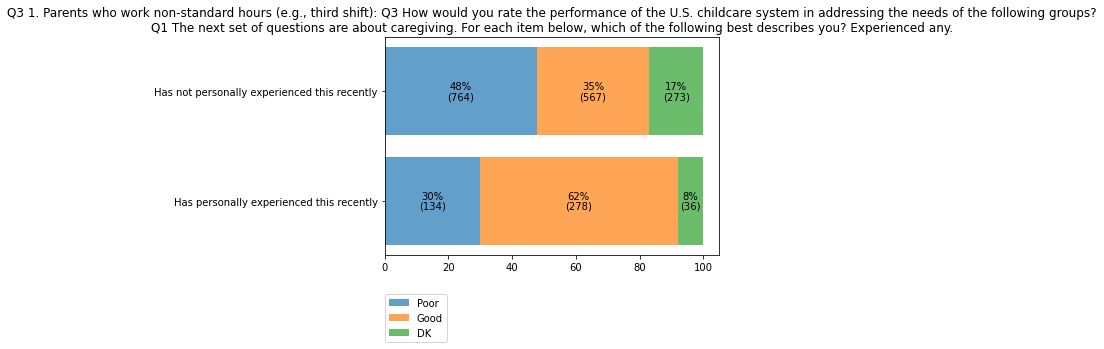

In [229]:
x_bar('q3_1_grpd', 'q1_all_exp')

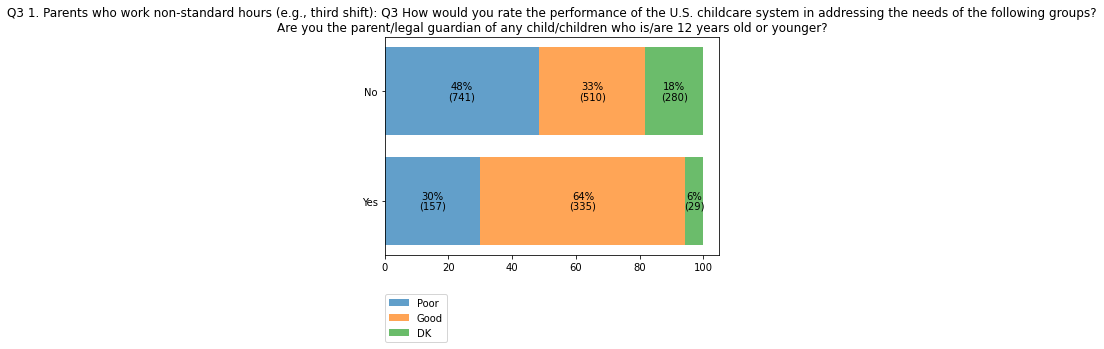

In [232]:
x_bar('q3_1_grpd', 'child_net_lt13')

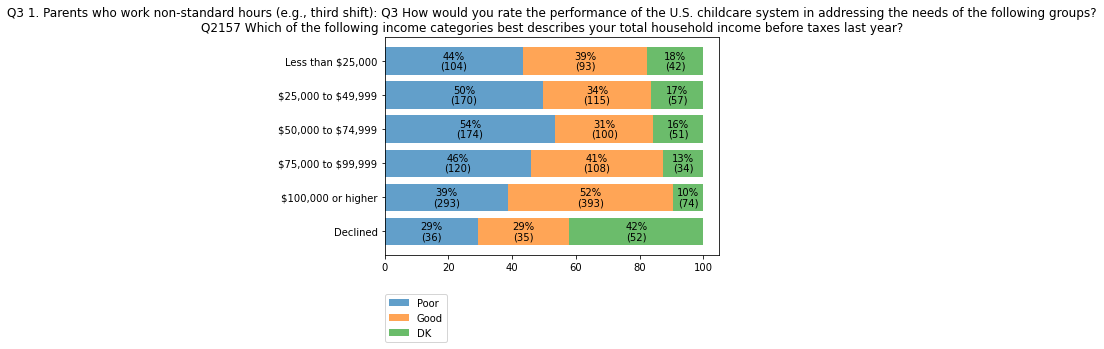

In [137]:
x_bar('q3_1_grpd', 'income_rec')

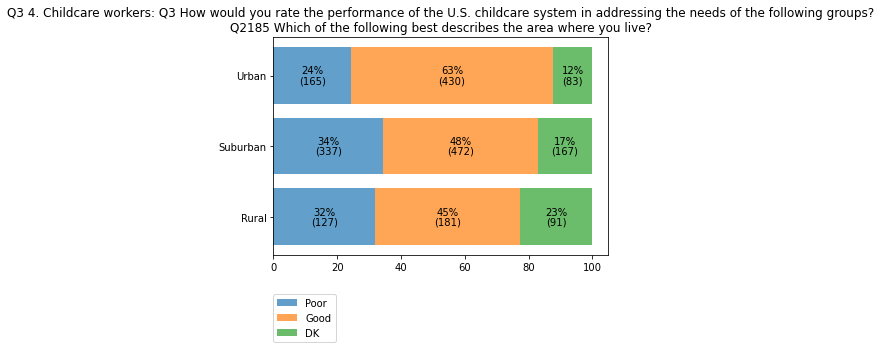

In [145]:
x_bar('q3_4_grpd', 'residential_area')

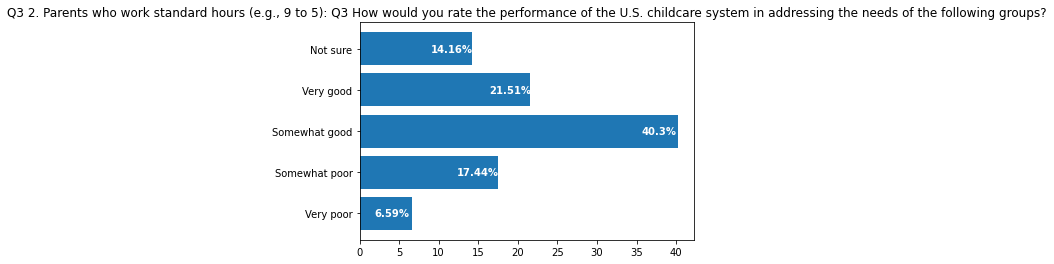

In [225]:
uni_bar('q3_2')

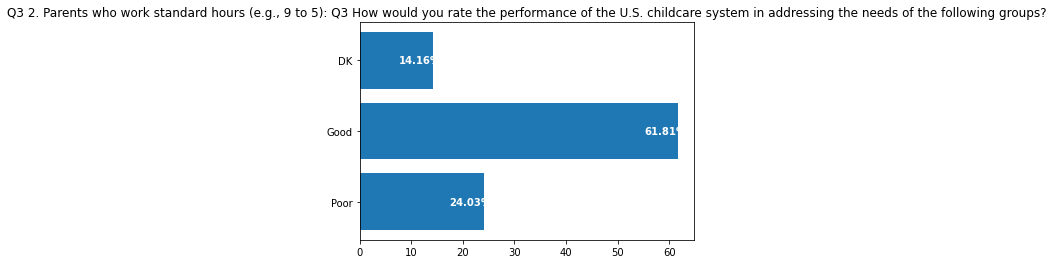

In [105]:
uni_bar('q3_2_grpd')

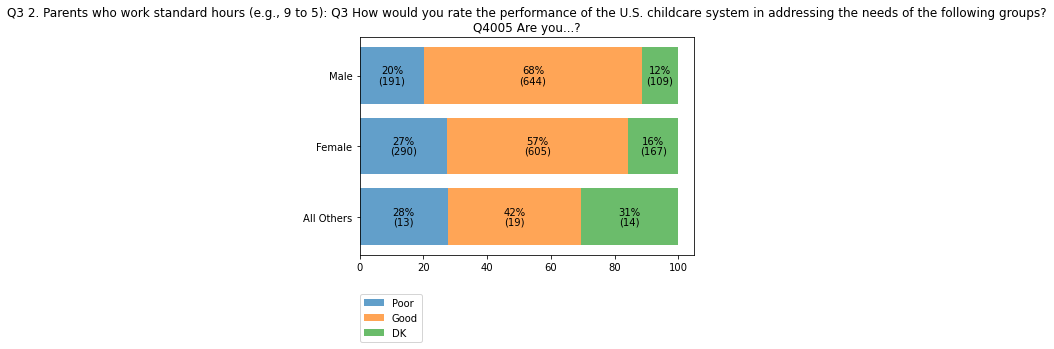

In [226]:
x_bar('q3_2_grpd', 'sex')

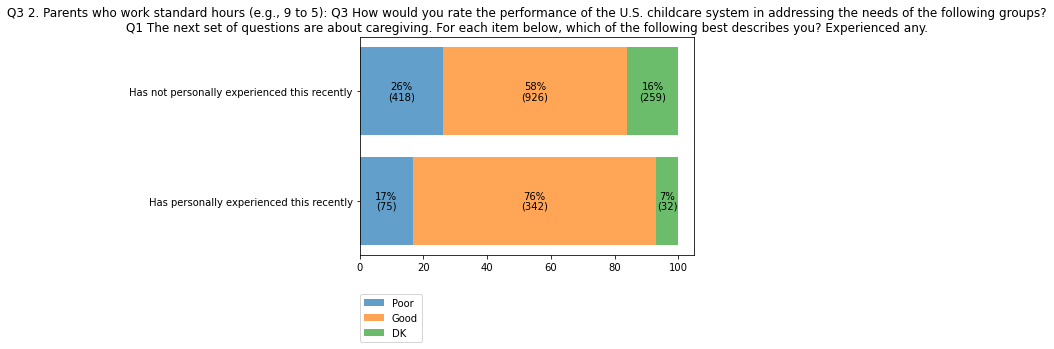

In [233]:
x_bar('q3_2_grpd', 'q1_all_exp')

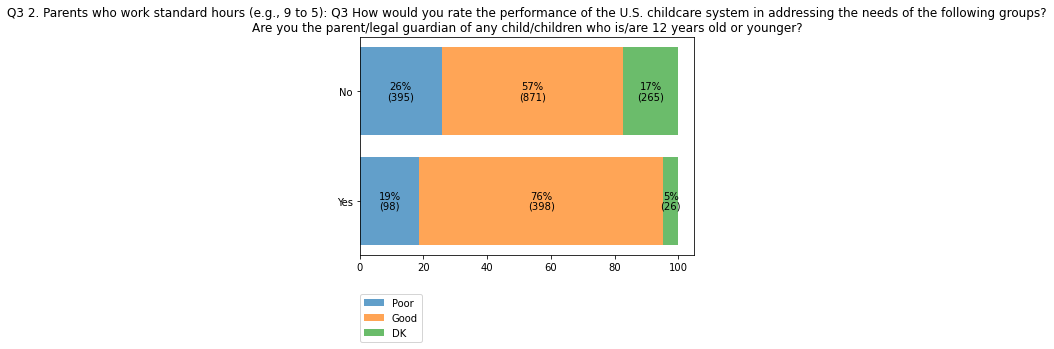

In [234]:
x_bar('q3_2_grpd', 'child_net_lt13')

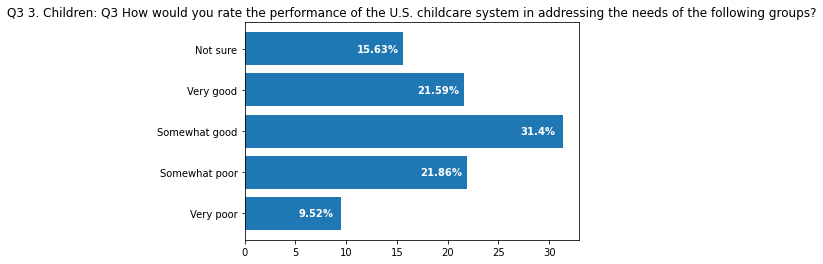

In [227]:
uni_bar('q3_3')

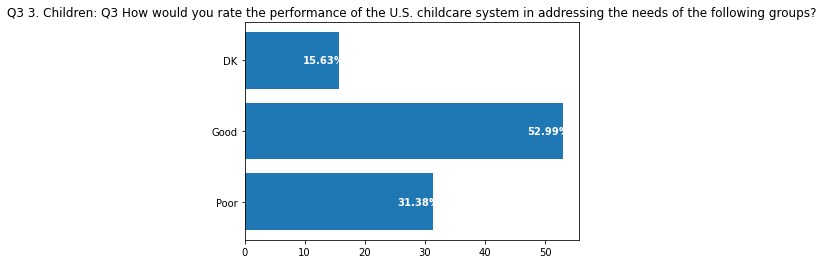

In [106]:
uni_bar('q3_3_grpd')

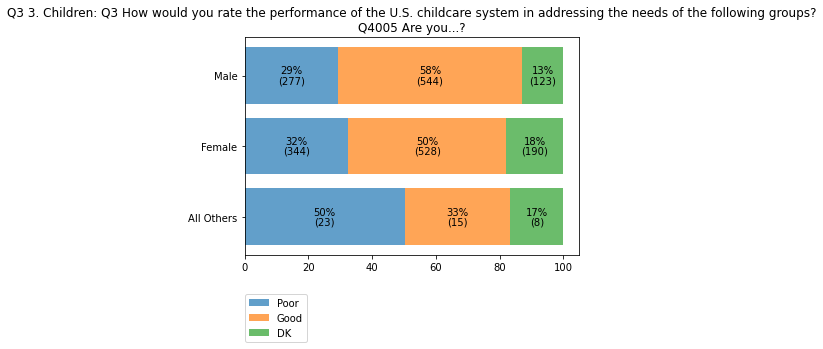

In [228]:
x_bar('q3_3_grpd', 'sex')

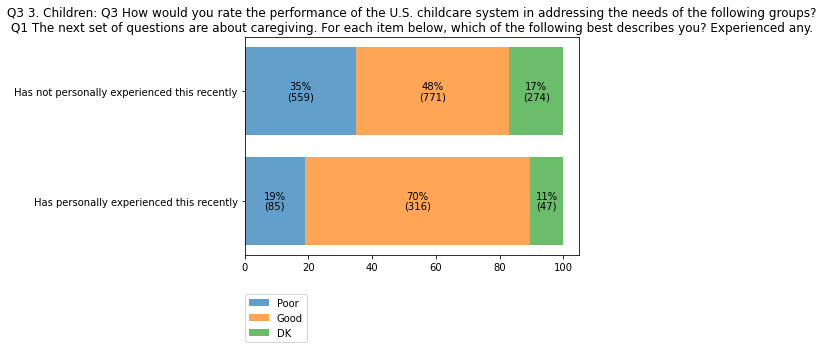

In [235]:
x_bar('q3_3_grpd', 'q1_all_exp')

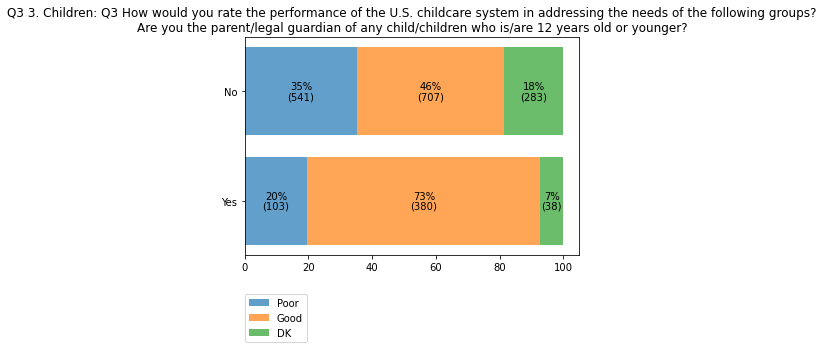

In [236]:
x_bar('q3_3_grpd', 'child_net_lt13')

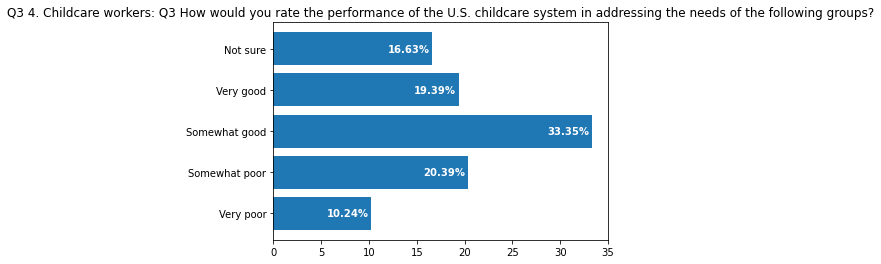

In [237]:
uni_bar('q3_4')

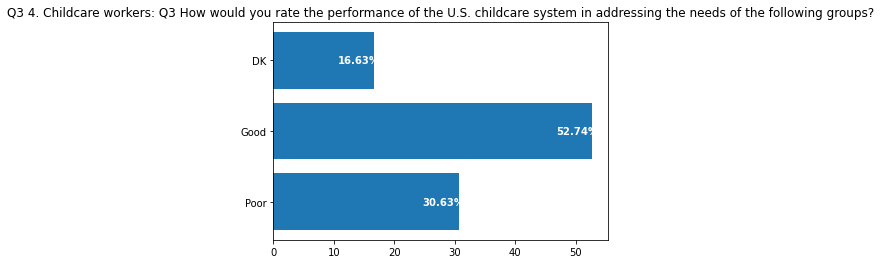

In [107]:
uni_bar('q3_4_grpd')

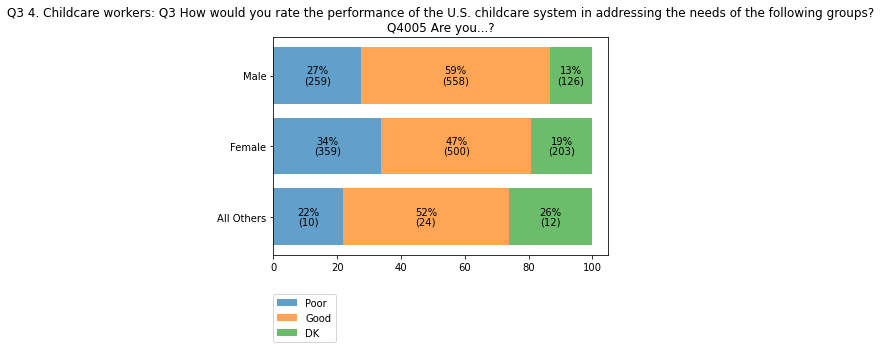

In [238]:
x_bar('q3_4_grpd', 'sex')

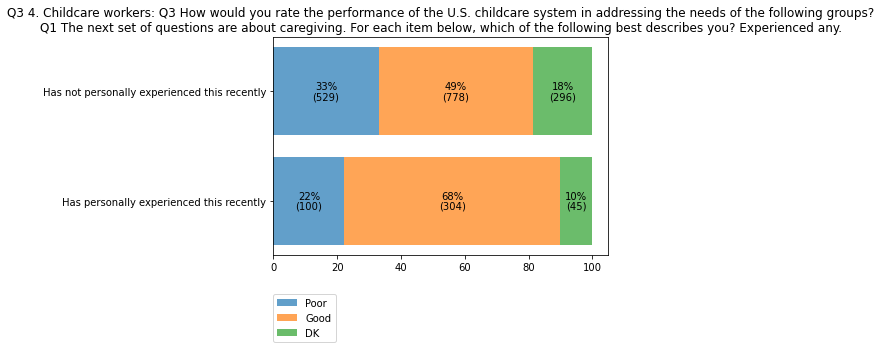

In [239]:
x_bar('q3_4_grpd', 'q1_all_exp')

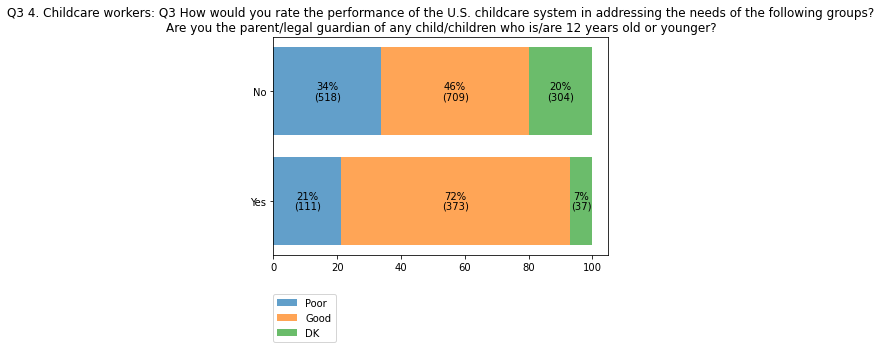

In [240]:
x_bar('q3_4_grpd', 'child_net_lt13')

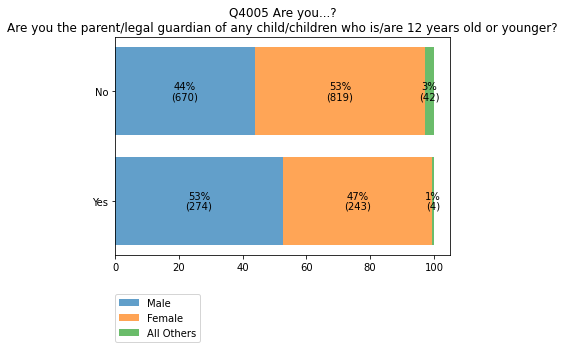

In [241]:
x_bar('sex','child_net_lt13')

### Childcare for average family

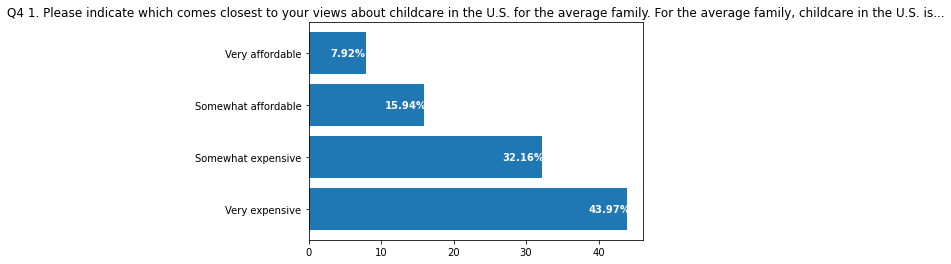

In [242]:
uni_bar('q4_1')

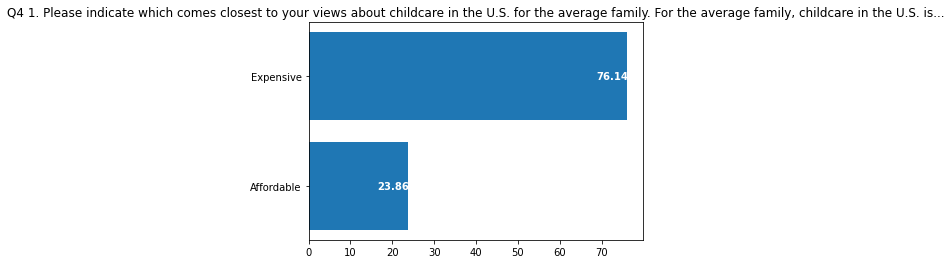

In [108]:
uni_bar('q4_1_bin')

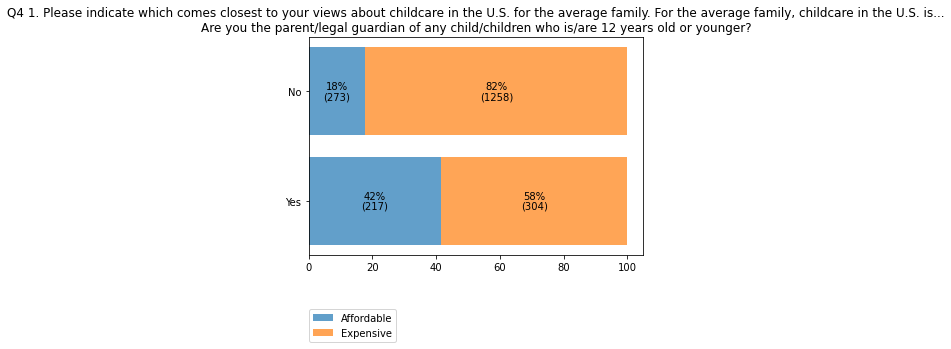

In [243]:
x_bar('q4_1_bin', 'child_net_lt13')

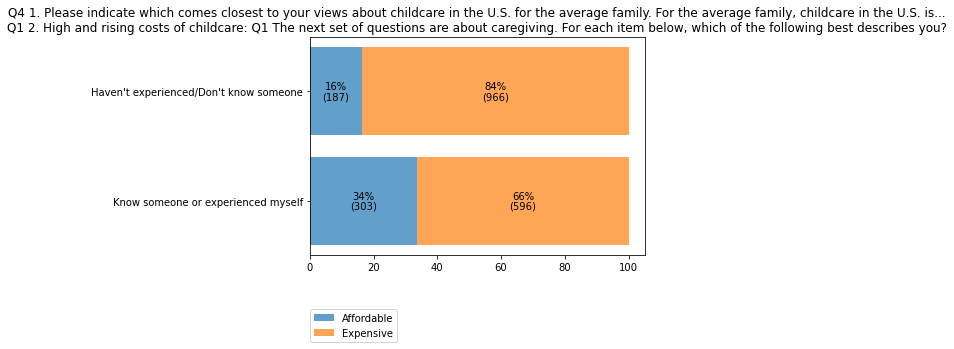

In [110]:
x_bar('q4_1_bin', 'q1_2_know_exp')

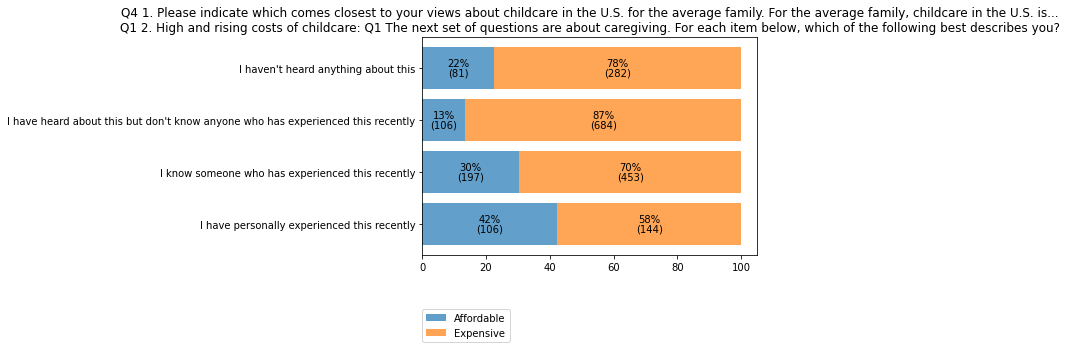

In [111]:
x_bar('q4_1_bin', 'q1_2')

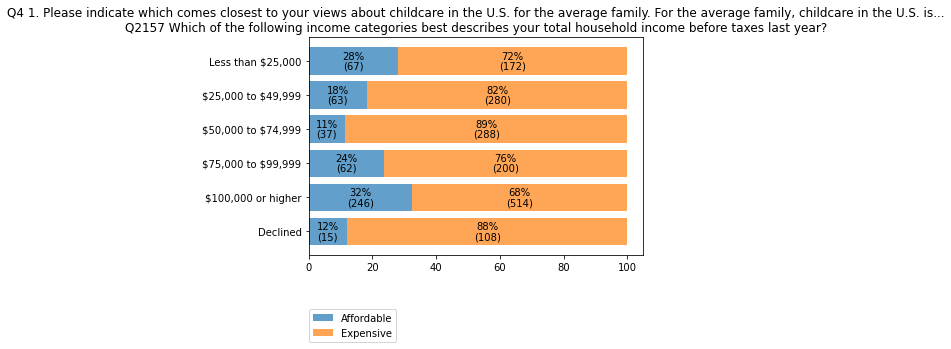

In [112]:
x_bar('q4_1_bin', 'income_rec')

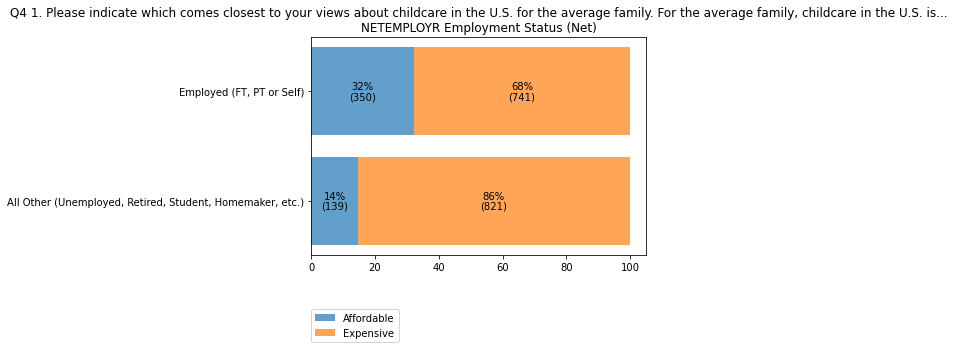

In [151]:
x_bar('q4_1_bin', 'employment_status')

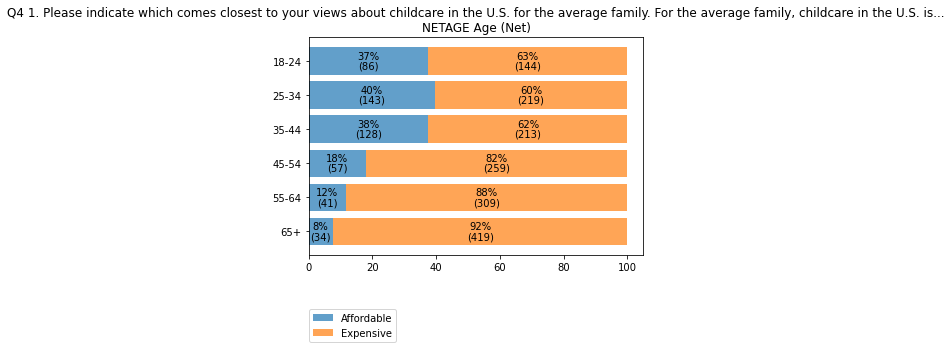

In [113]:
x_bar('q4_1_bin', 'age_cat')

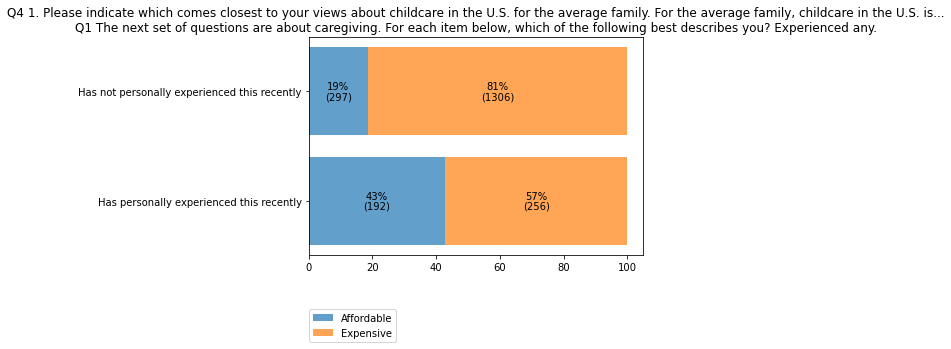

In [244]:
x_bar('q4_1_bin', 'q1_all_exp')

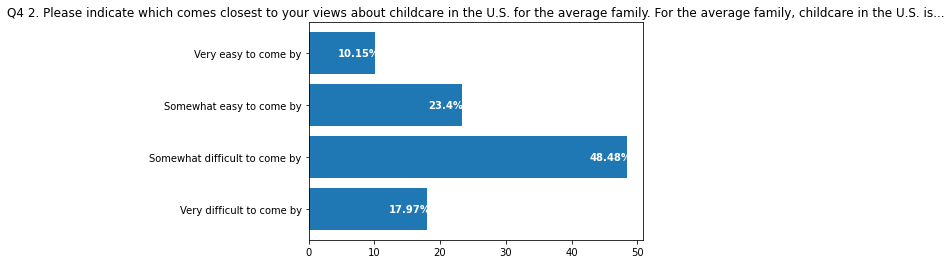

In [245]:
uni_bar('q4_2')

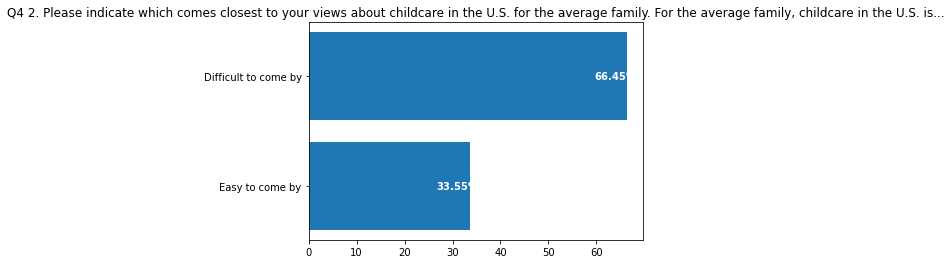

In [146]:
uni_bar('q4_2_bin')

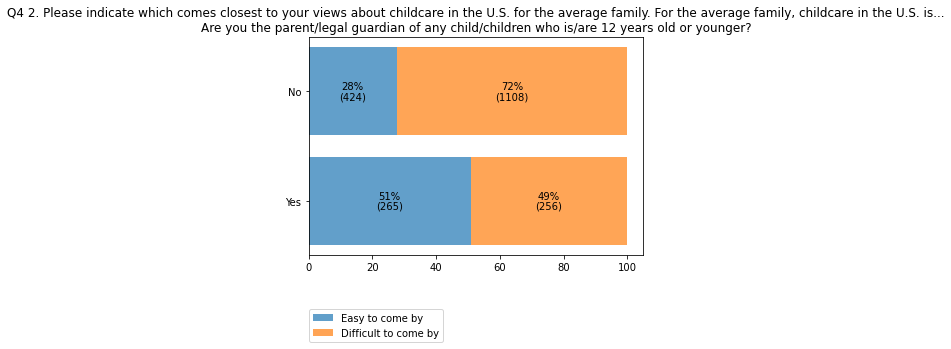

In [246]:
x_bar('q4_2_bin', 'child_net_lt13')

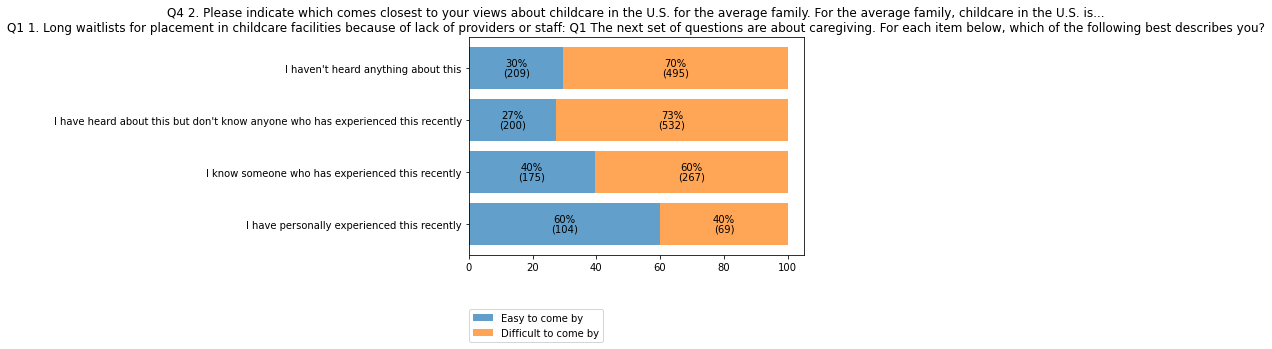

In [147]:
x_bar('q4_2_bin', 'q1_1')

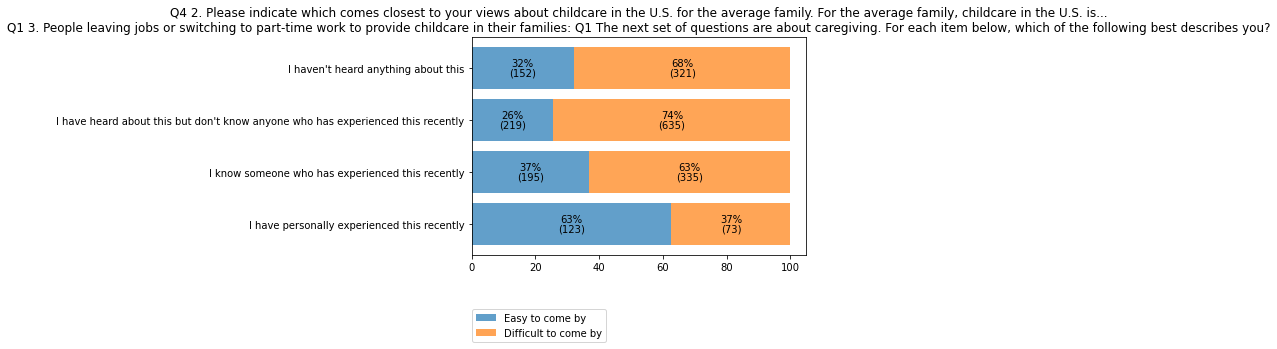

In [148]:
x_bar('q4_2_bin', 'q1_3')

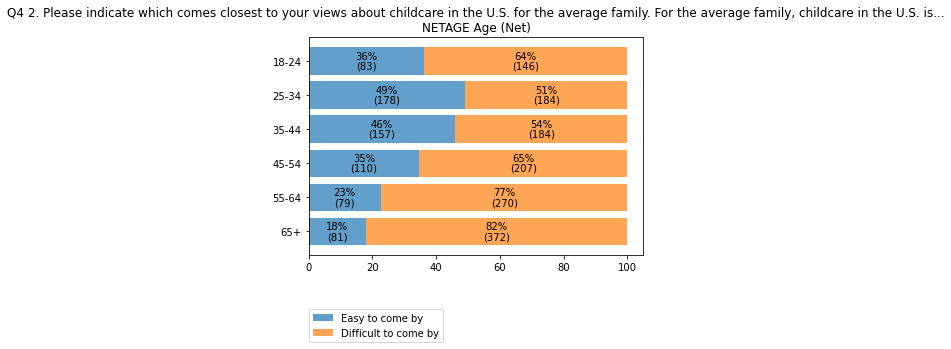

In [149]:
x_bar('q4_2_bin', 'age_cat')

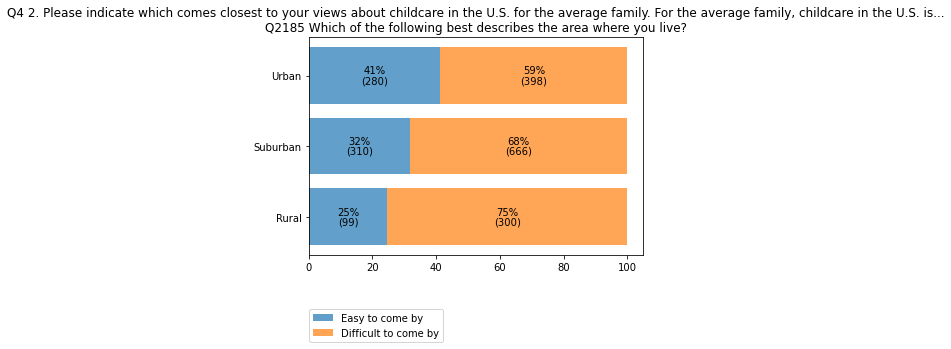

In [150]:
x_bar('q4_2_bin', 'residential_area')

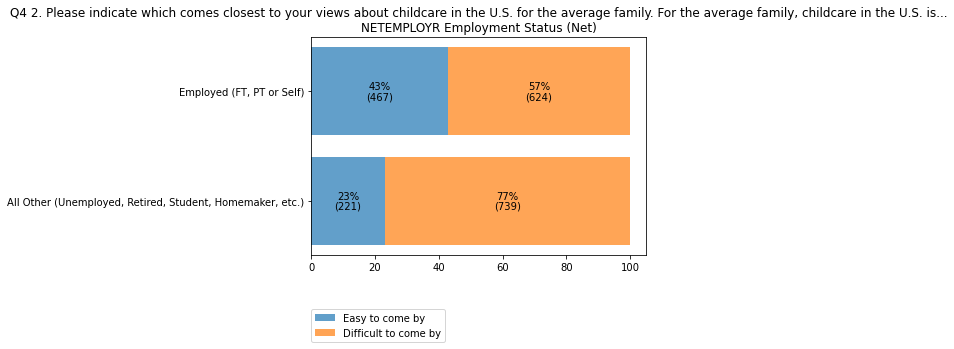

In [152]:
x_bar('q4_2_bin', 'employment_status')

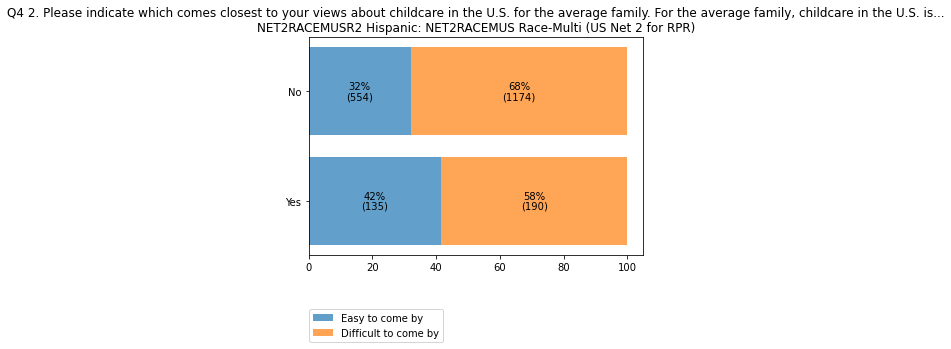

In [153]:
x_bar('q4_2_bin', 'race_hisp')

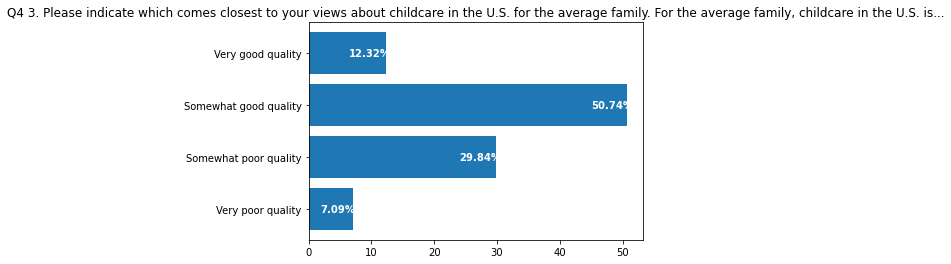

In [154]:
uni_bar('q4_3')

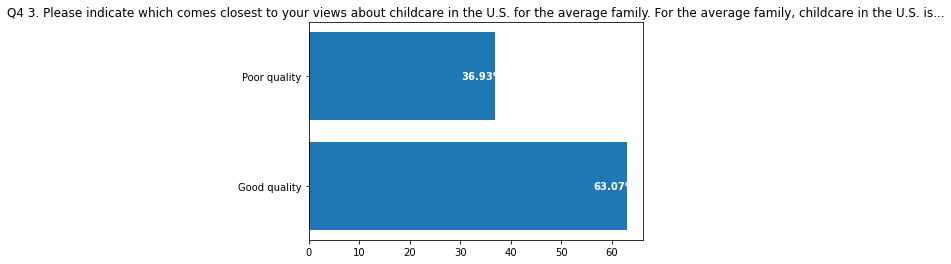

In [155]:
uni_bar('q4_3_bin')

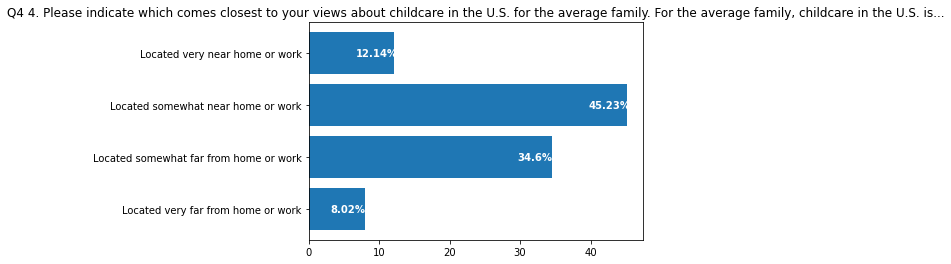

In [156]:
uni_bar('q4_4')

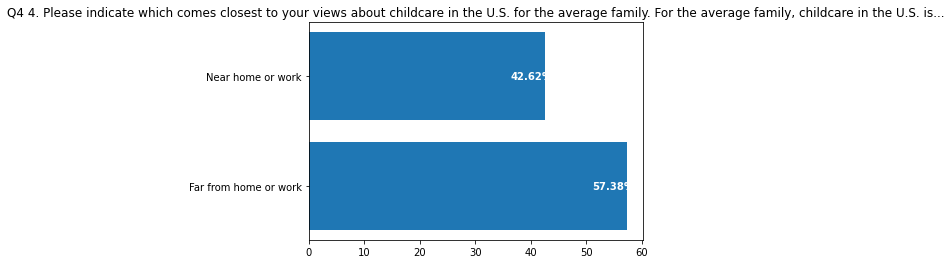

In [157]:
uni_bar('q4_4_bin')

### Support for families

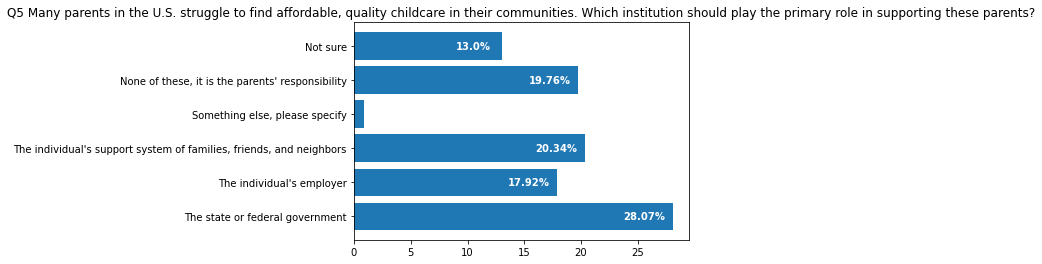

In [247]:
uni_bar('q5')

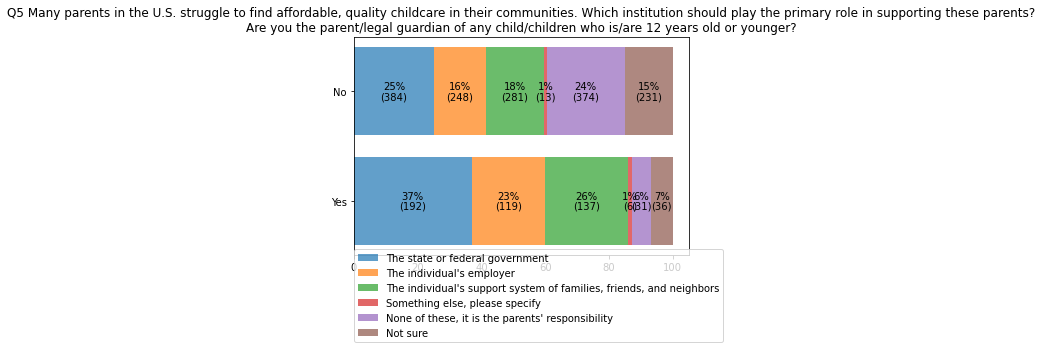

In [248]:
x_bar('q5', 'child_net_lt13')

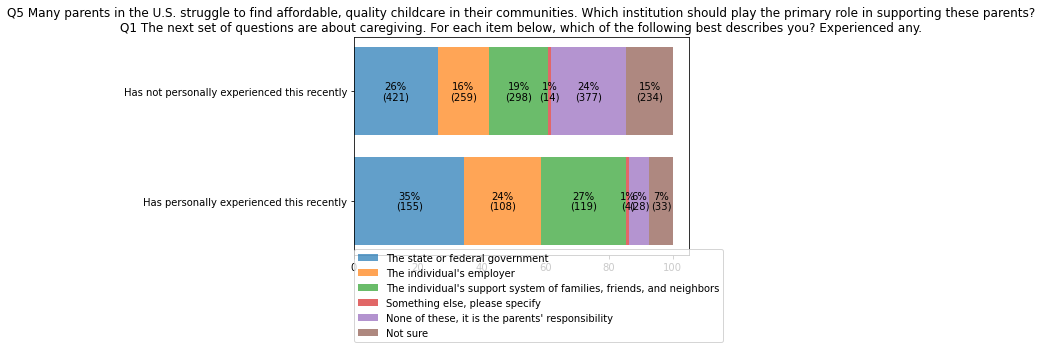

In [63]:
x_bar('q5', 'q1_all_exp')

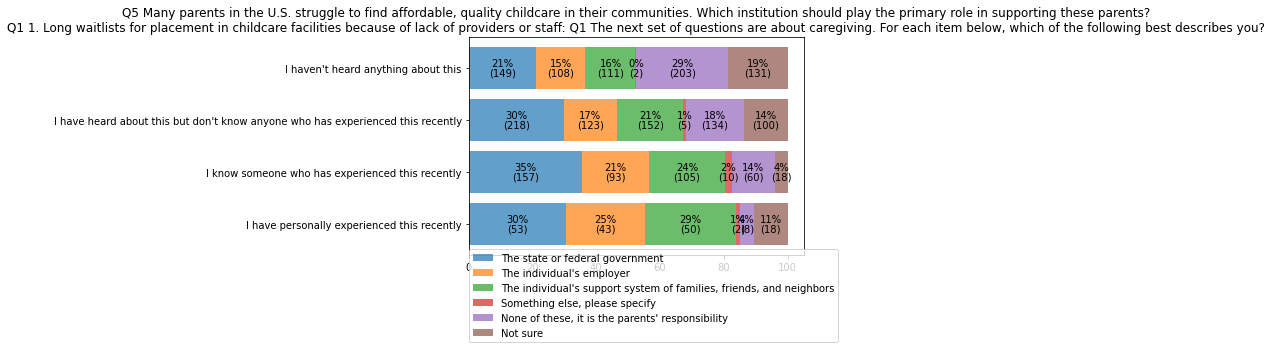

In [159]:
x_bar('q5', 'q1_1')

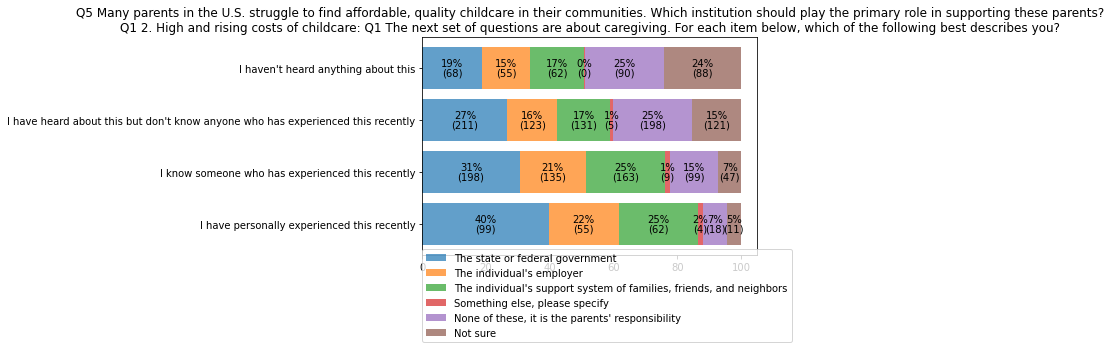

In [160]:
x_bar('q5', 'q1_2')

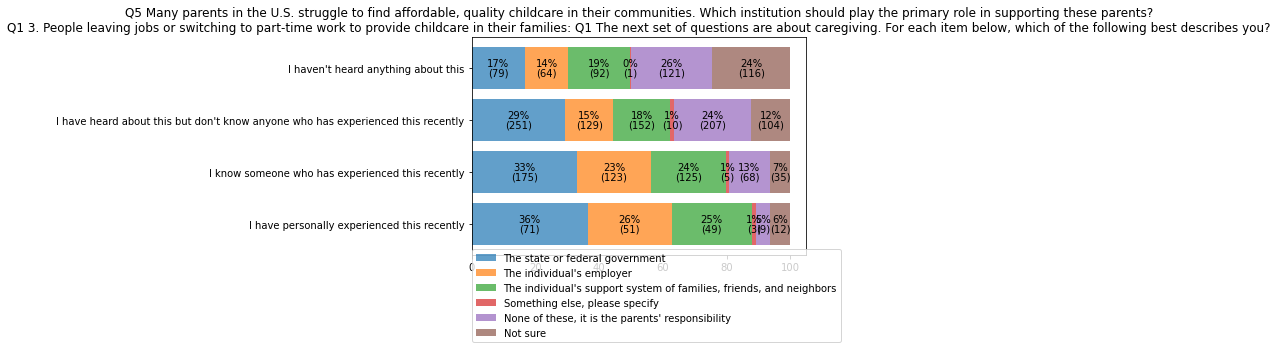

In [161]:
x_bar('q5', 'q1_3')

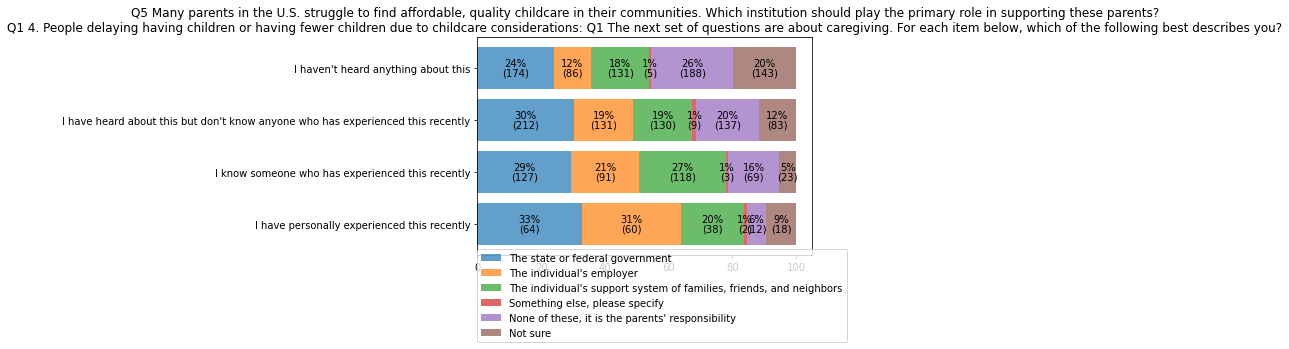

In [162]:
x_bar('q5', 'q1_4')

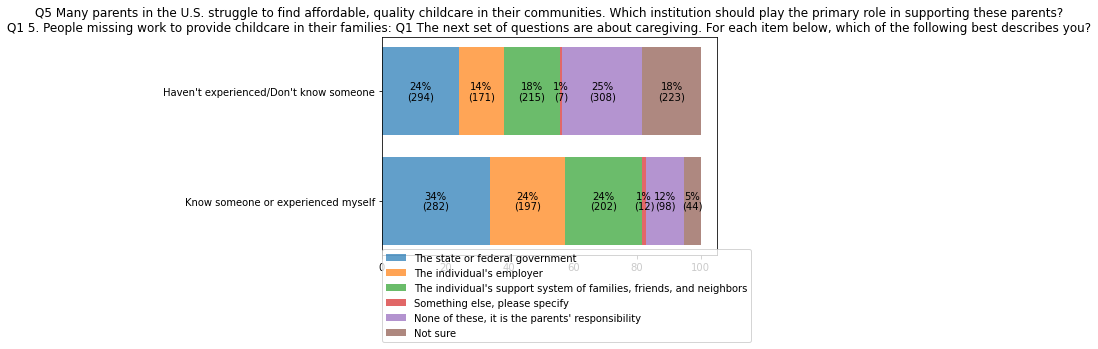

In [169]:
x_bar('q5', 'q1_5_know_exp')

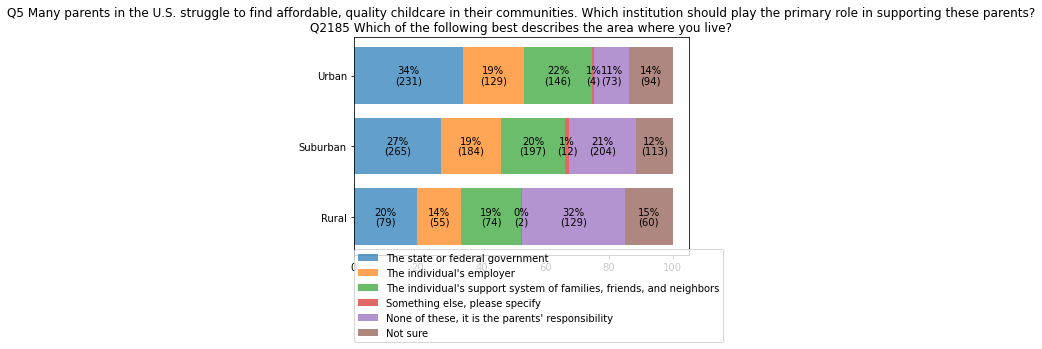

In [170]:
x_bar('q5', 'residential_area')

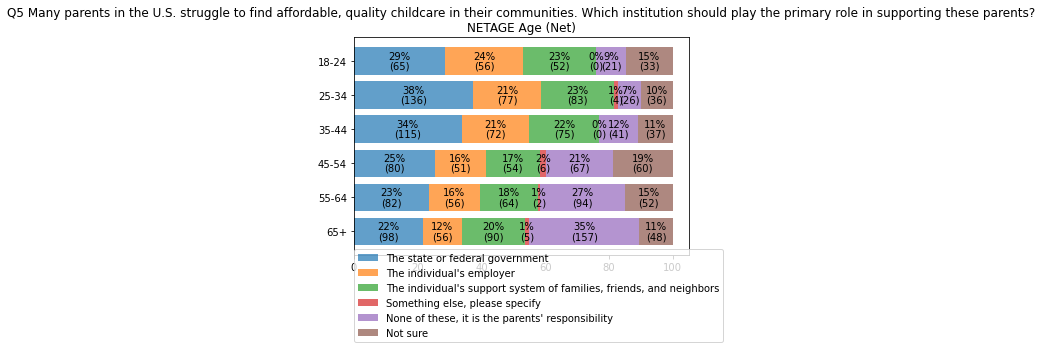

In [171]:
x_bar('q5', 'age_cat')

In [173]:
#x_bar('q5', 'race_hisp')

### Corporate benefits

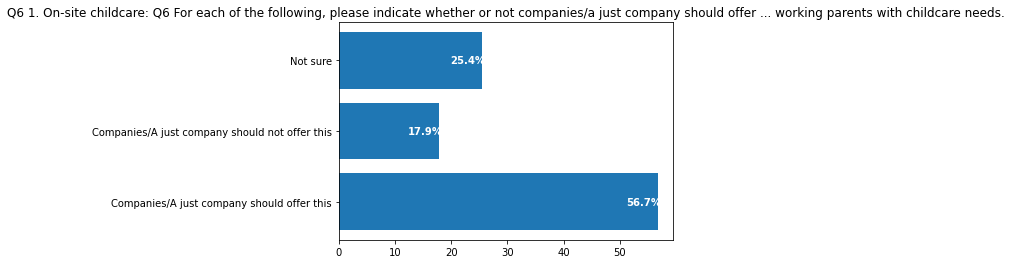

In [30]:
uni_bar('q6_1')

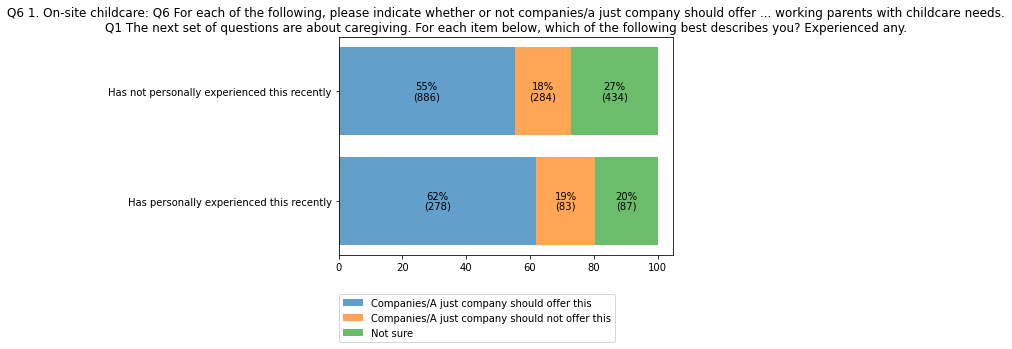

In [64]:
x_bar('q6_1', 'q1_all_exp')

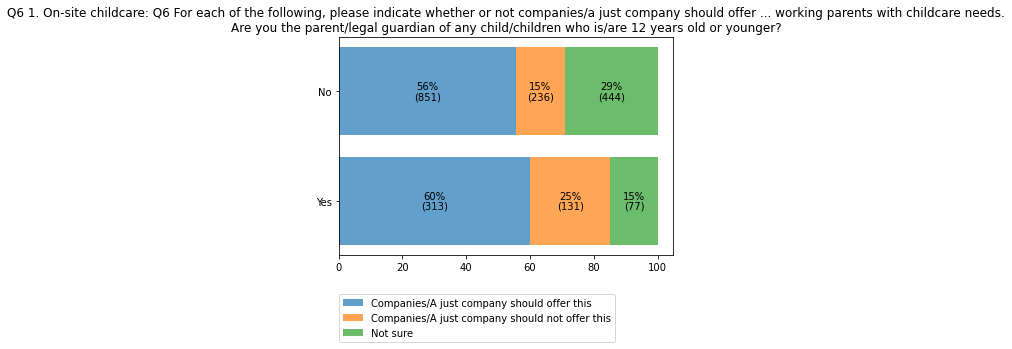

In [65]:
x_bar('q6_1', 'child_net_lt13')

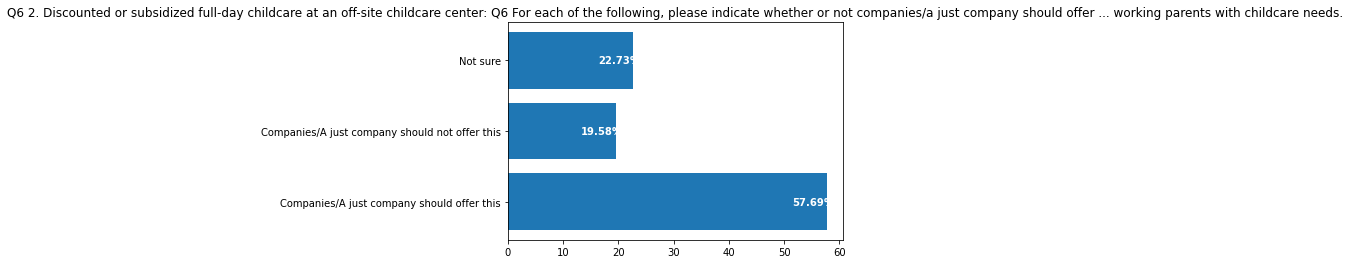

In [31]:
uni_bar('q6_2')

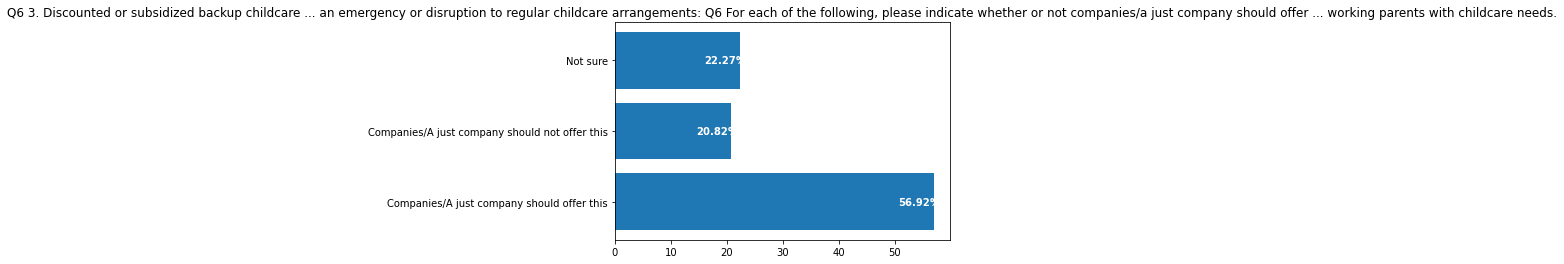

In [32]:
uni_bar('q6_3')

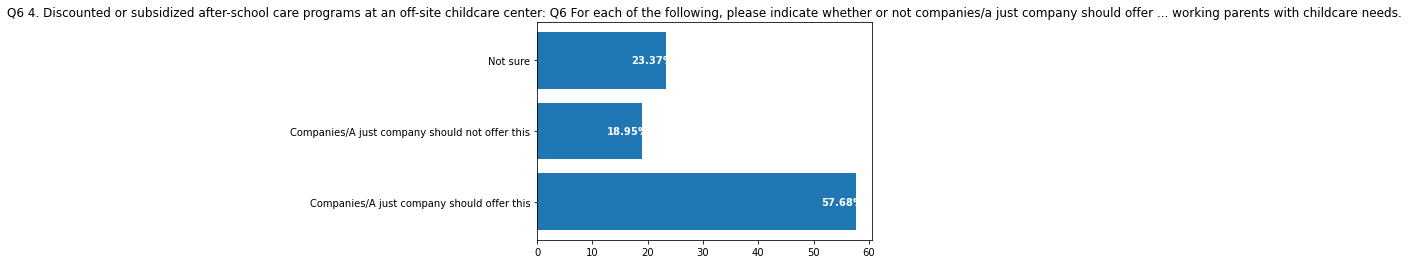

In [33]:
uni_bar('q6_4')

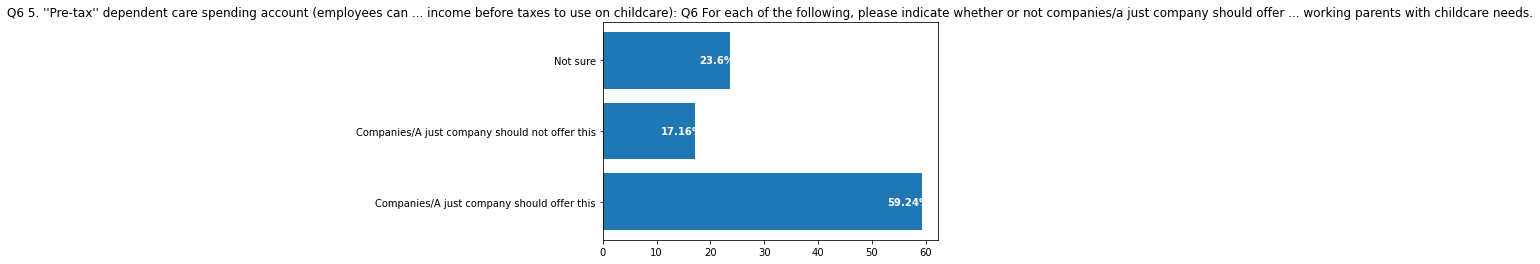

In [34]:
uni_bar('q6_5')

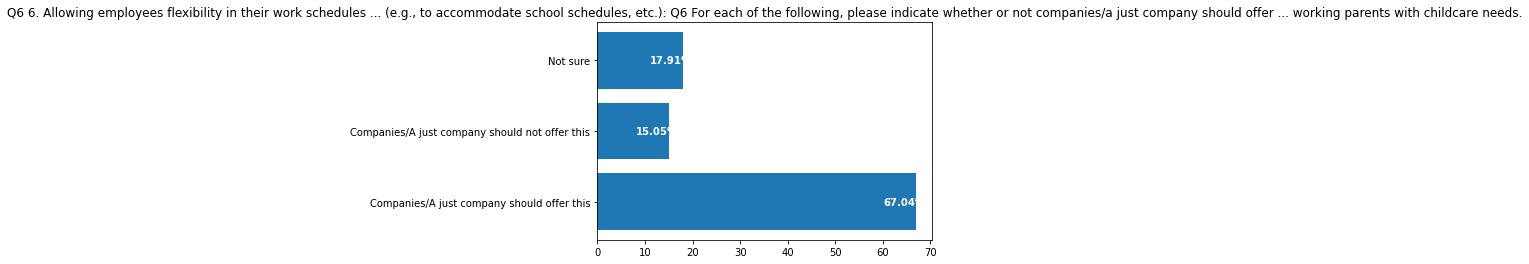

In [35]:
uni_bar('q6_6')

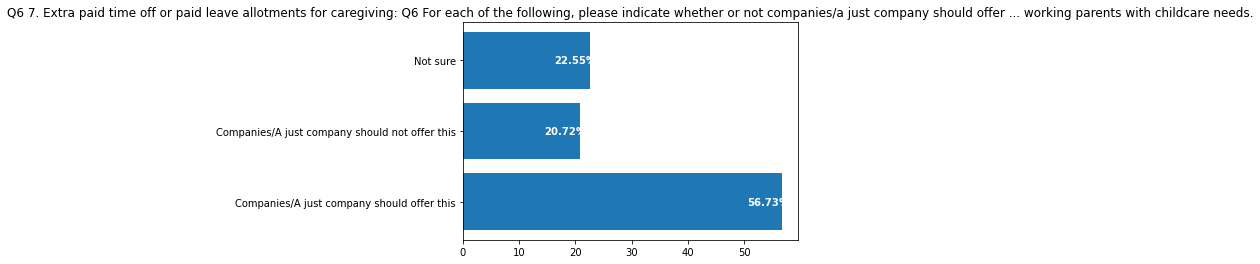

In [36]:
uni_bar('q6_7')

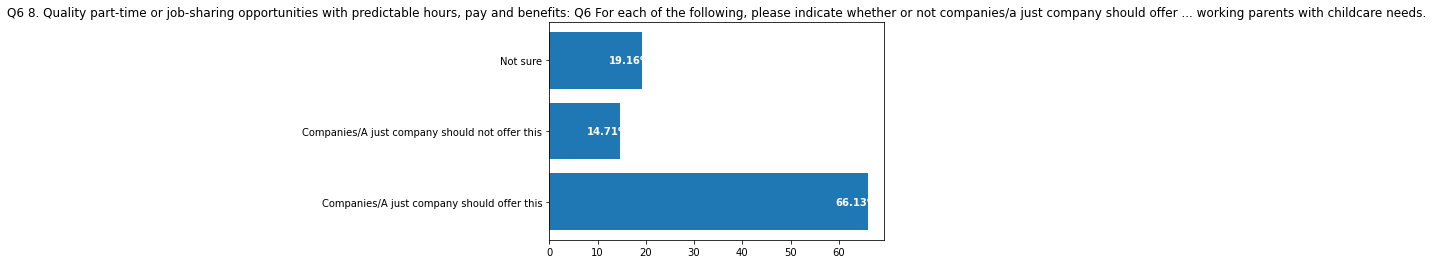

In [37]:
uni_bar('q6_8')

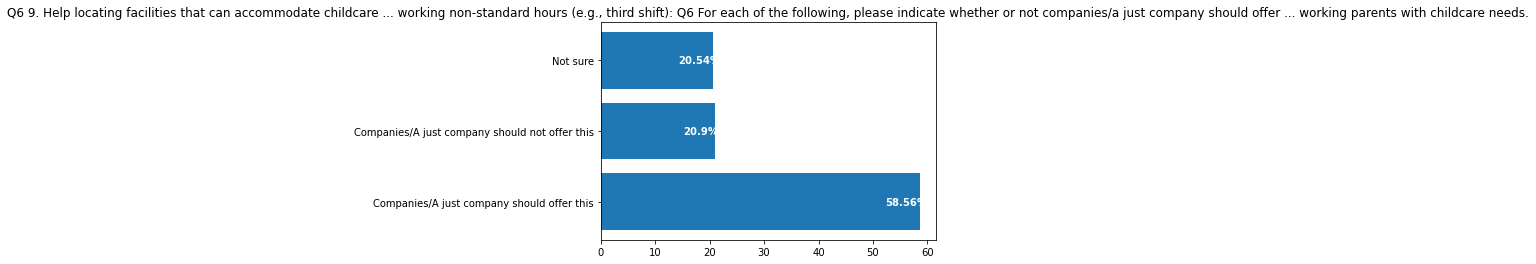

In [38]:
uni_bar('q6_9')

### Improving Childcare

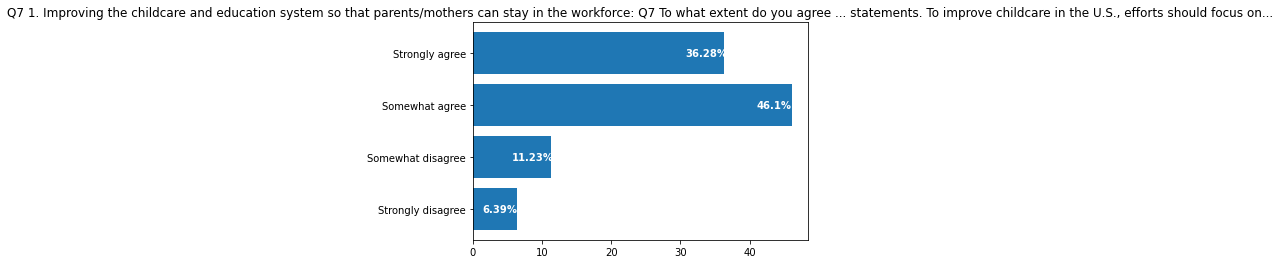

In [39]:
uni_bar('q7_1')

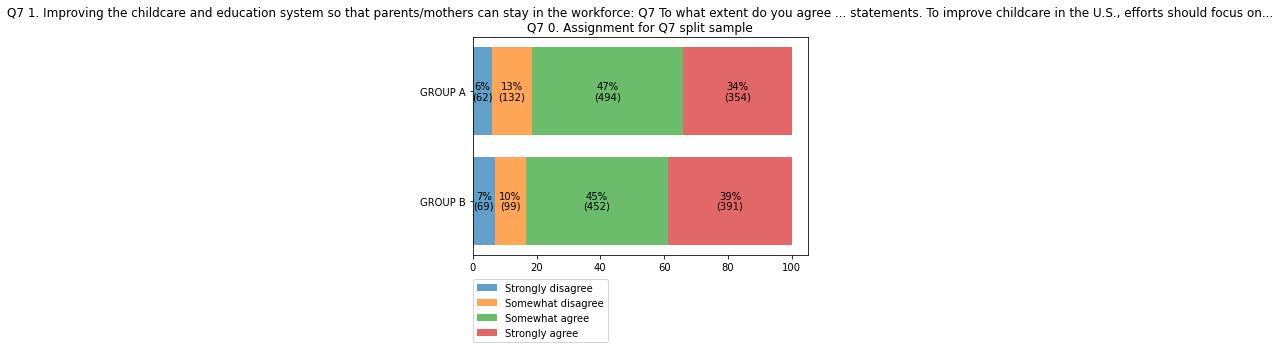

In [40]:
x_bar('q7_1', 'q7_group')

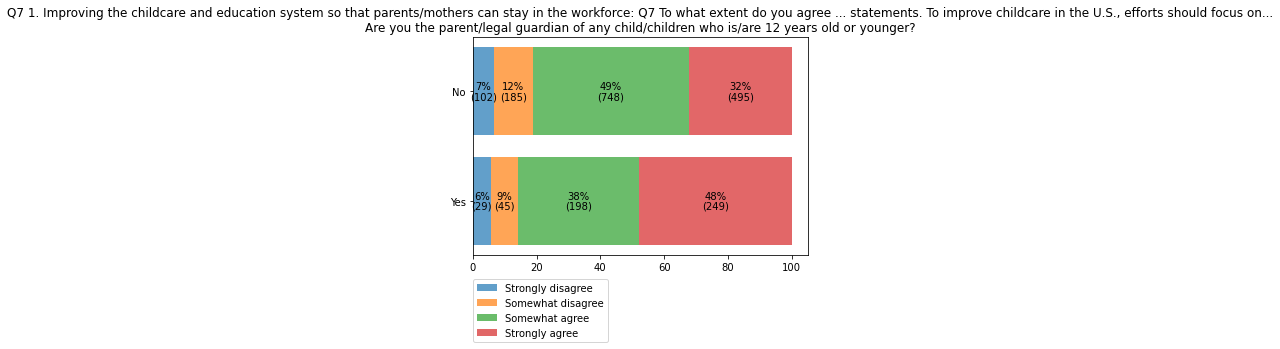

In [66]:
x_bar('q7_1', 'child_net_lt13')

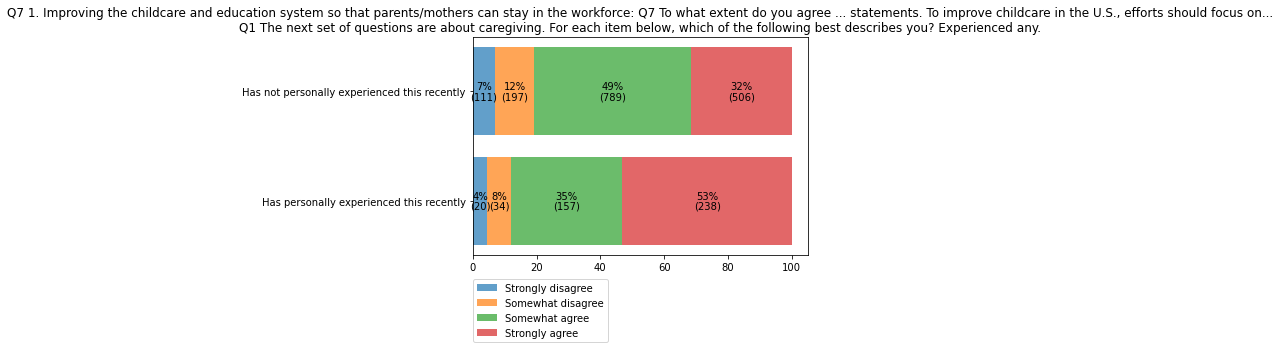

In [67]:
x_bar('q7_1', 'q1_all_exp')

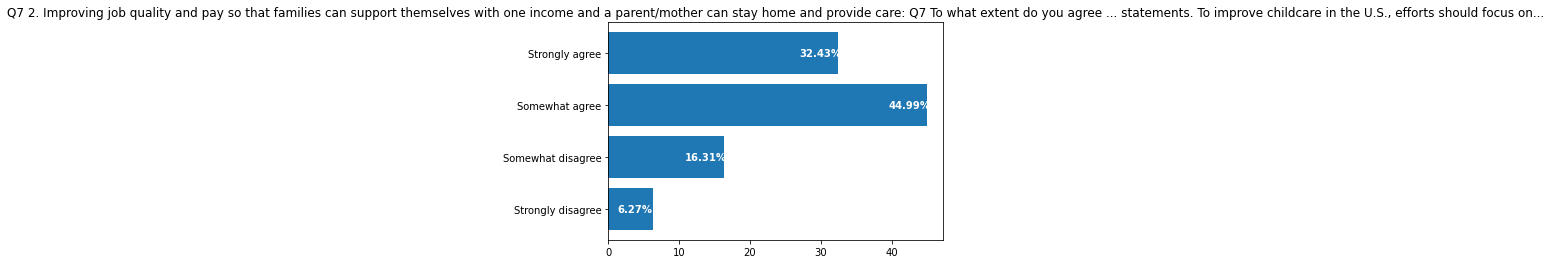

In [41]:
uni_bar('q7_2')

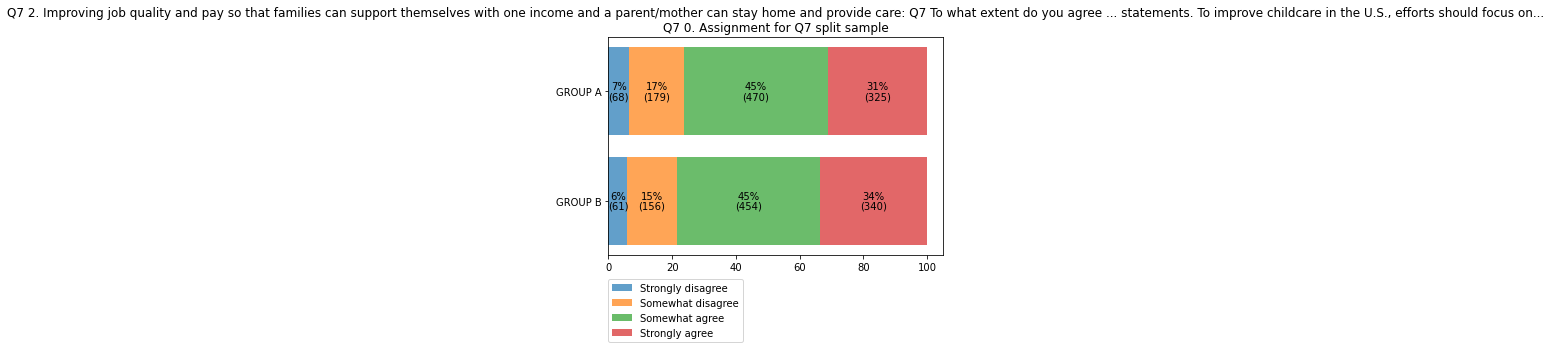

In [42]:
x_bar('q7_2', 'q7_group')

### Federal policy paid leave

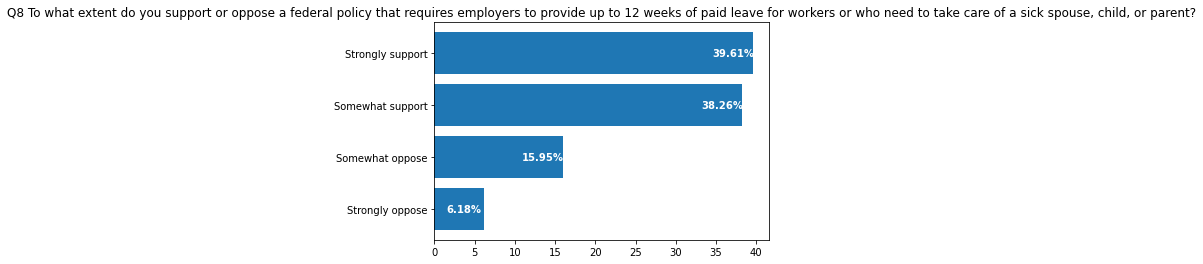

In [43]:
uni_bar('q8')

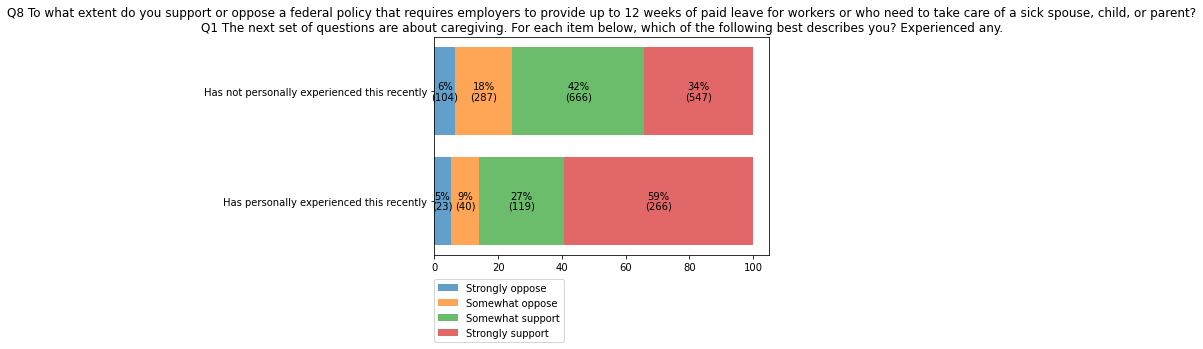

In [68]:
x_bar('q8', 'q1_all_exp')

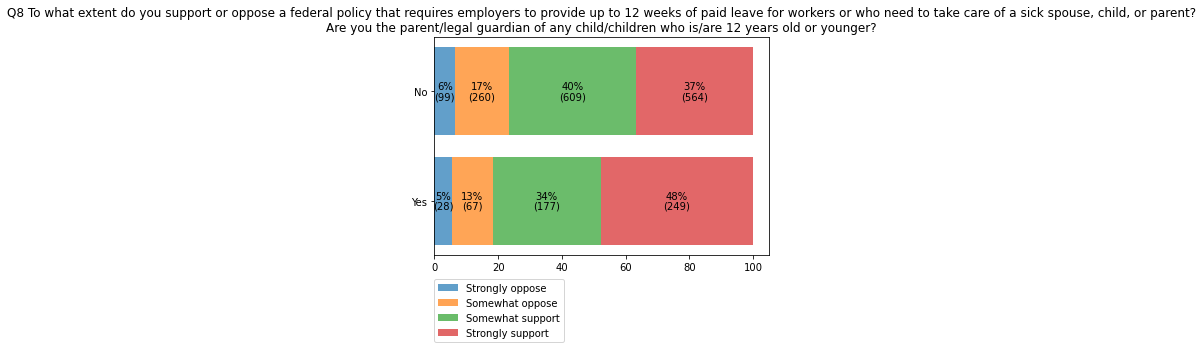

In [69]:
x_bar('q8', 'child_net_lt13')

# NOTE: Key variables and functions

Data and data info:
- data: main dataset
- meta_dict: question wording
- labels_dict: question response codes and wording (meta.variable_value_labels)

Column/variable info:
- survey_questions: list of survey q column names
- demos_cat: list of categorical demographic variable column names
- demos_num: list of numeric demographic variable column names

Functions:
- weighted_freq: univarite frequency + prop table
- uni_bar: weighted univariate bar plot (prop)
- weighted_xtabs: bivariate prop and freq tables
- x_bar: weighted bivariate bar plot (prop and freq)

# Recode variables for modeling

In [14]:
###################
# DATATYPE TO INT #
###################

col_to_int = data.columns[data.dtypes == float][:-1]
data[col_to_int] = data[col_to_int].astype('int')

In [ ]:
####################
# BINARIZE ALL CAT #
####################
cols_to_dummy = ['q1_1', 'q1_2', 'q1_3', 'q1_4', 'q1_5', 'q2_1', 'q2_2', 'q2_3', 'q2_4', 'q2_5', 'q3_1', 'q3_2', 
                 'q3_3', 'q3_4', 'q4_1', 'q4_2', 'q4_3', 'q4_4', 'q5', 'q6_group', 'q6_1', 'q6_2', 'q6_3', 'q6_4', 
                 'q6_5', 'q6_6', 'q6_7', 'q6_8', 'q6_9', 'q7_group', 'q7_1', 'q7_2', 'q8', 'q9', 'sex', 'age_cat', 
                 'marital_grouped', 'housing_status', 'residential_area', 'employment_status', 'educ', 
                 'income', 'disposable_assets', 'region', 'party_id', 'ideo', 'reg_voter']
data_dum = pd.get_dummies(data,
                          columns = cols_to_dummy)

In [ ]:
##################
# RENAME COLUMNS #
##################

dum_col_rename_dict = {
    'q1_1_1':'q1_1_notheard', 
    'q1_1_2':'q1_1_heard', 
    'q1_1_3':'q1_1_know',
    'q1_1_4':'q1_1_experienced',
    'q1_2_1':'q1_2_notheard',
    'q1_2_2':'q1_2_heard',
    'q1_2_3':'q1_2_know',
    'q1_2_4':'q1_2_experienced',
    'q1_3_1':'q1_3_notheard',
    'q1_3_2':'q1_3_heard',
    'q1_3_3':'q1_3_know',
    'q1_3_4':'q1_3_experienced',
    'q1_4_1':'q1_4_notheard',
    'q1_4_2':'q1_4_heard',
    'q1_4_3':'q1_4_know',
    'q1_4_4':'q1_4_experienced',
    'q1_5_1':'q1_5_notheard',
    'q1_5_2':'q1_5_heard',
    'q1_5_3':'q1_5_know',
    'q1_5_4':'q1_5_experienced',
    'q2_1_1':'q2_1_bad',
    'q2_1_2':'q2_1_good',
    'q2_1_3':'q2_1_neither',
    'q2_1_4':'q2_1_notsure',
    'q2_2_1':'q2_2_bad',
    'q2_2_2':'q2_2_good',
    'q2_2_3':'q2_2_neither',
    'q2_2_4':'q2_2_notsure',
    'q2_3_1':'q2_3_bad',
    'q2_3_2':'q2_3_good',
    'q2_3_3':'q2_3_neither',
    'q2_3_4':'q2_3_notsure',
    'q2_4_1':'q2_4_bad',
    'q2_4_2':'q2_4_good',
    'q2_4_3':'q2_4_neither',
    'q2_4_4':'q2_4_notsure',
    'q2_5_1':'q2_5_bad',
    'q2_5_2':'q2_5_good',
    'q2_5_3':'q2_5_neither',
    'q2_5_4':'q2_5_notsure',
    'q3_1_1':'q3_1_vpoor',
    'q3_1_2':'q3_1_spoor',
    'q3_1_3':'q3_1_sgood',
    'q3_1_4':'q3_1_vgood', 
    'q3_1_5':'q3_1_notsure', 
    'q3_2_1':'q3_2_vpoor', 
    'q3_2_2':'q3_2_spoor',
    'q3_2_3':'q3_2_sgood', 
    'q3_2_4':'q3_2_vgood',
    'q3_2_5':'q3_2_notsure', 
    'q3_3_1':'q3_3_vpoor', 
    'q3_3_2':'q3_3_spoor', 
    'q3_3_3':'q3_3_sgood', 
    'q3_3_4':'q3_3_vgood', 
    'q3_3_5':'q3_3_notsure', 
    'q3_4_1':'q3_4_vpoor',
    'q3_4_2':'q3_4_spoor', 
    'q3_4_3':'q3_4_sgood', 
    'q3_4_4':'q3_4_vgood', 
    'q3_4_5':'q3_4_notsure', 
    'q4_1_1':'q4_1_vexpensive', 
    'q4_1_2':'q4_1_sexpensive', 
    'q4_1_3':'q4_1_saffordable',
    'q4_1_4':'q4_1_vaffordable', 
    'q4_2_1':'q4_2_vdifficult', 
    'q4_2_2':'q4_2_sdifficult', 
    'q4_2_3':'q4_2_seasy', 
    'q4_2_4':'q4_2_veasy', 
    'q4_3_1':'q4_3_vpoor', 
    'q4_3_2':'q4_3_spoor',
    'q4_3_3':'q4_3_sgood', 
    'q4_3_4':'q4_3_vgood', 
    'q4_4_1':'q4_4_vfar', 
    'q4_4_2':'q4_4_sfar', 
    'q4_4_3':'q4_4_snear', 
    'q4_4_4':'q4_4_vnear', 
    'q5_1':'q5_govt',
    'q5_2':'q5_employer', 
    'q5_3':'q5_supportsystem', 
    'q5_4':'q5_else', 
    'q5_5':'q5_parent', 
    'q5_6':'q5_notsure', 
    'q6_group_1':'q6_companies', 
    'q6_group_2':'q6_justcompany',
    'q6_1_1':'q6_1_offer', 
    'q6_1_2':'q6_1_notoffer', 
    'q6_1_3':'q6_1_notsure', 
    'q6_2_1':'q6_2_offer', 
    'q6_2_2':'q6_2_notoffer', 
    'q6_2_3':'q6_2_notsure', 
    'q6_3_1':'q6_3_offer',
    'q6_3_2':'q6_3_notoffer', 
    'q6_3_3':'q6_3_notsure', 
    'q6_4_1':'q6_4_offer', 
    'q6_4_2':'q6_4_notoffer',
    'q6_4_3':'q6_4_notsure', 
    'q6_5_1':'q6_5_offer', 
    'q6_5_2':'q6_5_notoffer', 
    'q6_5_3':'q6_5_notsure', 
    'q6_6_1':'q6_6_offer', 
    'q6_6_2':'q6_6_notoffer', 
    'q6_6_3':'q6_6_notsure',
    'q6_7_1':'q6_7_offer', 
    'q6_7_2':'q6_7_notoffer', 
    'q6_7_3':'q6_7_notsure', 
    'q6_8_1':'q6_8_offer', 
    'q6_8_2':'q6_8_notoffer', 
    'q6_8_3':'q6_8_notsure', 
    'q6_9_1':'q6_9_offer',
    'q6_9_2':'q6_9_notoffer', 
    'q6_9_3':'q6_9_notsure', 
    'q7_group_1':'q7_parent', 
    'q7_group_2':'q7_mother', 
    'q7_1_1':'q7_1_strongdisagree', 
    'q7_1_2':'q7_1_somedisagree',
    'q7_1_3':'q7_1_someagree', 
    'q7_1_4':'q7_1_strongagree', 
    'q7_2_1':'q7_2_strongdisagree', 
    'q7_2_2':'q7_2_somedisagree', 
    'q7_2_3':'q7_2_someagree', 
    'q7_2_4':'q7_2_strongagree', 
    'q8_1':'q8_strongoppose',
    'q8_2':'q8_someoppose', 
    'q8_3':'q8_somesupport', 
    'q8_4':'q8_strongsupport', 
    'q9_1':'q9_require', 
    'q9_2':'q9_encourage', 
    'q9_3':'q9_neither', 
    'q9_4':'q9_notsure', 
    'sex_1':'sex_male',
    'sex_2':'sex_female', 
    'sex_3':'sex_other', 
    'age_cat_1':'age_18_24', 
    'age_cat_2':'age_25_34', 
    'age_cat_3':'age_35_44', 
    'age_cat_4':'age_45_54',
    'age_cat_5':'age_55_64', 
    'age_cat_6':'age_65_plus', 
    'marital_grouped_1':'marital_single', 
    'marital_grouped_2':'marital_partnered', 
    'marital_grouped_3':'marital_wds',
    'housing_status_1':'housing_homeowner', 
    'housing_status_2':'housing_renter', 
    'housing_status_3':'housing_none',
    'residential_area_1':'residential_urban', 
    'residential_area_2':'residential_suburban', 
    'residential_area_3':'residential_rural',
    'employment_status_1':'employ_employed', 
    'employment_status_2':'employ_notemployed', 
    'educ_1':'educ_lths', 
    'educ_2':'educ_somehs',
    'educ_3':'educ_hsdegree', 
    'educ_4':'educ_somecoll', 
    'educ_5':'educ_colldegree', 
    'educ_6':'educ_somegs', 
    'educ_7':'educ_gsdegree', 
    'educ_70':'educ_assocdegree', 
    'educ_71':'educ_jobtrain',
    'income_1':'inc_lt15k', 
    'income_2':'inc_15_lt25k', 
    'income_3':'inc_25_lt35k', 
    'income_4':'inc_35_lt50k', 
    'income_5':'inc_50_lt75k', 
    'income_6':'inc_75_lt100k',
    'income_7':'inc_100_lt125k', 
    'income_8':'inc_125_lt150k', 
    'income_9':'inc_150_lt200k', 
    'income_10':'inc_200_lt250k', 
    'income_11':'inc_250plus',
    'income_99':'inc_declined', 
    'disposable_assets_1':'assets_lt10k', 
    'disposable_assets_2':'assets_10_lt25k',
    'disposable_assets_3':'assets_25_lt50k', 
    'disposable_assets_4':'assets_50_lt100k', 
    'disposable_assets_5':'assets_100_lt250k',
    'disposable_assets_6':'assets_250_lt500k', 
    'disposable_assets_7':'assets_500_lt750k',
    'disposable_assets_8':'assets_750_lt1m', 
    'disposable_assets_9':'assets_1_lt2p5m', 
    'disposable_assets_10':'assets_2p5_lt5m',
    'disposable_assets_11':'assets_5mplus', 
    'disposable_assets_98':'assets_notsure', 
    'disposable_assets_99':'assets_declined',
    'region_1':'region_ne', 
    'region_2':'region_mw', 
    'region_3':'region_s', 
    'region_4':'region_w', 
    'party_id_1':'party_rep',
    'party_id_2':'party_dem', 
    'party_id_3':'party_ind', 
    'party_id_6':'party_oth', 
    'ideo_1':'ideo_con', 
    'ideo_2':'ideo_mod', 
    'ideo_3':'ideo_lib',
    'reg_voter_1':'vote_reg', 
    'reg_voter_2':'vote_notreg', 
    'reg_voter_8':'vote_notsure'
}

# rename dataframe columns
data_dum.rename(columns = dum_col_rename_dict, inplace = True)


In [ ]:
survey_qs_dum = ['q1_1_notheard', 'q1_1_heard', 'q1_1_know', 'q1_1_experienced', 
                 'q1_2_notheard', 'q1_2_heard', 'q1_2_know', 'q1_2_experienced', 
                 'q1_3_notheard', 'q1_3_heard', 'q1_3_know', 'q1_3_experienced', 
                 'q1_4_notheard', 'q1_4_heard', 'q1_4_know', 'q1_4_experienced', 
                 'q1_5_notheard', 'q1_5_heard', 'q1_5_know', 'q1_5_experienced', 
                 'q2_1_bad', 'q2_1_good', 'q2_1_neither', 'q2_1_notsure', 
                 'q2_2_bad', 'q2_2_good', 'q2_2_neither', 'q2_2_notsure', 
                 'q2_3_bad', 'q2_3_good', 'q2_3_neither', 'q2_3_notsure', 
                 'q2_4_bad', 'q2_4_good', 'q2_4_neither', 'q2_4_notsure', 
                 'q2_5_bad', 'q2_5_good', 'q2_5_neither', 'q2_5_notsure', 
                 'q3_1_vpoor', 'q3_1_spoor', 'q3_1_sgood', 'q3_1_vgood', 'q3_1_notsure', 
                 'q3_2_vpoor', 'q3_2_spoor', 'q3_2_sgood', 'q3_2_vgood', 'q3_2_notsure', 
                 'q3_3_vpoor', 'q3_3_spoor', 'q3_3_sgood', 'q3_3_vgood', 'q3_3_notsure', 
                 'q3_4_vpoor', 'q3_4_spoor', 'q3_4_sgood', 'q3_4_vgood', 'q3_4_notsure', 
                 'q4_1_vexpensive', 'q4_1_sexpensive', 'q4_1_saffordable', 'q4_1_vaffordable', 
                 'q4_2_vdifficult', 'q4_2_sdifficult', 'q4_2_seasy', 'q4_2_veasy', 
                 'q4_3_vpoor', 'q4_3_spoor', 'q4_3_sgood', 'q4_3_vgood', 
                 'q4_4_vfar', 'q4_4_sfar', 'q4_4_snear', 'q4_4_vnear', 
                 'q5_govt', 'q5_employer', 'q5_supportsystem', 'q5_else', 'q5_parent', 'q5_notsure', 
                 'q6_companies', 'q6_justcompany', 
                 'q6_1_offer', 'q6_1_notoffer', 'q6_1_notsure', 
                 'q6_2_offer', 'q6_2_notoffer', 'q6_2_notsure', 
                 'q6_3_offer', 'q6_3_notoffer', 'q6_3_notsure', 
                 'q6_4_offer', 'q6_4_notoffer', 'q6_4_notsure', 
                 'q6_5_offer', 'q6_5_notoffer', 'q6_5_notsure', 
                 'q6_6_offer', 'q6_6_notoffer', 'q6_6_notsure', 
                 'q6_7_offer', 'q6_7_notoffer', 'q6_7_notsure', 
                 'q6_8_offer', 'q6_8_notoffer', 'q6_8_notsure', 
                 'q6_9_offer', 'q6_9_notoffer', 'q6_9_notsure', 
                 'q7_parent', 'q7_mother', 
                 'q7_1_strongdisagree', 'q7_1_somedisagree', 'q7_1_someagree', 'q7_1_strongagree', 
                 'q7_2_strongdisagree', 'q7_2_somedisagree', 'q7_2_someagree', 'q7_2_strongagree', 
                 'q8_strongoppose', 'q8_someoppose', 'q8_somesupport', 'q8_strongsupport', 
                 'q9_require', 'q9_encourage', 'q9_neither', 'q9_notsure']
demos_dum = ['sex_male', 'sex_female', 'sex_other', 
             'age', 'age_18_24', 'age_25_34', 'age_35_44', 'age_45_54', 'age_55_64', 'age_65_plus',
             'child_lt3', 'child_3_lt6', 'child_6_lt10', 'child_10_lt13', 'child_13_lt18', 'child_18up', 
             'child_none', 'child_net_lt18', 'child_net_any', 
             'hh_adults', 'hh_children'
             'marital_single', 'marital_partnered', 'marital_wds', 
             'housing_homeowner', 'housing_renter', 'housing_none', 
             'residential_urban', 'residential_suburban', 'residential_rural', 
             'employ_employed', 'employ_notemployed', 
             'educ_lths', 'educ_somehs', 'educ_hsdegree', 'educ_somecoll', 'educ_colldegree', 'educ_somegs', 
             'educ_gsdegree', 'educ_assocdegree', 'educ_jobtrain', 
             'inc_lt15k', 'inc_15_lt25k', 'inc_25_lt35k', 'inc_35_lt50k', 'inc_50_lt75k', 'inc_75_lt100k', 
             'inc_100_lt125k', 'inc_125_lt150k', 'inc_150_lt200k', 'inc_200_lt250k', 'inc_250plus', 'inc_declined', 
             'assets_lt10k', 'assets_10_lt25k', 'assets_25_lt50k', 'assets_50_lt100k', 'assets_100_lt250k', 
             'assets_250_lt500k', 'assets_500_lt750k', 'assets_750_lt1m', 'assets_1_lt2p5m', 'assets_2p5_lt5m', 
             'assets_5mplus', 'assets_notsure', 'assets_declined', 
             'region_ne', 'region_mw', 'region_s', 'region_w', 
             'party_rep', 'party_dem', 'party_ind', 'party_oth', 
             'ideo_con', 'ideo_mod', 'ideo_lib', 
             'vote_reg', 'vote_notreg', 'vote_notsure',
             'zip']

In [ ]:
data_dum.shape

In [ ]:
weighted_freq('ideo')

In [ ]:
model_cols = ['q1_1_know', 'q1_1_experienced',
              'q1_2_know', 'q1_2_experienced',
              'q1_3_know', 'q1_3_experienced',
              'q1_4_know', 'q1_4_experienced',
              'q1_5_know', 'q1_5_experienced',
              'sex_female', 'age',
              'child_lt3', 'child_3_lt6', 'child_6_lt10', 'child_10_lt13', 'child_13_lt18', 'child_18up',
              'hh_adults', 'hh_children'
              'marital_single', 'marital_partnered',
              'housing_homeowner',
              'residential_urban', 'residential_rural', 
              'employ_employed',
              'educ_lths', 'educ_somehs', 'educ_hsdegree', 'educ_colldegree', 'educ_somegs', 
              'educ_gsdegree', 'educ_assocdegree', 'educ_jobtrain',
              'inc_lt15k', 'inc_15_lt25k', 'inc_25_lt35k', 'inc_35_lt50k', 'inc_75_lt100k', 
              'inc_100_lt125k', 'inc_125_lt150k', 'inc_150_lt200k', 'inc_200_lt250k', 'inc_250plus', 'inc_declined',
              'assets_10_lt25k', 'assets_25_lt50k', 'assets_50_lt100k', 'assets_100_lt250k', 
              'assets_250_lt500k', 'assets_500_lt750k', 'assets_750_lt1m', 'assets_1_lt2p5m', 'assets_2p5_lt5m', 
              'assets_5mplus', 'assets_notsure', 'assets_declined',
              'region_ne', 'region_mw', 'region_w',
              'party_rep', 'party_dem',  
              'ideo_con', 'ideo_lib', 
              'vote_reg'
              ]

# Model

In [ ]:
# Import train_test_split.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Import logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
meta_dict['q5']

In [ ]:
labels_dict['q5']

In [ ]:
X = data_dum.drop(columns = data_dum.columns.difference(model_cols))
y = data_dum['q5_govt']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [ ]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [ ]:
poly = PolynomialFeatures(include_bias = False)
Xsp_train = poly.fit_transform(Xs_train)
Xsp_test = poly.transform(Xs_test)

In [ ]:
features = poly.get_feature_names(input_features = X.columns)

In [ ]:
lr = LogisticRegression(penalty = 'l1', solver = 'liblinear', class_weight = 'balanced', max_iter = 1000)

In [ ]:
lr.fit(Xsp_train, y_train)

In [ ]:
lr.score(Xsp_train, y_train), lr.score(Xsp_test, y_test)

In [ ]:
pd.Series(np.exp(lr.coef_[0]), index = features).sort_values(ascending = False).head(25)#, key = np.abs).head(25)

In [ ]:
fig = sns.violinplot(x = 'q5_govt',
                     y = 'hh_adults',
                     hue = 'assets_1_lt2p5m',
                     data = data_dum,
                     palette = "crest")

# Analysis

In [ ]:
# data: dataframe
# meta_dict: question wording
# labels_dict: question labels
# survey_questions: list of column names for survey qs
# demos_cat: list of column names for demo variables that are categorical
# demos_num: list of column names for demo vars that are numeric
# weighted_freq(x): function to get prop and freq for single column
# weighted_xtabs(x, y): function to get crosstabs - proportion and frequencies - for two columns
# uni_bar(x): function to get bar chart single variable
# x_bar(i, j): function to get stacked bar chart, two variables

## All survey qs

In [ ]:
q = survey_questions[0]
uni_bar(q)

In [ ]:
q = survey_questions[1]
uni_bar(q)

In [ ]:
q = survey_questions[2]
uni_bar(q)

In [ ]:
q = survey_questions[3]
uni_bar(q)

In [ ]:
q = survey_questions[4]
uni_bar(q)

In [ ]:
q = survey_questions[5]
uni_bar(q)

In [ ]:
q = survey_questions[6]
uni_bar(q)

In [ ]:
q = survey_questions[7]
uni_bar(q)

In [ ]:
q = survey_questions[8]
uni_bar(q)

In [ ]:
q = survey_questions[9]
uni_bar(q)

In [ ]:
q = survey_questions[10]
uni_bar(q)

In [ ]:
q = survey_questions[11]
uni_bar(q)

In [ ]:
q = survey_questions[12]
uni_bar(q)

In [ ]:
q = survey_questions[13]
uni_bar(q)

In [ ]:
q = survey_questions[14]
uni_bar(q)

In [ ]:
q = survey_questions[15]
uni_bar(q)

In [ ]:
q = survey_questions[16]
uni_bar(q)

In [ ]:
q = survey_questions[17]
uni_bar(q)

In [ ]:
q = survey_questions[18]
uni_bar(q)

In [ ]:
q = survey_questions[20]
uni_bar(q)

In [ ]:
q = survey_questions[21]
uni_bar(q)

In [ ]:
q = survey_questions[22]
uni_bar(q)

In [ ]:
q = survey_questions[23]
uni_bar(q)

In [ ]:
q = survey_questions[24]
uni_bar(q)

In [ ]:
q = survey_questions[25]
uni_bar(q)

In [ ]:
q = survey_questions[26]
uni_bar(q)

In [ ]:
q = survey_questions[27]
uni_bar(q)

In [ ]:
q = survey_questions[28]
uni_bar(q)

In [ ]:
q = survey_questions[30]
uni_bar(q)

In [ ]:
q = survey_questions[31]
uni_bar(q)

In [ ]:
q = survey_questions[32]
uni_bar(q)

In [ ]:
q = survey_questions[33]
uni_bar(q)

## Var by Var

In [ ]:
q = survey_questions[1]
print(q)
print(meta_dict[q])

In [ ]:
labels_dict[q]

In [ ]:
weighted_freq(q)

In [ ]:
uni_bar(q)

In [ ]:
d = demos[0]
labels_dict[d]

In [ ]:
prop, freq = weighted_xtabs(q,d)
prop

In [ ]:
freq

In [ ]:
x_bar(q,d)

# GET SURVEY METADATA FROM LABELS

Only if using excel/csv files.

In [ ]:
# data_file = 'Caregiving_HOD_Labeled_Data.xlsx'
# sheet1 = "Section4"
# sheet2 = "DataMap"
# data = pd.read_excel(data_dir + data_file, sheet1)
# labels = pd.read_excel(data_dir + data_file, sheet2)

In [ ]:
# datframe of variable names and question wording
questions = labels.iloc[1:134, :4].copy()

In [ ]:
# rename columns
col_dict = dict(zip(questions.columns.values, labels.iloc[0, :4].values))
questions.rename(columns = col_dict, inplace = True)

In [ ]:
# create dictionary of variable names and question wording
questions_dict = dict(zip(questions['Variable'].values, questions['Label'].values))

In [ ]:
questions_dict['QS4Q1R1']

In [ ]:
# dataframe of variable names, response values and response labels
responses = labels.iloc[139:834, :3].copy()

In [ ]:
# rename columns
col_dict = dict(zip(responses.columns.values, ['variable', 'value', 'label']))
responses.rename(columns = col_dict, inplace = True)

In [ ]:
# fill missing values for variable name
responses.fillna(method = 'ffill', inplace = True)

In [ ]:
# create nested dictionary with variables' response values and labels
variables = responses['variable'].unique()
dict_list = []
for var in variables:
    filt = responses[responses['variable'] == var]
    dictionary = dict(zip(filt['value'], filt['label']))
    dict_list.append(dictionary)
responses_dict = dict(zip(variables, dict_list))

In [ ]:
responses_dict['QS4Q1R1']

In [ ]:
data[data['Q4005'] == 'Male']['Propwts'].sum()